In [1]:
import numpy as np
from numpy import mean, std
import matplotlib.pyplot as plt

import math

from sklearn.svm import SVC, LinearSVC

# für das Erstellen der verschiedenen Trainingsmengen
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import auc, average_precision_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import cohen_kappa_score
from sklearn.utils import shuffle
from sklearn.utils.multiclass import unique_labels

from skimage import exposure, feature, transform

import pickle as pkl
from sklearn.decomposition import PCA

from itertools import product

import seaborn as sns

import time
import timeit
from timeit import default_timer as timer

#import warnings
#warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

import csv
import pandas as pd
# zum Visualisieren der Daten mithilfe von PCA
from mpl_toolkits.mplot3d import Axes3D

# für plotten von Precision-Recall
from sklearn import svm
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier


#!pip install ipynb
#import ipynb.fs.full.save_load
#from ipynb.fs.full.save_load import load_hog_features, load_vgg16_features, load_labels, save_trained_model_as_pkl, load_trained_model_from_pkl, save_as_csv, read_csv, make_subsets_training_data_A, print_sentence
 
import io, os, sys, types
from IPython import get_ipython
from nbformat import read
from IPython.core.interactiveshell import InteractiveShell
!pip install import-ipynb
import import_ipynb
import save_load
from save_load import load_hog_features, load_vgg16_features, load_labels, save_trained_model_as_pkl, load_trained_model_from_pkl, save_as_csv, read_csv, make_subsets_training_data_A, print_sentence
import tools
from tools import roc_auc_score_multiclass, roc_auc_score_single_class, scale_train_test_data, scale_train_test_data_without_std, scale_train_test_data_without_mean



importing Jupyter notebook from save_load.ipynb
Hallo angekommen
importing Jupyter notebook from tools.ipynb


In [59]:
print_sentence()

Hallo angekommen


In [2]:
import matplotlib
matplotlib.__version__

'3.0.2'

In [24]:
!pip show sklearn

In [38]:
import skimage
skimage.__version__

'0.14.1'

In [2]:
# Trainings- und Testdaten laden
def load_hog_features(path_train):
    X_train = np.load(path_train)
    return X_train

def load_hog_features_test(path_test):
    X_test = np.load(path_test)
    return X_test

def load_train_labels(path_train):
    y_train = np.load(path_train)
    return y_train

def load_test_labels(path_test):
    y_test = np.load(path_test)
    return y_test

def load_vgg16_features(path_vgg16_feat):    
    X_vgg16 = np.load(path_vgg16_feat)
    return X_vgg16

def load_labels(path_train):
    y_label = np.load(path_train)
    return y_label

In [3]:
# erstellen unterschiedlicher Trainingsmengen aus 60000 Trainingsdaten
# random_state=0
def make_subsets_training_data_A(X_tr, y_tr):    
    #Trainingsmenge mit 40.000 Bilder erzeugen
    X_tr_40000, X_te_10000_b, y_tr_40000, y_te_10000_b = train_test_split(X_tr, y_tr, random_state = 0, test_size=1/3, stratify=y_tr)
    #Trainingsmenge mit 20.000 Bilder erzeugen
    X_tr_20000, X_te_10000_d, y_tr_20000, y_te_10000_d = train_test_split(X_tr_40000, y_tr_40000, random_state = 0, test_size=1/2, stratify=y_tr_40000)
    #Trainingsmenge mit 10.000 Bilder erzeugen
    X_tr_10000, X_te_10000_e, y_tr_10000, y_te_10000_e = train_test_split(X_tr_20000, y_tr_20000, random_state = 0, test_size=1/2, stratify=y_tr_20000)
    #Trainingsmenge mit 5.000 Bilder erzeugen
    X_tr_5000, X_te_5000, y_tr_5000, y_te_5000 = train_test_split(X_tr_10000, y_tr_10000, random_state = 0, test_size=1/2, stratify=y_tr_10000)
    #Trainingsmenge mit 2.000 Bilder erzeugen
    X_tr_2000, X_te_3000, y_tr_2000, y_te_3000 = train_test_split(X_tr_5000, y_tr_5000, random_state = 0, test_size=3/5, stratify=y_tr_5000)
    #Trainingsmenge mit 1.000 Bilder erzeugen
    X_tr_1000, X_te_1000, y_tr_1000, y_te_1000 = train_test_split(X_tr_2000, y_tr_2000, random_state = 0, test_size=1/2, stratify=y_tr_2000)
    #Trainingsmenge mit 500 Bilder erzeugen
    X_tr_500, X_te_500, y_tr_500, y_te_500 = train_test_split(X_tr_1000, y_tr_1000, random_state = 0, test_size=1/2, stratify=y_tr_1000)
    return X_tr_40000, y_tr_40000, X_tr_20000, y_tr_20000, X_tr_10000, y_tr_10000, X_tr_5000, y_tr_5000, X_tr_2000, y_tr_2000, X_tr_1000, y_tr_1000, X_tr_500, y_tr_500   

In [4]:
# Classification report ausgeben
def classif_report(y_te, y_pred):    
    print(classification_report(y_te, y_pred))   

In [5]:
'''
Erstellt eine nicht normalisierte Konfusionsmatrix 
'''
def plot_confusion_matrix(y_test, y_pred, number, title):    
    normalize=False
    cmap = plt.cm.Blues
    classes = ['T-Shirt', 'Trousers', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker','Bag', 'Ankle-boot']
    title = '\n'+title   
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots()
    fig.suptitle('                 Confusion matrix', fontsize=16, fontweight='medium')
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set_title(title, fontsize=10, fontweight='normal')
    ax.set(xticks=np.arange(cm.shape[1]),
          yticks=np.arange(cm.shape[0]),
          xticklabels=classes, yticklabels=classes,         
          ylabel = 'True label',
          xlabel = 'Predicted label')
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
            rotation_mode="anchor")
    
    fmt = '.2f' if normalize else'd'
    thresh = cm.max() / 2.
    
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    
    fig.tight_layout()
    np.set_printoptions(precision=2)
    plt.show()
    return fig

In [6]:
# in Anlehnung an:   https://medium.com/@plog397/auc-roc-curve-scoring-function-for-multi-class-classification-9822871a6659
def roc_auc_score_multiclass(y_test, y_pred, average='macro'):    
    labelBin = LabelBinarizer()
    labelBin.fit(y_test)    
    y_test = labelBin.transform(y_test)
    y_pred = labelBin.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [7]:
'''
Roc_Auc_score für die einzelnen Klassen berechnen
'''
def roc_auc_score_single_class(y_test, y_pred, average = "macro"):
    # Menge der einzelnen Klassen erstellen
    single_classes = set(y_test)
    roc_aucs = {}
    for cl in single_classes:
        #Liste der restlichen Klassen erstellen
        remain_classes = [x for x in single_classes if x != cl]

        # aktuelle Klasse mit 1 markieren und alle anderen Klassen mit 0
        y_test_roc = [0 if x in remain_classes else 1 for x in y_test]
        y_pred_roc = [0 if x in remain_classes else 1 for x in y_pred]

        # roc_auc_score berechnen
        roc_auc = roc_auc_score(y_test_roc, y_pred_roc, average = average)
        roc_aucs[cl] = roc_auc

    return roc_aucs

In [23]:
'''
Tuning der Hyperparameter mit GridSearchCV

Mit refit=True (Standardeinstellung) wird der beste Estimator, welcher über 
die Kreuzvalidierung gefunden wurde, zusätzlich mit dem gesamten
Trainingsdatensatz trainiert 
scaler 0 = ohne StandardScaler
scaler 1 = mit StandardScaler ohne std
scaler 2 = mit StandardScaler
pca 0 = ohne PCA
pca 1 = mit PCA
'''
def tuning_hyper_params(X, y, X_test, y_test, kernel='LinearSVC',cv=3,                       
                        scaler=0,pca=0,
                        c_range=np.logspace(-16,10,14, base=2), 
                        gamma_range=np.logspace(-16,4,11, base=2),                       
                        seed=1):    
    seed = seed
    np.random.seed(seed)    
    start=time.time()
    start2 = time.process_time()
    start3 = time.perf_counter()
    time_list = [] # Zeit für GridSearch
    
    scoring = {'Precision': make_scorer(precision_score, average='macro'),
               'Recall': make_scorer(recall_score, average='macro'),
               'F1': make_scorer(f1_score, average='macro'),
               'acc': make_scorer(accuracy_score),
               'roc': make_scorer(roc_auc_score_multiclass, average='macro')}    
                  
    if kernel == 'LinearSVC':        
        if scaler == 0:            
            pipeline = Pipeline([              
                ("svm", LinearSVC(loss='hinge', random_state=seed))])
        if scaler == 1:
            pipeline = Pipeline([
                ("scaler", StandardScaler(with_std=False)),
                ("svm", LinearSVC(loss='hinge', random_state=seed))
            ])
        if scaler == 2:
            pipeline = Pipeline([
                ("scaler", StandardScaler()),
                ("svm", LinearSVC(loss='hinge', random_state=seed))
            ])                 
        param_grid=[{'svm__C': c_range}]                        
        clf = GridSearchCV(pipeline, param_grid=param_grid, cv=cv, scoring=scoring, refit='acc', n_jobs=-1)
        clf.fit(X,y)        
        print('\n C_range:', c_range)
        print('\n Bester Score: ',clf.best_score_)
        print('\n Besten Parameter: ', clf.best_params_)            
                        
    elif kernel == 'rbf':
        if scaler == 2:
            pipeline = Pipeline([("scaler", StandardScaler()),
                                 ("svm", SVC(decision_function_shape='ovo', random_state=seed))])                        
        param_grid=[{'svm__C': c_range, 'svm__gamma': gamma_range}]                  
        clf = GridSearchCV(pipeline, param_grid=param_grid, cv=cv, scoring=scoring, refit='acc', n_jobs=-1)
        clf.fit(X,y)        
        print('\n C_range: ', c_range)
        print('\n gamma_range:', gamma_range)
        print('\n Beste Score: ',clf.best_score_)
        print('\n Besten Parameter: ', clf.best_params_)
        
    end = time.time()-start
    end2 = time.process_time()-start2
    end3 = time.perf_counter()-start3
    time_list.append([end,end2,end3])   
    
    # Vorhersagen der Testdaten nur wenn kein StandardScaler verwendet wurde
    if scaler == 0:
        print("Bester Estimator score: ",clf.best_estimator_.score(X_test, y_test))            
       
    for mean, stdev, param in zip(clf.cv_results_['mean_test_Precision'],
                              clf.cv_results_['std_test_Precision'],
                              clf.cv_results_['params']):
        print("Precision-Score: %f (%f) mit Parameter: %r" % (mean, stdev, param))
        
    for mean, stdev, param in zip(clf.cv_results_['mean_test_Recall'], 
                              clf.cv_results_['std_test_Recall'],clf.cv_results_['params']):
        print("Recall-Score: %f (%f) mit Parameter: %r" % (mean, stdev, param))
        
    for mean, stdev, param in zip(clf.cv_results_['mean_test_F1'], 
                              clf.cv_results_['std_test_F1'],clf.cv_results_['params']):
        print("F1-Score: %f (%f) mit Parameter: %r" % (mean, stdev, param))
        
    for mean, stdev, param in zip(clf.cv_results_['mean_test_acc'], clf.cv_results_['std_test_acc'],
                              clf.cv_results_['params']):
        print("Accuracy-Score: %f (%f) mit Parameter: %r" % (mean, stdev, param))  
                
    for mean, stdev, param in zip(clf.cv_results_['mean_test_roc'],clf.cv_results_['std_test_roc'],
                              clf.cv_results_['params']):
        print("Roc-Score: %f (%f) mit Parameter: %r" % (mean, stdev, param))    
    return clf, time_list








'''
Tuning der Hyperparameter mit GridSearchCV
######## LinearSVC squared_hinge
Mit refit=True (Standardeinstellung) wird der beste Estimator, welcher über 
die Kreuzvalidierung gefunden wurde, zusätzlich mit dem gesamten
Trainingsdatensatz trainiert 
scaler 0 = ohne StandardScaler
scaler 1 = mit StandardScaler ohne std
scaler 2 = mit StandardScaler
pca 0 = ohne PCA
pca 1 = mit PCA
'''
def tuning_hyper_params_2(X, y, X_test, y_test, kernel='LinearSVC',cv=3,                       
                        scaler=0,pca=0,
                        c_range=np.logspace(-16,10,14, base=2), 
                        gamma_range=np.logspace(-16,4,11, base=2),                       
                        seed=1):    
    seed = seed
    np.random.seed(seed)    
    start=time.time()
    start2 = time.process_time()
    start3 = time.perf_counter()
    time_list = [] # Zeit für GridSearch
    
    scoring = {'Precision': make_scorer(precision_score, average='macro'),
               'Recall': make_scorer(recall_score, average='macro'),
               'F1': make_scorer(f1_score, average='macro'),
               'acc': make_scorer(accuracy_score),
               'roc': make_scorer(roc_auc_score_multiclass, average='macro')}    
                  
    if kernel == 'LinearSVC':        
        if scaler == 0:            
            pipeline = Pipeline([              
                ("svm", LinearSVC(penalty='l2', loss='squared_hinge', random_state=seed))])
        if scaler == 1:
            pipeline = Pipeline([
                ("scaler", StandardScaler(with_std=False)),
                ("svm", LinearSVC(penalty='l2', loss='squared_hinge', random_state=seed))
            ])
        if scaler == 2:
            pipeline = Pipeline([
                ("scaler", StandardScaler()),
                ("svm", LinearSVC(penalty='l2', loss='squared_hinge', random_state=seed))
            ])                 
        param_grid=[{'svm__C': c_range}]                        
        clf = GridSearchCV(pipeline, param_grid=param_grid, cv=cv, scoring=scoring, refit='acc', n_jobs=-1)
        clf.fit(X,y)        
        print('\n C_range:', c_range)
        print('\n Bester Score: ',clf.best_score_)
        print('\n Besten Parameter: ', clf.best_params_)            
                        
    elif kernel == 'rbf':
        if scaler == 2:
            pipeline = Pipeline([("scaler", StandardScaler()),
                                 ("svm", SVC(decision_function_shape='ovo', random_state=seed))])                        
        param_grid=[{'svm__C': c_range, 'svm__gamma': gamma_range}]                  
        clf = GridSearchCV(pipeline, param_grid=param_grid, cv=cv, scoring=scoring, refit='acc', n_jobs=-1)
        clf.fit(X,y)        
        print('\n C_range: ', c_range)
        print('\n gamma_range:', gamma_range)
        print('\n Beste Score: ',clf.best_score_)
        print('\n Besten Parameter: ', clf.best_params_)
        
    end = time.time()-start
    end2 = time.process_time()-start2
    end3 = time.perf_counter()-start3
    time_list.append([end,end2,end3])   
    
    # Vorhersagen der Testdaten nur wenn kein StandardScaler verwendet wurde
    if scaler == 0:
        print("Bester Estimator score: ",clf.best_estimator_.score(X_test, y_test))            
       
    for mean, stdev, param in zip(clf.cv_results_['mean_test_Precision'],
                              clf.cv_results_['std_test_Precision'],
                              clf.cv_results_['params']):
        print("Precision-Score: %f (%f) mit Parameter: %r" % (mean, stdev, param))
        
    for mean, stdev, param in zip(clf.cv_results_['mean_test_Recall'], 
                              clf.cv_results_['std_test_Recall'],clf.cv_results_['params']):
        print("Recall-Score: %f (%f) mit Parameter: %r" % (mean, stdev, param))
        
    for mean, stdev, param in zip(clf.cv_results_['mean_test_F1'], 
                              clf.cv_results_['std_test_F1'],clf.cv_results_['params']):
        print("F1-Score: %f (%f) mit Parameter: %r" % (mean, stdev, param))
        
    for mean, stdev, param in zip(clf.cv_results_['mean_test_acc'], clf.cv_results_['std_test_acc'],
                              clf.cv_results_['params']):
        print("Accuracy-Score: %f (%f) mit Parameter: %r" % (mean, stdev, param))  
                
    for mean, stdev, param in zip(clf.cv_results_['mean_test_roc'],clf.cv_results_['std_test_roc'],
                              clf.cv_results_['params']):
        print("Roc-Score: %f (%f) mit Parameter: %r" % (mean, stdev, param))    
    return clf, time_list





'''
Verfeinerten Suchbereich für gefundenen Parameter bestimmen
Schrittweite 1/4 im Exponenten, d.h. wenn z.B. 8 der gefundene Parameter ist,
np.log2(8) = 3    ---> np.logspace(1,5,17,base=2)
'''
def get_finer_range(number):
    exp = np.log2(number) #Exponent bestimmen, Basis 2
    range = np.logspace(exp-2, exp+2, 17, base=2)
    return range

In [9]:
'''
speichert trainierte Modelle bzw. Ergebnisse wiederholter Grid Search Anwendungen als Pickle-Datei.
Diese gespeicherten Modelle können mit Funktion   load_trained_model_from_pkl(name)
'''

def save_trained_model_as_pkl(model, filename):
    with open(filename, 'wb') as file:
        pkl.dump(model, file)        
        
        
'''
lädt bereits trainiertes, als Pickle-Datei gespeichertes Modell bzw. Ergebnisse wiederholter
Grid Search Anwendungen
'''
def load_trained_model_from_pkl(filename):
    with open(filename, 'rb') as file:
        new_model=pkl.load(file)
    return new_model      

In [10]:
'''
speichern und lesen von CSV-Dateien
'''
def save_as_csv(list,path,name):
    path = path+name    
    with open(path, "w") as file:
        csv_wr = csv.writer(file)
        csv_wr.writerows(list)
        
def read_csv(path):
    read_file = []
    with open(path, "r") as file:
        csv_r = csv.reader(file)
        for row in csv_r:
            if row:
                read_file.append(row)
    return read_file

In [11]:
'''
Trainings- und Testdaten mit dem StandardScaler skalieren
'''
def scale_train_test_data(X_tr, X_te):
    scaler = StandardScaler()
    scaler.fit(X_tr)
    X_tr_trans = scaler.transform(X_tr)
    X_te_trans = scaler.transform(X_te)
    return X_tr_trans, X_te_trans

In [12]:
'''
Trainings- und Testdaten mit dem StandardScaler skalieren
ohne Std
'''
def scale_train_test_data_without_std(X_tr, X_te):
    scaler = StandardScaler(with_std=False)
    scaler.fit(X_tr)
    X_tr_trans = scaler.transform(X_tr)
    X_te_trans = scaler.transform(X_te)
    return X_tr_trans, X_te_trans

In [13]:
'''
LinearSVC trainieren, mit StandardScaler
'''
def train_LinearSVC_scaled_full(X_tr, X_te, y_tr, y_te, seed, number, C, front_path, end_path,feature):
    
    path = front_path+"/"+number+"/"+end_path+"/"
    # Liste in welcher die berechneten Metriken gespeichert werden
    metrics = []
    # Liste für Trainingszeiten
    time_list = []
    #Liste für Testzeiten
    time_list_test = []
           
    # Trainings- und Testdaten skalieren    
    X_tr, X_te = scale_train_test_data(X_tr, X_te)  
    
    # LinearSVC mit den Daten trainieren und speichern
    start = time.time()
    start2 = time.process_time()
    start3 = time.perf_counter()   
    
    linSVC = LinearSVC(C=C, loss='hinge', random_state=seed)
    linSVC.fit(X_tr, y_tr)
    end = time.time()-start
    end2 = time.process_time()-start2
    end3 = time.perf_counter()-start3
            
    end_per_sample = end/int(number)
    end2_per_sample = end2/int(number)
    end3_per_sample = end3/int(number)
    # Trainingszeiten speichern
    time_list.append([end,end2,end3])    
    time_list.append([end_per_sample, end2_per_sample, end3_per_sample])
    save_as_csv(time_list, path, 'Trainingszeiten.csv')
    
    # trainiertes Modell speichern
    save_trained_model_as_pkl(linSVC, path+"LinearSVC_"+number+"_"+feature)    
                              
    # Vorhersage machen und speichern
    y_pred = linSVC.predict(X_te)    
    np.save(path+"y_pred_label.npy", y_pred) 
    # zusätzlich Label der Testdaten speichern, auch wenn eigentlich überflüssig
    np.save(path+"y_test_label.npy", y_te)
                                  
    # Metriken berechnen und speichern                          
    acc = accuracy_score(y_te, y_pred)                  
    prec = precision_score(y_te, y_pred, average='macro')    
    rec = recall_score(y_te, y_pred, average='macro')   
    f1 = f1_score(y_te, y_pred, average='macro')
    roc = roc_auc_score_multiclass(y_te, y_pred, average='macro')
    kappa = cohen_kappa_score(y_te, y_pred)
    metrics.append([acc,prec,rec,f1,roc,kappa])
    save_as_csv(metrics,path,'metrics.csv')  
    
    roc_single_class = roc_auc_score_single_class(y_te, y_pred, average='macro')
    np.save(path+"roc_auc_score_single_class.npy", roc_single_class)
    
    # Confusion Matrix erstellen und speichern
    title = '(LinearSVC '+number+' C='+str(C)+')'
    cm = plot_confusion_matrix(y_te, y_pred, number, title)     
    cm.savefig(path+"Confusion_matrix.png")    
    
    # Performanz mit Testdaten testen und Klassifikationszeit speichern
    start4 = time.time()
    start5 = time.process_time()
    start6 = time.perf_counter()
    test_acc = linSVC.score(X_te, y_te)
    end4 = time.time()-start4
    end5 = time.process_time()-start5
    end6 = time.perf_counter()-start6
    end4_per_sample = end4/int(number)
    end5_per_sample = end5/int(number)
    end6_per_sample = end6/int(number)
    # Klassifikationszeiten speichern
    time_list_test.append([end4,end5,end6])    
    time_list_test.append([end4_per_sample, end5_per_sample, end6_per_sample])
    save_as_csv(time_list_test, path, 'Testzeiten.csv')
    print("Test accuracy: ",test_acc,'\n')
    
    # Klassifikationsreport erstellen und speichern
    classif_report(y_te, y_pred)
        
    # precision, recall und f-Score pro Klasse speichern
    save_as_csv(precision_recall_fscore_support(y_te, y_pred), path, 'precision_recall_fscore.csv')      

In [14]:
'''
LinearSVC trainieren, mit StandardScaler mit "with_std=False"
'''
def train_LinearSVC_scaled(X_tr, X_te, y_tr, y_te, seed, number, C, front_path, end_path,feature):
    
    path = front_path+"/"+number+"/"+end_path+"/"
    # Liste in welcher die berechneten Metriken gespeichert werden
    metrics = []
    # Liste für Trainingszeiten
    time_list = []
    #Liste für Testzeiten
    time_list_test = []
           
    # Trainings- und Testdaten skalieren ohne std    
    X_tr, X_te = scale_train_test_data_without_std(X_tr, X_te)  
    
    # LinearSVC mit den Daten trainieren und speichern
    start = time.time()
    start2 = time.process_time()
    start3 = time.perf_counter()   
    
    linSVC = LinearSVC(C=C, loss='hinge', random_state=seed)
    linSVC.fit(X_tr, y_tr)
    end = time.time()-start
    end2 = time.process_time()-start2
    end3 = time.perf_counter()-start3
            
    end_per_sample = end/int(number)
    end2_per_sample = end2/int(number)
    end3_per_sample = end3/int(number)
    # Trainingszeiten speichern
    time_list.append([end,end2,end3])    
    time_list.append([end_per_sample, end2_per_sample, end3_per_sample])
    save_as_csv(time_list, path, 'Trainingszeiten.csv')
    
    # trainiertes Modell speichern
    save_trained_model_as_pkl(linSVC, path+"LinearSVC_"+number+"_"+feature)    
                              
    # Vorhersage machen und speichern
    y_pred = linSVC.predict(X_te)    
    np.save(path+"y_pred_label.npy", y_pred) 
    # zusätzlich Label der Testdaten speichern, auch wenn eigentlich überflüssig
    np.save(path+"y_test_label.npy", y_te)
                                  
    # Metriken berechnen und speichern                          
    acc = accuracy_score(y_te, y_pred)                  
    prec = precision_score(y_te, y_pred, average='macro')    
    rec = recall_score(y_te, y_pred, average='macro')   
    f1 = f1_score(y_te, y_pred, average='macro')
    roc = roc_auc_score_multiclass(y_te, y_pred, average='macro')
    kappa = cohen_kappa_score(y_te, y_pred)
    metrics.append([acc,prec,rec,f1,roc,kappa])
    save_as_csv(metrics,path,'metrics.csv')  
    
    roc_single_class = roc_auc_score_single_class(y_te, y_pred, average='macro')
    np.save(path+"roc_auc_score_single_class.npy", roc_single_class)
    
    # Confusion Matrix erstellen und speichern
    title = '(LinearSVC '+number+' C='+str(C)+')'
    cm = plot_confusion_matrix(y_te, y_pred, number, title)     
    cm.savefig(path+"Confusion_matrix.png")    
    
    # Performanz mit Testdaten testen und Klassifikationszeit speichern
    start4 = time.time()
    start5 = time.process_time()
    start6 = time.perf_counter()
    test_acc = linSVC.score(X_te, y_te)
    end4 = time.time()-start4
    end5 = time.process_time()-start5
    end6 = time.perf_counter()-start6
    end4_per_sample = end4/int(number)
    end5_per_sample = end5/int(number)
    end6_per_sample = end6/int(number)
    # Klassifikationszeiten speichern
    time_list_test.append([end4,end5,end6])    
    time_list_test.append([end4_per_sample, end5_per_sample, end6_per_sample])
    save_as_csv(time_list_test, path, 'Testzeiten.csv')
    print("Test accuracy: ",test_acc,'\n')
    
    # Klassifikationsreport erstellen und speichern
    classif_report(y_te, y_pred)
        
    # precision, recall und f-Score pro Klasse speichern
    save_as_csv(precision_recall_fscore_support(y_te, y_pred), path, 'precision_recall_fscore.csv')      

In [15]:
'''
LinearSVC trainieren, ohne StandardScaler
'''
def train_LinearSVC(X_tr, X_te, y_tr, y_te, seed, number, C, front_path, end_path,feature):
    
    path = front_path+"/"+number+"/"+end_path+"/"
    # Liste in welcher die berechneten Metriken gespeichert werden
    metrics = []
    # Liste für Trainingszeiten
    time_list = []
    #Liste für Testzeiten
    time_list_test = []
           
    # LinearSVC mit den Daten trainieren und speichern
    start = time.time()
    start2 = time.process_time()
    start3 = time.perf_counter()
    
    linSVC = LinearSVC(C=C, loss='hinge', random_state=seed)
    linSVC.fit(X_tr, y_tr)
    end = time.time()-start
    end2 = time.process_time()-start2
    end3 = time.perf_counter()-start3            
    end_per_sample = end/int(number)
    end2_per_sample = end2/int(number)
    end3_per_sample = end3/int(number)
    # Trainingszeiten speichern
    time_list.append([end,end2,end3])    
    time_list.append([end_per_sample, end2_per_sample, end3_per_sample])
    save_as_csv(time_list, path, 'Trainingszeiten.csv')
    
    # trainiertes Modell speichern
    save_trained_model_as_pkl(linSVC, path+"LinearSVC_"+number+"_"+feature)    
                              
    # Vorhersage machen und speichern
    y_pred = linSVC.predict(X_te)    
    np.save(path+"y_pred_label.npy", y_pred) 
    # zusätzlich Label der Testdaten speichern, auch wenn eigentlich überflüssig
    np.save(path+"y_test_label.npy", y_te)
                                  
    # Metriken berechnen und speichern                          
    acc = accuracy_score(y_te, y_pred)                  
    prec = precision_score(y_te, y_pred, average='macro')    
    rec = recall_score(y_te, y_pred, average='macro')   
    f1 = f1_score(y_te, y_pred, average='macro') 
    roc = roc_auc_score_multiclass(y_te, y_pred, average='macro')
    kappa = cohen_kappa_score(y_te, y_pred)
    metrics.append([acc,prec,rec,f1,roc, kappa])
    save_as_csv(metrics,path,'metrics.csv')  
    
    roc_single_class = roc_auc_score_single_class(y_te, y_pred, average='macro')
    np.save(path+"roc_auc_score_single_class.npy", roc_single_class)
    
    # Confusion Matrix erstellen und speichern
    title = '(LinearSVC '+number+' C='+str(C)+')'
    cm = plot_confusion_matrix(y_te, y_pred, number, title)     
    cm.savefig(path+"Confusion_matrix.png")    
    
    # Performanz mit Testdaten testen und Klassifikationszeit speichern
    start4 = time.time()
    start5 = time.process_time()
    start6 = time.perf_counter()
    test_acc = linSVC.score(X_te, y_te)
    end4 = time.time()-start4
    end5 = time.process_time()-start5
    end6 = time.perf_counter()-start6
    end4_per_sample = end4/int(number)
    end5_per_sample = end5/int(number)
    end6_per_sample = end6/int(number)
    # Klassifikationszeiten speichern
    time_list_test.append([end4,end5,end6])    
    time_list_test.append([end4_per_sample, end5_per_sample, end6_per_sample])
    save_as_csv(time_list_test, path, 'Testzeiten.csv')
    print("Test accuracy: ",test_acc,'\n')
    
    # Klassifikationsreport erstellen und speichern
    classif_report(y_te, y_pred)
        
    # precision, recall und f-Score pro Klasse speichern
    save_as_csv(precision_recall_fscore_support(y_te, y_pred), path, 'precision_recall_fscore.csv')      

In [16]:
'''
LinearSVC trainieren, ohne StandardScaler
'''
def train_LinearSVC_sq(X_tr, X_te, y_tr, y_te, seed, number, C, front_path, end_path,feature):
    
    path = front_path+"/"+number+"/"+end_path+"/"
    # Liste in welcher die berechneten Metriken gespeichert werden
    metrics = []
    # Liste für Trainingszeiten
    time_list = []
    #Liste für Testzeiten
    time_list_test = []
           
    # LinearSVC mit den Daten trainieren und speichern
    start = time.time()
    start2 = time.process_time()
    start3 = time.perf_counter()
    
    linSVC = LinearSVC(C=C, penalty='l2', loss='squared_hinge', random_state=seed)
    linSVC.fit(X_tr, y_tr)
    end = time.time()-start
    end2 = time.process_time()-start2
    end3 = time.perf_counter()-start3            
    end_per_sample = end/int(number)
    end2_per_sample = end2/int(number)
    end3_per_sample = end3/int(number)
    # Trainingszeiten speichern
    time_list.append([end,end2,end3])    
    time_list.append([end_per_sample, end2_per_sample, end3_per_sample])
    save_as_csv(time_list, path, 'Trainingszeiten.csv')
    
    # trainiertes Modell speichern
    save_trained_model_as_pkl(linSVC, path+"LinearSVC_"+number+"_"+feature)    
                              
    # Vorhersage machen und speichern
    y_pred = linSVC.predict(X_te)    
    np.save(path+"y_pred_label.npy", y_pred) 
    # zusätzlich Label der Testdaten speichern, auch wenn eigentlich überflüssig
    np.save(path+"y_test_label.npy", y_te)
                                  
    # Metriken berechnen und speichern                          
    acc = accuracy_score(y_te, y_pred)                  
    prec = precision_score(y_te, y_pred, average='macro')    
    rec = recall_score(y_te, y_pred, average='macro')   
    f1 = f1_score(y_te, y_pred, average='macro') 
    roc = roc_auc_score_multiclass(y_te, y_pred, average='macro')
    kappa = cohen_kappa_score(y_te, y_pred)
    metrics.append([acc,prec,rec,f1,roc, kappa])
    save_as_csv(metrics,path,'metrics.csv')  
    
    roc_single_class = roc_auc_score_single_class(y_te, y_pred, average='macro')
    np.save(path+"roc_auc_score_single_class.npy", roc_single_class)
    
    # Confusion Matrix erstellen und speichern
    title = '(LinearSVC '+number+' C='+str(C)+')'
    cm = plot_confusion_matrix(y_te, y_pred, number, title)     
    cm.savefig(path+"Confusion_matrix.png")    
    
    # Performanz mit Testdaten testen und Klassifikationszeit speichern
    start4 = time.time()
    start5 = time.process_time()
    start6 = time.perf_counter()
    test_acc = linSVC.score(X_te, y_te)
    end4 = time.time()-start4
    end5 = time.process_time()-start5
    end6 = time.perf_counter()-start6
    end4_per_sample = end4/int(number)
    end5_per_sample = end5/int(number)
    end6_per_sample = end6/int(number)
    # Klassifikationszeiten speichern
    time_list_test.append([end4,end5,end6])    
    time_list_test.append([end4_per_sample, end5_per_sample, end6_per_sample])
    save_as_csv(time_list_test, path, 'Testzeiten.csv')
    print("Test accuracy: ",test_acc,'\n')
    
    # Klassifikationsreport erstellen und speichern
    classif_report(y_te, y_pred)
        
    # precision, recall und f-Score pro Klasse speichern
    save_as_csv(precision_recall_fscore_support(y_te, y_pred), path, 'precision_recall_fscore.csv')      

In [17]:
'''
SVC mit RBF-Kernel trainieren, mit StandardScaler
'''
def train_RBF_SVC(X_tr, X_te, y_tr, y_te, seed, number, C, gamma, decision_function, front_path, end_path, feature):
   
    path = front_path+"/"+number+"/"+end_path+"/"
    
    # Liste in welcher die berechneten Metriken gespeichert werden
    metrics = []
    # Liste für Trainingszeiten
    time_list = []
    #Liste für Testzeiten
    time_list_test = []
    
    # Trainings- und Testdaten skalieren
    X_tr, X_te = scale_train_test_data(X_tr, X_te)
    
    # LinearSVC mit den skalierten Daten trainieren und speichern
    start = time.time()
    start2 = time.process_time()
    start3 = time.perf_counter()
    
    #rbfSVC = SVC(C=C, gamma='auto_deprecated')
    rbfSVC = SVC(C=C, gamma=gamma, decision_function_shape= decision_function, random_state=seed)
    rbfSVC.fit(X_tr, y_tr)
    end = time.time()-start
    end2 = time.process_time()-start2
    end3 = time.perf_counter()-start3
                
    end_per_sample = end/int(number)
    end2_per_sample = end2/int(number)
    end3_per_sample = end3/int(number)
    # Trainingszeiten speichern
    time_list.append([end,end2,end3])    
    time_list.append([end_per_sample, end2_per_sample, end3_per_sample])
    save_as_csv(time_list, path, 'Trainingszeiten.csv')
    
    # trainiertes Modell speichern
    save_trained_model_as_pkl(rbfSVC, path+"RBF_SVC_"+number+"_"+feature)    
                              
    # Vorhersage machen und speichern
    y_pred = rbfSVC.predict(X_te)    
    np.save(path+"y_pred_label.npy", y_pred) 
    # zusätzlich Label der Testdaten speichern, auch wenn eigentlich überflüssig
    np.save(path+"y_test_label.npy", y_te)
                                  
    # Metriken berechnen und speichern                          
    acc = accuracy_score(y_te, y_pred)                  
    prec = precision_score(y_te, y_pred, average='macro')    
    rec = recall_score(y_te, y_pred, average='macro')   
    f1 = f1_score(y_te, y_pred, average='macro')
    roc = roc_auc_score_multiclass(y_te, y_pred, average='macro')
    kappa = cohen_kappa_score(y_te, y_pred)
    metrics.append([acc,prec,rec,f1,roc,kappa])
    save_as_csv(metrics,path,'metrics.csv')  
    
    roc_single_class = roc_auc_score_single_class(y_te, y_pred, average='macro')
    np.save(path+"roc_auc_score_single_class.npy", roc_single_class)
    
    # Confusion Matrix erstellen und speichern
    title = '(SVC rbf '+number+' C='+str(C)+')'    
    cm = plot_confusion_matrix(y_te, y_pred, number, title)     
    cm.savefig(path+"Confusion_matrix.png")    
    
    # Performanz mit Testdaten testen und Klassifikationszeit speichern
    start4 = time.time()
    start5 = time.process_time()
    start6 = time.perf_counter()
    test_acc = rbfSVC.score(X_te, y_te)
    end4 = time.time()-start4
    end5 = time.process_time()-start5
    end6 = time.perf_counter()-start6
    end4_per_sample = end4/int(number)
    end5_per_sample = end5/int(number)
    end6_per_sample = end6/int(number)
    # Klassifikationszeiten speichern
    time_list_test.append([end4,end5,end6])    
    time_list_test.append([end4_per_sample, end5_per_sample, end6_per_sample])
    save_as_csv(time_list_test, path, 'Testzeiten.csv')
    print("Test accuracy: ",test_acc,'\n')
    
    # Klassifikationsreport erstellen und speichern
    classif_report(y_te, y_pred)
        
    # precision, recall und f-Score pro Klasse speichern
    save_as_csv(precision_recall_fscore_support(y_te, y_pred), path, 'precision_recall_fscore.csv')      

In [18]:
'''
SVC mit RBF-Kernel trainieren, mit StandardScaler  ohne std
'''
def train_RBF_SVC_without_std(X_tr, X_te, y_tr, y_te, seed, number, C, gamma, decision_function, front_path, end_path, feature):
   
    path = front_path+"/"+number+"/"+end_path+"/"
    
    # Liste in welcher die berechneten Metriken gespeichert werden
    metrics = []
    # Liste für Trainingszeiten
    time_list = []
    #Liste für Testzeiten
    time_list_test = []
    
    # Trainings- und Testdaten skalieren
    X_tr, X_te = scale_train_test_data_without_std(X_tr, X_te)
    # LinearSVC mit den skalierten Daten trainieren und speichern
    start = time.time()
    start2 = time.process_time()
    start3 = time.perf_counter()
    
    #rbfSVC = SVC(C=C, gamma='auto_deprecated')
    rbfSVC = SVC(C=C, gamma=gamma, decision_function_shape= decision_function, random_state=seed)
    rbfSVC.fit(X_tr, y_tr)
    end = time.time()-start
    end2 = time.process_time()-start2
    end3 = time.perf_counter()-start3
                
    end_per_sample = end/int(number)
    end2_per_sample = end2/int(number)
    end3_per_sample = end3/int(number)
    # Trainingszeiten speichern
    time_list.append([end,end2,end3])    
    time_list.append([end_per_sample, end2_per_sample, end3_per_sample])
    save_as_csv(time_list, path, 'Trainingszeiten.csv')
    
    # trainiertes Modell speichern
    save_trained_model_as_pkl(rbfSVC, path+"RBF_SVC_"+number+"_"+feature)    
                              
    # Vorhersage machen und speichern
    y_pred = rbfSVC.predict(X_te)    
    np.save(path+"y_pred_label.npy", y_pred) 
    # zusätzlich Label der Testdaten speichern, auch wenn eigentlich überflüssig
    np.save(path+"y_test_label.npy", y_te)
                                  
    # Metriken berechnen und speichern                          
    acc = accuracy_score(y_te, y_pred)                  
    prec = precision_score(y_te, y_pred, average='macro')    
    rec = recall_score(y_te, y_pred, average='macro')   
    f1 = f1_score(y_te, y_pred, average='macro')
    roc = roc_auc_score_multiclass(y_te, y_pred, average='macro')
    kappa = cohen_kappa_score(y_te, y_pred)
    metrics.append([acc,prec,rec,f1,roc,kappa])
    save_as_csv(metrics,path,'metrics.csv')  
    
    roc_single_class = roc_auc_score_single_class(y_te, y_pred, average='macro')
    np.save(path+"roc_auc_score_single_class.npy", roc_single_class)
    
    # Confusion Matrix erstellen und speichern
    title = '(SVC rbf '+number+' C='+str(C)+')'    
    cm = plot_confusion_matrix(y_te, y_pred, number, title)     
    cm.savefig(path+"Confusion_matrix.png")    
    
    # Performanz mit Testdaten testen und Klassifikationszeit speichern
    start4 = time.time()
    start5 = time.process_time()
    start6 = time.perf_counter()
    test_acc = rbfSVC.score(X_te, y_te)
    end4 = time.time()-start4
    end5 = time.process_time()-start5
    end6 = time.perf_counter()-start6
    end4_per_sample = end4/int(number)
    end5_per_sample = end5/int(number)
    end6_per_sample = end6/int(number)
    # Klassifikationszeiten speichern
    time_list_test.append([end4,end5,end6])    
    time_list_test.append([end4_per_sample, end5_per_sample, end6_per_sample])
    save_as_csv(time_list_test, path, 'Testzeiten.csv')
    print("Test accuracy: ",test_acc,'\n')
    
    # Klassifikationsreport erstellen und speichern
    classif_report(y_te, y_pred)
        
    # precision, recall und f-Score pro Klasse speichern
    save_as_csv(precision_recall_fscore_support(y_te, y_pred), path, 'precision_recall_fscore.csv')      

In [127]:
zz = load_trained_model_from_pkl("SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/500/seed_1_random_A_with_scaler_without_std/gridtest.pkl")

In [ ]:
#############################################################################
#############################################################################
#########   TRAINING   mit HOG-Features #####################################
#############################################################################
#############################################################################

In [21]:
'''
Trainings- und Testdaten (HOG-Features) laden
'''
#X_train_9_4_2 = load_hog_features("Fashion_MNIST_HOG_Features_Data/features9_4_2.npy")
#X_test_9_4_2 = load_hog_features_test("Fashion_MNIST_HOG_Features_Data/features_test_9_4_2.npy")
#y_train = load_train_labels("Fashion_MNIST_HOG_Features_Data/y_train_Label_.npy")
#y_test = load_test_labels("Fashion_MNIST_HOG_Features_Data/y_test_Label_.npy")

In [19]:
'''
Trainings- und Testdaten (HOG-Features) laden
'''
X_train_9_4_2 = load_hog_features("Fashion_MNIST_HOG_Features_Data/features9_4_2.npy")
X_test_9_4_2 = load_hog_features("Fashion_MNIST_HOG_Features_Data/features_test_9_4_2.npy")
y_train = load_labels("Fashion_MNIST_HOG_Features_Data/y_train_Label_.npy")
y_test = load_labels("Fashion_MNIST_HOG_Features_Data/y_test_Label_.npy")

In [20]:
'''
Trainingsdatensätze unterschiedlicher Größe erstellen
random_state=A
'''
X_tr_40000, y_tr_40000, X_tr_20000, y_tr_20000, X_tr_10000, y_tr_10000, X_tr_5000, y_tr_5000, X_tr_2000, y_tr_2000, X_tr_1000, y_tr_1000, X_tr_500, y_tr_500 = make_subsets_training_data_A(X_train_9_4_2, y_train)

In [ ]:
###########################################################################
#####   GridSearchCV   RBF    mit StandardScaler      ##############
###########################################################################

In [ ]:
'''
GridSearchCV rbf mit StandardScaler, ohne PCA     1. Durchlauf
'''
'''
print("GridSearch RBF 500 1. Durchlauf")
clf_500_RBF, time_500 = tuning_hyper_params(X_tr_500, y_tr_500, X_test_9_4_2, y_test, 
                                        'rbf',10, 2, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_500_RBF, "SVM_Modelle_FM/Hog_opt/rbf/Neue Mengen/500/seed_1_random_A_with_scaler/GridSearch_1DL.pkl")
save_as_csv(time_500, "SVM_Modelle_FM/Hog_opt/rbf/Neue Mengen/500/seed_1_random_A_with_scaler/", 'Suchzeiten_GridSearch_1_DL.csv')

print("*********************************************************************")
print("GridSearch RBF 1000 1. Durchlauf")
clf_1000_RBF, time_1000 = tuning_hyper_params(X_tr_1000, y_tr_1000, X_test_9_4_2, y_test, 
                                        'rbf',10, 2, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_1000_RBF, "SVM_Modelle_FM/Hog_opt/rbf/Neue Mengen/1000/seed_1_random_A_with_scaler/GridSearch_1DL.pkl")
save_as_csv(time_1000, "SVM_Modelle_FM/Hog_opt/rbf/Neue Mengen/1000/seed_1_random_A_with_scaler/", 'Suchzeiten_GridSearch_1_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 2000 1. Durchlauf")
clf_2000_RBF, time_2000 = tuning_hyper_params(X_tr_2000, y_tr_2000, X_test_9_4_2, y_test, 
                                        'rbf',10, 2, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_2000_RBF, "SVM_Modelle_FM/Hog_opt/rbf/Neue Mengen/2000/seed_1_random_A_with_scaler/GridSearch_1DL.pkl")
save_as_csv(time_2000, "SVM_Modelle_FM/Hog_opt/rbf/Neue Mengen/2000/seed_1_random_A_with_scaler/", 'Suchzeiten_GridSearch_1_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 5000 1. Durchlauf")
clf_5000_RBF, time_5000 = tuning_hyper_params(X_tr_5000, y_tr_5000, X_test_9_4_2, y_test, 
                                        'rbf',5, 2, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_5000_RBF, "SVM_Modelle_FM/Hog_opt/rbf/Neue Mengen/5000/seed_1_random_A_with_scaler/GridSearch_1DL.pkl")
save_as_csv(time_5000, "SVM_Modelle_FM/Hog_opt/rbf/Neue Mengen/5000/seed_1_random_A_with_scaler/", 'Suchzeiten_GridSearch_1_DL.csv')

print("*********************************************************************")
'''

GridSearch RBF 500 1. Durchlauf

 C_range:  [1.53e-05 6.10e-05 2.44e-04 9.77e-04 3.91e-03 1.56e-02 6.25e-02 2.50e-01
 1.00e+00 4.00e+00 1.60e+01 6.40e+01 2.56e+02 1.02e+03]

 gamma_range: [1.53e-05 6.10e-05 2.44e-04 9.77e-04 3.91e-03 1.56e-02 6.25e-02 2.50e-01
 1.00e+00 4.00e+00 1.60e+01]

 Beste Score:  0.83

 Besten Parameter:  {'svm__C': 16.0, 'svm__gamma': 1.52587890625e-05}
Bester Estimator score:  0.8139
Precision-Score: 0.761758 (0.048618) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 1.52587890625e-05}
Precision-Score: 0.793323 (0.044053) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 6.103515625e-05}
Precision-Score: 0.804974 (0.045694) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 0.000244140625}
Precision-Score: 0.776509 (0.037660) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 0.0009765625}
Precision-Score: 0.655928 (0.138127) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 0.00390625}
Precision-Score: 0.274258 (0

*********************************************************************
GridSearch RBF 1000 1. Durchlauf

 C_range:  [1.53e-05 6.10e-05 2.44e-04 9.77e-04 3.91e-03 1.56e-02 6.25e-02 2.50e-01
 1.00e+00 4.00e+00 1.60e+01 6.40e+01 2.56e+02 1.02e+03]

 gamma_range: [1.53e-05 6.10e-05 2.44e-04 9.77e-04 3.91e-03 1.56e-02 6.25e-02 2.50e-01
 1.00e+00 4.00e+00 1.60e+01]

 Beste Score:  0.839

 Besten Parameter:  {'svm__C': 16.0, 'svm__gamma': 1.52587890625e-05}
Bester Estimator score:  0.8336
Precision-Score: 0.784551 (0.022067) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 1.52587890625e-05}
Precision-Score: 0.784219 (0.024115) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 6.103515625e-05}
Precision-Score: 0.805568 (0.039921) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 0.000244140625}
Precision-Score: 0.751898 (0.040398) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 0.0009765625}
Precision-Score: 0.684260 (0.082569) mit Parameter: {'svm__C': 1

*********************************************************************
GridSearch LinearSVC 2000 1. Durchlauf

 C_range:  [1.53e-05 6.10e-05 2.44e-04 9.77e-04 3.91e-03 1.56e-02 6.25e-02 2.50e-01
 1.00e+00 4.00e+00 1.60e+01 6.40e+01 2.56e+02 1.02e+03]

 gamma_range: [1.53e-05 6.10e-05 2.44e-04 9.77e-04 3.91e-03 1.56e-02 6.25e-02 2.50e-01
 1.00e+00 4.00e+00 1.60e+01]

 Beste Score:  0.847

 Besten Parameter:  {'svm__C': 4.0, 'svm__gamma': 0.0009765625}
Bester Estimator score:  0.8519
Precision-Score: 0.773372 (0.029412) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 1.52587890625e-05}
Precision-Score: 0.776399 (0.028545) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 6.103515625e-05}
Precision-Score: 0.786834 (0.020283) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 0.000244140625}
Precision-Score: 0.745943 (0.015953) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 0.0009765625}
Precision-Score: 0.797865 (0.051339) mit Parameter: {'svm__C': 1

Precision-Score: 0.100086 (0.030029) mit Parameter: {'svm__C': 1024.0, 'svm__gamma': 4.0}
Precision-Score: 0.010000 (0.000000) mit Parameter: {'svm__C': 1024.0, 'svm__gamma': 16.0}
Recall-Score: 0.751000 (0.027092) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 1.52587890625e-05}
Recall-Score: 0.758500 (0.024295) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 6.103515625e-05}
Recall-Score: 0.780500 (0.019805) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 0.000244140625}
Recall-Score: 0.674000 (0.020952) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 0.0009765625}
Recall-Score: 0.269000 (0.015937) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 0.00390625}
Recall-Score: 0.126500 (0.008675) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 0.015625}
Recall-Score: 0.547500 (0.031957) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 0.0625}
Recall-Score: 0.769000 (0.029648) mit Parameter: {'svm__C': 1.5258789062

F1-Score: 0.067713 (0.015428) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 0.015625}
F1-Score: 0.467804 (0.029967) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 0.0625}
F1-Score: 0.771533 (0.028127) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 0.25}
F1-Score: 0.321681 (0.022749) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 1.0}
F1-Score: 0.033671 (0.007822) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 4.0}
F1-Score: 0.018182 (0.000000) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 16.0}
F1-Score: 0.746262 (0.028107) mit Parameter: {'svm__C': 6.103515625e-05, 'svm__gamma': 1.52587890625e-05}
F1-Score: 0.754096 (0.026139) mit Parameter: {'svm__C': 6.103515625e-05, 'svm__gamma': 6.103515625e-05}
F1-Score: 0.777974 (0.020667) mit Parameter: {'svm__C': 6.103515625e-05, 'svm__gamma': 0.000244140625}
F1-Score: 0.684388 (0.018969) mit Parameter: {'svm__C': 6.103515625e-05, 'svm__gamma': 0.0009765625}
F1-Score: 0.

*********************************************************************
GridSearch LinearSVC 5000 1. Durchlauf

 C_range:  [1.53e-05 6.10e-05 2.44e-04 9.77e-04 3.91e-03 1.56e-02 6.25e-02 2.50e-01
 1.00e+00 4.00e+00 1.60e+01 6.40e+01 2.56e+02 1.02e+03]

 gamma_range: [1.53e-05 6.10e-05 2.44e-04 9.77e-04 3.91e-03 1.56e-02 6.25e-02 2.50e-01
 1.00e+00 4.00e+00 1.60e+01]

 Beste Score:  0.869

 Besten Parameter:  {'svm__C': 4.0, 'svm__gamma': 0.000244140625}
Bester Estimator score:  0.8711
Precision-Score: 0.767362 (0.009367) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 1.52587890625e-05}
Precision-Score: 0.770058 (0.007158) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 6.103515625e-05}
Precision-Score: 0.784102 (0.009673) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 0.000244140625}
Precision-Score: 0.752680 (0.012532) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 0.0009765625}
Precision-Score: 0.806065 (0.006206) mit Parameter: {'svm__C':

*********************************************************************
GridSearch LinearSVC 10000 1. Durchlauf


In [19]:
'''
GridSearchCV rbf mit StandardScaler, ohne PCA     2. Durchlauf
'''

'''
print("GridSearch RBF 500 2. Durchlauf")
clf_500_RBF, time_500 = tuning_hyper_params(X_tr_500, y_tr_500, X_test_9_4_2, y_test, 
                                        'rbf',10, 2, 0, get_finer_range(16),
                                         get_finer_range(1.52587890625e-05), 1)
save_trained_model_as_pkl(clf_500_RBF, "SVM_Modelle_FM/Hog_opt/rbf/Neue Mengen/500/seed_1_random_A_with_scaler/GridSearch_2DL.pkl")
save_as_csv(time_500, "SVM_Modelle_FM/Hog_opt/rbf/Neue Mengen/500/seed_1_random_A_with_scaler/", 'Suchzeiten_GridSearch_2_DL.csv')

print("*********************************************************************")
print("GridSearch RBF 1000 2. Durchlauf")
clf_1000_RBF, time_1000 = tuning_hyper_params(X_tr_1000, y_tr_1000, X_test_9_4_2, y_test, 
                                        'rbf',10, 2, 0, get_finer_range(16),
                                         get_finer_range(1.52587890625e-05), 1)
save_trained_model_as_pkl(clf_1000_RBF, "SVM_Modelle_FM/Hog_opt/rbf/Neue Mengen/1000/seed_1_random_A_with_scaler/GridSearch_2DL.pkl")
save_as_csv(time_1000, "SVM_Modelle_FM/Hog_opt/rbf/Neue Mengen/1000/seed_1_random_A_with_scaler/", 'Suchzeiten_GridSearch_2_DL.csv')

print("*********************************************************************")
print("GridSearch RBF 2000 2. Durchlauf")
clf_2000_RBF, time_2000 = tuning_hyper_params(X_tr_2000, y_tr_2000, X_test_9_4_2, y_test, 
                                        'rbf',10, 2, 0, get_finer_range(4),
                                         get_finer_range(0.0009765625), 1)
save_trained_model_as_pkl(clf_2000_RBF, "SVM_Modelle_FM/Hog_opt/rbf/Neue Mengen/2000/seed_1_random_A_with_scaler/GridSearch_2DL.pkl")
save_as_csv(time_2000, "SVM_Modelle_FM/Hog_opt/rbf/Neue Mengen/2000/seed_1_random_A_with_scaler/", 'Suchzeiten_GridSearch_2_DL.csv')

print("*********************************************************************")
print("GridSearch RBF 5000 2. Durchlauf")
clf_5000_RBF, time_5000 = tuning_hyper_params(X_tr_5000, y_tr_5000, X_test_9_4_2, y_test, 
                                        'rbf',5, 2, 0, get_finer_range(4),
                                         get_finer_range(0.000244140625), 1)
save_trained_model_as_pkl(clf_5000_RBF, "SVM_Modelle_FM/Hog_opt/rbf/Neue Mengen/5000/seed_1_random_A_with_scaler/GridSearch_2DL.pkl")
save_as_csv(time_5000, "SVM_Modelle_FM/Hog_opt/rbf/Neue Mengen/5000/seed_1_random_A_with_scaler/", 'Suchzeiten_GridSearch_2_DL.csv')

print("*********************************************************************")
'''


GridSearch RBF 500 2. Durchlauf

 C_range:  [ 4.          4.75682846  5.65685425  6.72717132  8.          9.51365692
 11.3137085  13.45434264 16.         19.02731384 22.627417   26.90868529
 32.         38.05462768 45.254834   53.81737058 64.        ]

 gamma_range: [3.81469727e-06 4.53646513e-06 5.39479661e-06 6.41553051e-06
 7.62939453e-06 9.07293026e-06 1.07895932e-05 1.28310610e-05
 1.52587891e-05 1.81458605e-05 2.15791864e-05 2.56621220e-05
 3.05175781e-05 3.62917210e-05 4.31583729e-05 5.13242441e-05
 6.10351562e-05]

 Beste Score:  0.834

 Besten Parameter:  {'svm__C': 11.313708498984761, 'svm__gamma': 2.5662122047537674e-05}
Bester Estimator score:  0.8144
Precision-Score: 0.759964 (0.052316) mit Parameter: {'svm__C': 4.0, 'svm__gamma': 3.814697265625e-06}
Precision-Score: 0.759964 (0.052316) mit Parameter: {'svm__C': 4.0, 'svm__gamma': 4.536465129862675e-06}
Precision-Score: 0.759964 (0.052316) mit Parameter: {'svm__C': 4.0, 'svm__gamma': 5.3947966093944364e-06}
Precision-Score

F1-Score: 0.795518 (0.059937) mit Parameter: {'svm__C': 64.0, 'svm__gamma': 4.315837287515549e-05}
F1-Score: 0.798993 (0.056468) mit Parameter: {'svm__C': 64.0, 'svm__gamma': 5.132424409507535e-05}
F1-Score: 0.796710 (0.058668) mit Parameter: {'svm__C': 64.0, 'svm__gamma': 6.103515625e-05}
Accuracy-Score: 0.756000 (0.061188) mit Parameter: {'svm__C': 4.0, 'svm__gamma': 3.814697265625e-06}
Accuracy-Score: 0.756000 (0.061188) mit Parameter: {'svm__C': 4.0, 'svm__gamma': 4.536465129862675e-06}
Accuracy-Score: 0.756000 (0.061188) mit Parameter: {'svm__C': 4.0, 'svm__gamma': 5.3947966093944364e-06}
Accuracy-Score: 0.762000 (0.057585) mit Parameter: {'svm__C': 4.0, 'svm__gamma': 6.4155305118844185e-06}
Accuracy-Score: 0.768000 (0.056000) mit Parameter: {'svm__C': 4.0, 'svm__gamma': 7.62939453125e-06}
Accuracy-Score: 0.774000 (0.050636) mit Parameter: {'svm__C': 4.0, 'svm__gamma': 9.07293025972535e-06}
Accuracy-Score: 0.774000 (0.048208) mit Parameter: {'svm__C': 4.0, 'svm__gamma': 1.07895932

Roc-Score: 0.905556 (0.024969) mit Parameter: {'svm__C': 32.0, 'svm__gamma': 7.62939453125e-06}
Roc-Score: 0.902222 (0.022662) mit Parameter: {'svm__C': 32.0, 'svm__gamma': 9.07293025972535e-06}
Roc-Score: 0.905556 (0.022361) mit Parameter: {'svm__C': 32.0, 'svm__gamma': 1.0789593218788873e-05}
Roc-Score: 0.904444 (0.024944) mit Parameter: {'svm__C': 32.0, 'svm__gamma': 1.2831061023768837e-05}
Roc-Score: 0.905556 (0.032679) mit Parameter: {'svm__C': 32.0, 'svm__gamma': 1.52587890625e-05}
Roc-Score: 0.903333 (0.033720) mit Parameter: {'svm__C': 32.0, 'svm__gamma': 1.81458605194507e-05}
Roc-Score: 0.901111 (0.033866) mit Parameter: {'svm__C': 32.0, 'svm__gamma': 2.1579186437577746e-05}
Roc-Score: 0.901111 (0.033866) mit Parameter: {'svm__C': 32.0, 'svm__gamma': 2.5662122047537674e-05}
Roc-Score: 0.893333 (0.035901) mit Parameter: {'svm__C': 32.0, 'svm__gamma': 3.0517578125e-05}
Roc-Score: 0.893333 (0.033775) mit Parameter: {'svm__C': 32.0, 'svm__gamma': 3.62917210389014e-05}
Roc-Score: 0

*********************************************************************
GridSearch RBF 1000 2. Durchlauf

 C_range:  [ 4.          4.75682846  5.65685425  6.72717132  8.          9.51365692
 11.3137085  13.45434264 16.         19.02731384 22.627417   26.90868529
 32.         38.05462768 45.254834   53.81737058 64.        ]

 gamma_range: [3.81469727e-06 4.53646513e-06 5.39479661e-06 6.41553051e-06
 7.62939453e-06 9.07293026e-06 1.07895932e-05 1.28310610e-05
 1.52587891e-05 1.81458605e-05 2.15791864e-05 2.56621220e-05
 3.05175781e-05 3.62917210e-05 4.31583729e-05 5.13242441e-05
 6.10351562e-05]

 Beste Score:  0.845

 Besten Parameter:  {'svm__C': 13.454342644059432, 'svm__gamma': 3.0517578125e-05}
Bester Estimator score:  0.8395
Precision-Score: 0.789363 (0.021492) mit Parameter: {'svm__C': 4.0, 'svm__gamma': 3.814697265625e-06}
Precision-Score: 0.790627 (0.024449) mit Parameter: {'svm__C': 4.0, 'svm__gamma': 4.536465129862675e-06}
Precision-Score: 0.789738 (0.024679) mit Parameter: {'sv

Accuracy-Score: 0.802000 (0.036824) mit Parameter: {'svm__C': 5.656854249492381, 'svm__gamma': 7.62939453125e-06}
Accuracy-Score: 0.807000 (0.036069) mit Parameter: {'svm__C': 5.656854249492381, 'svm__gamma': 9.07293025972535e-06}
Accuracy-Score: 0.815000 (0.036125) mit Parameter: {'svm__C': 5.656854249492381, 'svm__gamma': 1.0789593218788873e-05}
Accuracy-Score: 0.816000 (0.039038) mit Parameter: {'svm__C': 5.656854249492381, 'svm__gamma': 1.2831061023768837e-05}
Accuracy-Score: 0.816000 (0.039799) mit Parameter: {'svm__C': 5.656854249492381, 'svm__gamma': 1.52587890625e-05}
Accuracy-Score: 0.820000 (0.036878) mit Parameter: {'svm__C': 5.656854249492381, 'svm__gamma': 1.81458605194507e-05}
Accuracy-Score: 0.820000 (0.036878) mit Parameter: {'svm__C': 5.656854249492381, 'svm__gamma': 2.1579186437577746e-05}
Accuracy-Score: 0.821000 (0.040112) mit Parameter: {'svm__C': 5.656854249492381, 'svm__gamma': 2.5662122047537674e-05}
Accuracy-Score: 0.824000 (0.037470) mit Parameter: {'svm__C': 

Roc-Score: 0.905000 (0.020705) mit Parameter: {'svm__C': 45.254833995939045, 'svm__gamma': 2.1579186437577746e-05}
Roc-Score: 0.904444 (0.020154) mit Parameter: {'svm__C': 45.254833995939045, 'svm__gamma': 2.5662122047537674e-05}
Roc-Score: 0.902778 (0.020972) mit Parameter: {'svm__C': 45.254833995939045, 'svm__gamma': 3.0517578125e-05}
Roc-Score: 0.901111 (0.022333) mit Parameter: {'svm__C': 45.254833995939045, 'svm__gamma': 3.62917210389014e-05}
Roc-Score: 0.901111 (0.024318) mit Parameter: {'svm__C': 45.254833995939045, 'svm__gamma': 4.315837287515549e-05}
Roc-Score: 0.904444 (0.024570) mit Parameter: {'svm__C': 45.254833995939045, 'svm__gamma': 5.132424409507535e-05}
Roc-Score: 0.907778 (0.023727) mit Parameter: {'svm__C': 45.254833995939045, 'svm__gamma': 6.103515625e-05}
Roc-Score: 0.906667 (0.018889) mit Parameter: {'svm__C': 53.81737057623773, 'svm__gamma': 3.814697265625e-06}
Roc-Score: 0.911111 (0.022083) mit Parameter: {'svm__C': 53.81737057623773, 'svm__gamma': 4.5364651298

Accuracy-Score: 0.817500 (0.016919) mit Parameter: {'svm__C': 2.0, 'svm__gamma': 0.0016423758110424111}
Accuracy-Score: 0.795000 (0.012450) mit Parameter: {'svm__C': 2.0, 'svm__gamma': 0.001953125}
Accuracy-Score: 0.756000 (0.010677) mit Parameter: {'svm__C': 2.0, 'svm__gamma': 0.0023226701464896895}
Accuracy-Score: 0.714000 (0.008888) mit Parameter: {'svm__C': 2.0, 'svm__gamma': 0.0027621358640099515}
Accuracy-Score: 0.658000 (0.011000) mit Parameter: {'svm__C': 2.0, 'svm__gamma': 0.0032847516220848223}
Accuracy-Score: 0.609000 (0.020100) mit Parameter: {'svm__C': 2.0, 'svm__gamma': 0.00390625}
Accuracy-Score: 0.846500 (0.015660) mit Parameter: {'svm__C': 2.378414230005442, 'svm__gamma': 0.000244140625}
Accuracy-Score: 0.844500 (0.013314) mit Parameter: {'svm__C': 2.378414230005442, 'svm__gamma': 0.0002903337683112112}
Accuracy-Score: 0.847500 (0.016470) mit Parameter: {'svm__C': 2.378414230005442, 'svm__gamma': 0.00034526698300124393}
Accuracy-Score: 0.848000 (0.017059) mit Parameter

*********************************************************************
GridSearch LinearSVC 5000 2. Durchlauf

 C_range:  [ 1.          1.18920712  1.41421356  1.68179283  2.          2.37841423
  2.82842712  3.36358566  4.          4.75682846  5.65685425  6.72717132
  8.          9.51365692 11.3137085  13.45434264 16.        ]

 gamma_range: [6.10351562e-05 7.25834421e-05 8.63167458e-05 1.02648488e-04
 1.22070312e-04 1.45166884e-04 1.72633492e-04 2.05296976e-04
 2.44140625e-04 2.90333768e-04 3.45266983e-04 4.10593953e-04
 4.88281250e-04 5.80667537e-04 6.90533966e-04 8.21187906e-04
 9.76562500e-04]

 Beste Score:  0.8714

 Besten Parameter:  {'svm__C': 2.0, 'svm__gamma': 0.0005806675366224224}
Bester Estimator score:  0.8749
Precision-Score: 0.839110 (0.008065) mit Parameter: {'svm__C': 1.0, 'svm__gamma': 6.103515625e-05}
Precision-Score: 0.841066 (0.007026) mit Parameter: {'svm__C': 1.0, 'svm__gamma': 7.25834420778028e-05}
Precision-Score: 0.842718 (0.005165) mit Parameter: {'svm__C': 

Accuracy-Score: 0.857600 (0.006280) mit Parameter: {'svm__C': 3.363585661014858, 'svm__gamma': 7.25834420778028e-05}
Accuracy-Score: 0.859600 (0.006151) mit Parameter: {'svm__C': 3.363585661014858, 'svm__gamma': 8.631674575031098e-05}
Accuracy-Score: 0.863000 (0.006000) mit Parameter: {'svm__C': 3.363585661014858, 'svm__gamma': 0.0001026484881901507}
Accuracy-Score: 0.862200 (0.004833) mit Parameter: {'svm__C': 3.363585661014858, 'svm__gamma': 0.0001220703125}
Accuracy-Score: 0.864200 (0.004445) mit Parameter: {'svm__C': 3.363585661014858, 'svm__gamma': 0.0001451668841556056}
Accuracy-Score: 0.865400 (0.003382) mit Parameter: {'svm__C': 3.363585661014858, 'svm__gamma': 0.00017263349150062197}
Accuracy-Score: 0.868400 (0.003980) mit Parameter: {'svm__C': 3.363585661014858, 'svm__gamma': 0.0002052969763803014}
Accuracy-Score: 0.869400 (0.004317) mit Parameter: {'svm__C': 3.363585661014858, 'svm__gamma': 0.000244140625}
Accuracy-Score: 0.870000 (0.004000) mit Parameter: {'svm__C': 3.36358

*********************************************************************


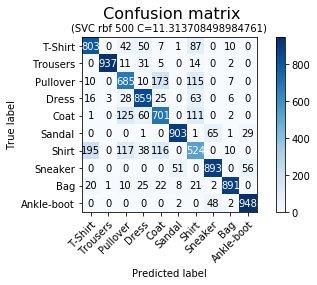

Test accuracy:  0.8144 

              precision    recall  f1-score   support

           0       0.77      0.80      0.79      1000
           1       1.00      0.94      0.97      1000
           2       0.67      0.69      0.68      1000
           3       0.80      0.86      0.83      1000
           4       0.67      0.70      0.68      1000
           5       0.94      0.90      0.92      1000
           6       0.56      0.52      0.54      1000
           7       0.89      0.89      0.89      1000
           8       0.96      0.89      0.92      1000
           9       0.92      0.95      0.93      1000

    accuracy                           0.81     10000
   macro avg       0.82      0.81      0.81     10000
weighted avg       0.82      0.81      0.81     10000



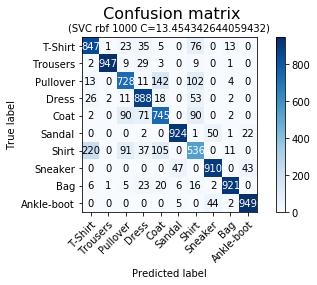

Test accuracy:  0.8395 

              precision    recall  f1-score   support

           0       0.76      0.85      0.80      1000
           1       1.00      0.95      0.97      1000
           2       0.76      0.73      0.74      1000
           3       0.81      0.89      0.85      1000
           4       0.72      0.74      0.73      1000
           5       0.94      0.92      0.93      1000
           6       0.61      0.54      0.57      1000
           7       0.90      0.91      0.91      1000
           8       0.96      0.92      0.94      1000
           9       0.94      0.95      0.94      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



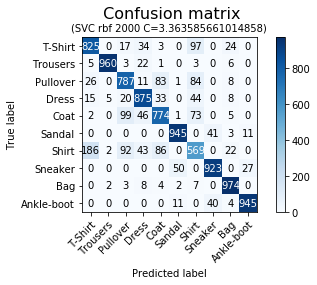

Test accuracy:  0.8577 

              precision    recall  f1-score   support

           0       0.78      0.82      0.80      1000
           1       0.99      0.96      0.98      1000
           2       0.77      0.79      0.78      1000
           3       0.84      0.88      0.86      1000
           4       0.79      0.77      0.78      1000
           5       0.94      0.94      0.94      1000
           6       0.65      0.57      0.61      1000
           7       0.92      0.92      0.92      1000
           8       0.92      0.97      0.95      1000
           9       0.96      0.94      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



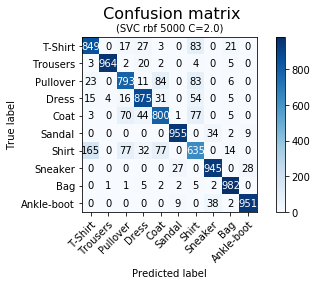

Test accuracy:  0.8749 

              precision    recall  f1-score   support

           0       0.80      0.85      0.83      1000
           1       0.99      0.96      0.98      1000
           2       0.81      0.79      0.80      1000
           3       0.86      0.88      0.87      1000
           4       0.80      0.80      0.80      1000
           5       0.96      0.95      0.96      1000
           6       0.67      0.64      0.65      1000
           7       0.93      0.94      0.94      1000
           8       0.94      0.98      0.96      1000
           9       0.96      0.95      0.96      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [19]:
# finalen RBF_SVC mit optimierten Hyperparameterwerte aus 2. DL
train_RBF_SVC(X_tr_500, X_test_9_4_2, y_tr_500, y_test, 1, '500',11.313708498984761, 2.5662122047537674e-05,'ovo',
               "SVM_Modelle_FM/Hog_opt/rbf/Neue Mengen/", "seed_1_random_A_with_scaler", "HOG_942_ovo.pkl")
train_RBF_SVC(X_tr_1000, X_test_9_4_2, y_tr_1000, y_test, 1, '1000', 13.454342644059432, 3.0517578125e-05,'ovo',
               "SVM_Modelle_FM/Hog_opt/rbf/Neue Mengen/", "seed_1_random_A_with_scaler", "HOG_942_ovo.pkl")
train_RBF_SVC(X_tr_2000, X_test_9_4_2, y_tr_2000, y_test, 1, '2000', 3.363585661014858, 0.00048828125,'ovo',
               "SVM_Modelle_FM/Hog_opt/rbf/Neue Mengen/", "seed_1_random_A_with_scaler", "HOG_942_ovo.pkl")
train_RBF_SVC(X_tr_5000, X_test_9_4_2, y_tr_5000, y_test, 1, '5000', 2.0, 0.0005806675366224224,'ovo',
               "SVM_Modelle_FM/Hog_opt/rbf/Neue Mengen/", "seed_1_random_A_with_scaler", "HOG_942_ovo.pkl")

In [16]:
print("GridSearch RBF 10000 1. Durchlauf")
clf_10000_RBF, time_10000 = tuning_hyper_params(X_tr_10000, y_tr_10000, X_test_9_4_2, y_test, 
                                        'rbf',5, 2, 0, np.logspace(-2,4,4, base=2),
                                         np.logspace(-16,-2,7, base=2), 1)
save_trained_model_as_pkl(clf_10000_RBF, "SVM_Modelle_FM/Hog_opt/rbf/Neue Mengen/10000/seed_1_random_A_with_scaler/GridSearch_1DL.pkl")
save_as_csv(time_10000, "SVM_Modelle_FM/Hog_opt/rbf/Neue Mengen/10000/seed_1_random_A_with_scaler/", 'Suchzeiten_GridSearch_1_DL.csv')

print("*********************************************************************")
print("GridSearch RBF 20000 1. Durchlauf")
clf_20000_RBF, time_20000 = tuning_hyper_params(X_tr_20000, y_tr_20000, X_test_9_4_2, y_test, 
                                        'rbf',3, 2, 0, np.logspace(-2,4,4, base=2),
                                         np.logspace(-16,-2,7, base=2), 1)
save_trained_model_as_pkl(clf_20000_RBF, "SVM_Modelle_FM/Hog_opt/rbf/Neue Mengen/20000/seed_1_random_A_with_scaler/GridSearch_1DL.pkl")
save_as_csv(time_20000, "SVM_Modelle_FM/Hog_opt/rbf/Neue Mengen/20000/seed_1_random_A_with_scaler/", 'Suchzeiten_GridSearch_1_DL.csv')



GridSearch LinearSVC 10000 1. Durchlauf

 C_range:  [ 0.25  1.    4.   16.  ]

 gamma_range: [1.52587891e-05 7.68994781e-05 3.87549085e-04 1.95312500e-03
 9.84313320e-03 4.96062829e-02 2.50000000e-01]

 Beste Score:  0.8866

 Besten Parameter:  {'svm__C': 4.0, 'svm__gamma': 0.000387549084953174}
Bester Estimator score:  0.8886
Precision-Score: 0.792370 (0.009372) mit Parameter: {'svm__C': 0.25, 'svm__gamma': 1.52587890625e-05}
Precision-Score: 0.837047 (0.007146) mit Parameter: {'svm__C': 0.25, 'svm__gamma': 7.689947814299766e-05}
Precision-Score: 0.859373 (0.007492) mit Parameter: {'svm__C': 0.25, 'svm__gamma': 0.000387549084953174}
Precision-Score: 0.808050 (0.003163) mit Parameter: {'svm__C': 0.25, 'svm__gamma': 0.001953125}
Precision-Score: 0.687595 (0.099774) mit Parameter: {'svm__C': 0.25, 'svm__gamma': 0.0098431332023037}
Precision-Score: 0.243354 (0.076016) mit Parameter: {'svm__C': 0.25, 'svm__gamma': 0.04960628287400627}
Precision-Score: 0.604574 (0.099160) mit Parameter: {'s

*********************************************************************
GridSearch LinearSVC 20000 1. Durchlauf

 C_range:  [ 0.25  1.    4.   16.  ]

 gamma_range: [1.52587891e-05 7.68994781e-05 3.87549085e-04 1.95312500e-03
 9.84313320e-03 4.96062829e-02 2.50000000e-01]

 Beste Score:  0.8961

 Besten Parameter:  {'svm__C': 4.0, 'svm__gamma': 0.000387549084953174}
Bester Estimator score:  0.9007
Precision-Score: 0.809177 (0.003785) mit Parameter: {'svm__C': 0.25, 'svm__gamma': 1.52587890625e-05}
Precision-Score: 0.848855 (0.000660) mit Parameter: {'svm__C': 0.25, 'svm__gamma': 7.689947814299766e-05}
Precision-Score: 0.871916 (0.002026) mit Parameter: {'svm__C': 0.25, 'svm__gamma': 0.000387549084953174}
Precision-Score: 0.827177 (0.002879) mit Parameter: {'svm__C': 0.25, 'svm__gamma': 0.001953125}
Precision-Score: 0.761726 (0.026171) mit Parameter: {'svm__C': 0.25, 'svm__gamma': 0.0098431332023037}
Precision-Score: 0.423092 (0.070622) mit Parameter: {'svm__C': 0.25, 'svm__gamma': 0.0496

In [32]:
print("GridSearch RBF 10000 2. Durchlauf")
clf_10000_RBF, time_10000 = tuning_hyper_params(X_tr_10000, y_tr_10000, X_test_9_4_2, y_test, 
                                        'rbf',3, 2, 0, get_finer_range(4),
                                         get_finer_range(0.000387549084953174), 1)
save_trained_model_as_pkl(clf_10000_RBF, "SVM_Modelle_FM/Hog_opt/rbf/Neue Mengen/10000/seed_1_random_A_with_scaler/GridSearch_2DL.pkl")
save_as_csv(time_10000, "SVM_Modelle_FM/Hog_opt/rbf/Neue Mengen/10000/seed_1_random_A_with_scaler/", 'Suchzeiten_GridSearch_2_DL.csv')
print("*********************************************************************")
print("GridSearch RBF 20000 2. Durchlauf")
clf_20000_RBF, time_20000 = tuning_hyper_params(X_tr_20000, y_tr_20000, X_test_9_4_2, y_test, 
                                        'rbf',3, 2, 0, get_finer_range(4),
                                         get_finer_range(0.000387549084953174), 1)
save_trained_model_as_pkl(clf_20000_RBF, "SVM_Modelle_FM/Hog_opt/rbf/Neue Mengen/20000/seed_1_random_A_with_scaler/GridSearch_2DL.pkl")
save_as_csv(time_20000, "SVM_Modelle_FM/Hog_opt/rbf/Neue Mengen/20000/seed_1_random_A_with_scaler/", 'Suchzeiten_GridSearch_2_DL.csv')


GridSearch RBF 10000 2. Durchlauf

 C_range:  [ 1.          1.18920712  1.41421356  1.68179283  2.          2.37841423
  2.82842712  3.36358566  4.          4.75682846  5.65685425  6.72717132
  8.          9.51365692 11.3137085  13.45434264 16.        ]

 gamma_range: [9.68872712e-05 1.15219032e-04 1.37019293e-04 1.62944318e-04
 1.93774542e-04 2.30438065e-04 2.74038586e-04 3.25888636e-04
 3.87549085e-04 4.60876129e-04 5.48077172e-04 6.51777273e-04
 7.75098170e-04 9.21752258e-04 1.09615434e-03 1.30355455e-03
 1.55019634e-03]

 Beste Score:  0.8883

 Besten Parameter:  {'svm__C': 4.756828460010884, 'svm__gamma': 0.0005480771720260615}
Bester Estimator score:  0.8898
Precision-Score: 0.865370 (0.007372) mit Parameter: {'svm__C': 1.0, 'svm__gamma': 9.68872712382935e-05}
Precision-Score: 0.868894 (0.007363) mit Parameter: {'svm__C': 1.0, 'svm__gamma': 0.00011521903230977714}
Precision-Score: 0.870576 (0.006912) mit Parameter: {'svm__C': 1.0, 'svm__gamma': 0.00013701929300651537}
Precision-S

Roc-Score: 0.936889 (0.000468) mit Parameter: {'svm__C': 4.0, 'svm__gamma': 0.000387549084953174}
Roc-Score: 0.937167 (0.000909) mit Parameter: {'svm__C': 4.0, 'svm__gamma': 0.00046087612923910855}
Roc-Score: 0.937889 (0.000441) mit Parameter: {'svm__C': 4.0, 'svm__gamma': 0.0005480771720260615}
Roc-Score: 0.937722 (0.001566) mit Parameter: {'svm__C': 4.0, 'svm__gamma': 0.0006517772725439626}
Roc-Score: 0.937722 (0.001922) mit Parameter: {'svm__C': 4.0, 'svm__gamma': 0.000775098169906348}
Roc-Score: 0.936278 (0.001603) mit Parameter: {'svm__C': 4.0, 'svm__gamma': 0.0009217522584782171}
Roc-Score: 0.935111 (0.000953) mit Parameter: {'svm__C': 4.0, 'svm__gamma': 0.001096154344052123}
Roc-Score: 0.932944 (0.001428) mit Parameter: {'svm__C': 4.0, 'svm__gamma': 0.0013035545450879253}
Roc-Score: 0.927944 (0.001821) mit Parameter: {'svm__C': 4.0, 'svm__gamma': 0.001550196339812696}
Roc-Score: 0.934889 (0.001684) mit Parameter: {'svm__C': 4.756828460010884, 'svm__gamma': 9.68872712382935e-05}


*********************************************************************
GridSearch RBF 20000 2. Durchlauf

 C_range:  [ 1.          1.18920712  1.41421356  1.68179283  2.          2.37841423
  2.82842712  3.36358566  4.          4.75682846  5.65685425  6.72717132
  8.          9.51365692 11.3137085  13.45434264 16.        ]

 gamma_range: [9.68872712e-05 1.15219032e-04 1.37019293e-04 1.62944318e-04
 1.93774542e-04 2.30438065e-04 2.74038586e-04 3.25888636e-04
 3.87549085e-04 4.60876129e-04 5.48077172e-04 6.51777273e-04
 7.75098170e-04 9.21752258e-04 1.09615434e-03 1.30355455e-03
 1.55019634e-03]

 Beste Score:  0.8971

 Besten Parameter:  {'svm__C': 2.8284271247461903, 'svm__gamma': 0.0005480771720260615}
Bester Estimator score:  0.9012
Precision-Score: 0.876771 (0.000609) mit Parameter: {'svm__C': 1.0, 'svm__gamma': 9.68872712382935e-05}
Precision-Score: 0.878630 (0.001260) mit Parameter: {'svm__C': 1.0, 'svm__gamma': 0.00011521903230977714}
Precision-Score: 0.880939 (0.001597) mit Param

Roc-Score: 0.938417 (0.001306) mit Parameter: {'svm__C': 5.656854249492381, 'svm__gamma': 0.0013035545450879253}
Roc-Score: 0.935222 (0.001401) mit Parameter: {'svm__C': 5.656854249492381, 'svm__gamma': 0.001550196339812696}
Roc-Score: 0.937556 (0.000644) mit Parameter: {'svm__C': 6.727171322029716, 'svm__gamma': 9.68872712382935e-05}
Roc-Score: 0.937972 (0.000616) mit Parameter: {'svm__C': 6.727171322029716, 'svm__gamma': 0.00011521903230977714}
Roc-Score: 0.938944 (0.000782) mit Parameter: {'svm__C': 6.727171322029716, 'svm__gamma': 0.00013701929300651537}
Roc-Score: 0.939306 (0.000796) mit Parameter: {'svm__C': 6.727171322029716, 'svm__gamma': 0.00016294431813599066}
Roc-Score: 0.940333 (0.000782) mit Parameter: {'svm__C': 6.727171322029716, 'svm__gamma': 0.000193774542476587}
Roc-Score: 0.940944 (0.000829) mit Parameter: {'svm__C': 6.727171322029716, 'svm__gamma': 0.00023043806461955427}
Roc-Score: 0.941222 (0.000529) mit Parameter: {'svm__C': 6.727171322029716, 'svm__gamma': 0.000

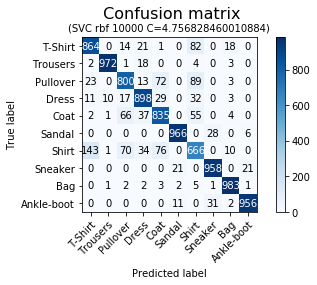

Test accuracy:  0.8898 

              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.82      0.80      0.81      1000
           3       0.88      0.90      0.89      1000
           4       0.82      0.83      0.83      1000
           5       0.97      0.97      0.97      1000
           6       0.71      0.67      0.69      1000
           7       0.94      0.96      0.95      1000
           8       0.96      0.98      0.97      1000
           9       0.97      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



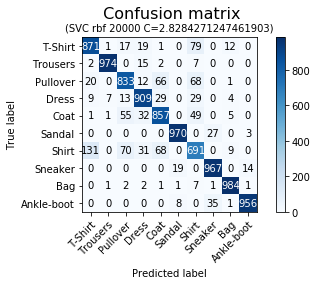

Test accuracy:  0.9012 

              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1000
           1       0.99      0.97      0.98      1000
           2       0.84      0.83      0.84      1000
           3       0.89      0.91      0.90      1000
           4       0.84      0.86      0.85      1000
           5       0.97      0.97      0.97      1000
           6       0.74      0.69      0.72      1000
           7       0.94      0.97      0.95      1000
           8       0.97      0.98      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [23]:
#Parameterwerte aus 2.DL
train_RBF_SVC(X_tr_10000, X_test_9_4_2, y_tr_10000, y_test, 1, '10000', 4.756828460010884, 0.0005480771720260615,'ovo',
               "SVM_Modelle_FM/Hog_opt/rbf/Neue Mengen/", "seed_1_random_A_with_scaler", "HOG_942_ovo.pkl")

#Parameterwerte aus 2. DL
train_RBF_SVC(X_tr_20000, X_test_9_4_2, y_tr_20000, y_test, 1, '20000', 2.8284271247461903, 0.0005480771720260615,'ovo',
               "SVM_Modelle_FM/Hog_opt/rbf/Neue Mengen/", "seed_1_random_A_with_scaler", "HOG_942_ovo.pkl")

In [20]:
print("*********************************************************************")
print("GridSearch RBF 40000 1. Durchlauf")
clf_40000_RBF, time_40000 = tuning_hyper_params(X_tr_40000, y_tr_40000, X_test_9_4_2, y_test, 
                                        'rbf',3, 2, 0, np.logspace(-2,4,4, base=2),
                                         np.logspace(-16,-2,7, base=2), 1)
save_trained_model_as_pkl(clf_40000_RBF, "SVM_Modelle_FM/Hog_opt/rbf/Neue Mengen/40000/seed_1_random_A_with_scaler/GridSearch_1DL.pkl")
save_as_csv(time_40000, "SVM_Modelle_FM/Hog_opt/rbf/Neue Mengen/40000/seed_1_random_A_with_scaler/", 'Suchzeiten_GridSearch_1_DL.csv')

print("*********************************************************************")


*********************************************************************
GridSearch RBF 40000 1. Durchlauf

 C_range:  [ 0.25  1.    4.   16.  ]

 gamma_range: [1.52587891e-05 7.68994781e-05 3.87549085e-04 1.95312500e-03
 9.84313320e-03 4.96062829e-02 2.50000000e-01]

 Beste Score:  0.9069

 Besten Parameter:  {'svm__C': 16.0, 'svm__gamma': 0.000387549084953174}
Bester Estimator score:  0.911
Precision-Score: 0.830939 (0.002599) mit Parameter: {'svm__C': 0.25, 'svm__gamma': 1.52587890625e-05}
Precision-Score: 0.861888 (0.000421) mit Parameter: {'svm__C': 0.25, 'svm__gamma': 7.689947814299766e-05}
Precision-Score: 0.883997 (0.001648) mit Parameter: {'svm__C': 0.25, 'svm__gamma': 0.000387549084953174}
Precision-Score: 0.850082 (0.001750) mit Parameter: {'svm__C': 0.25, 'svm__gamma': 0.001953125}
Precision-Score: 0.811470 (0.040675) mit Parameter: {'svm__C': 0.25, 'svm__gamma': 0.0098431332023037}
Precision-Score: 0.464161 (0.085588) mit Parameter: {'svm__C': 0.25, 'svm__gamma': 0.0496062828

*********************************************************************


In [ ]:
print("GridSearch RBF 60000 1. Durchlauf")
clf_60000_RBF, time_60000 = tuning_hyper_params(X_train_9_4_2, y_train, X_test_9_4_2, y_test, 
                                        'rbf',3, 2, 0, np.logspace(-2,4,4, base=2),
                                         np.logspace(-16,-2,7, base=2), 1)
save_trained_model_as_pkl(clf_60000_RBF, "SVM_Modelle_FM/Hog_opt/rbf/Neue Mengen/60000/seed_1_random_A_with_scaler/GridSearch_1DL.pkl")
save_as_csv(time_60000, "SVM_Modelle_FM/Hog_opt/rbf/Neue Mengen/60000/seed_1_random_A_with_scaler/", 'Suchzeiten_GridSearch_1_DL.csv')

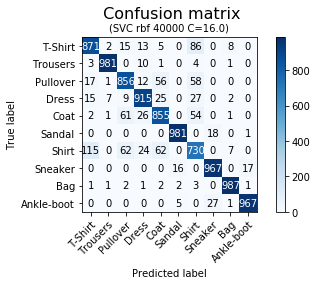

Test accuracy:  0.911 

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1000
           1       0.99      0.98      0.98      1000
           2       0.85      0.86      0.85      1000
           3       0.91      0.92      0.91      1000
           4       0.85      0.85      0.85      1000
           5       0.98      0.98      0.98      1000
           6       0.76      0.73      0.74      1000
           7       0.96      0.97      0.96      1000
           8       0.98      0.99      0.98      1000
           9       0.98      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [21]:
#Parameterwerte aus 1. DL von Trainingsmenge 40000
train_RBF_SVC(X_tr_40000, X_test_9_4_2, y_tr_40000, y_test, 1, '40000', 16.0, 0.000387549084953174,'ovo',
               "SVM_Modelle_FM/Hog_opt/rbf/Neue Mengen//", "seed_1_random_A_with_scaler", "HOG_942_ovo.pkl")


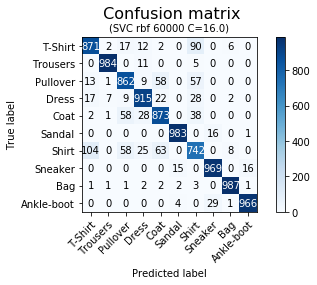

Test accuracy:  0.9152 

              precision    recall  f1-score   support

           0       0.86      0.87      0.87      1000
           1       0.99      0.98      0.99      1000
           2       0.86      0.86      0.86      1000
           3       0.91      0.92      0.91      1000
           4       0.86      0.87      0.86      1000
           5       0.98      0.98      0.98      1000
           6       0.77      0.74      0.76      1000
           7       0.96      0.97      0.96      1000
           8       0.98      0.99      0.99      1000
           9       0.98      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.91      0.92      0.91     10000
weighted avg       0.91      0.92      0.91     10000



In [24]:
# Parameterwerte aus 1. DL von Trainingsmenge 40000
train_RBF_SVC(X_train_9_4_2, X_test_9_4_2, y_train, y_test, 1, '60000', 16.0, 0.000387549084953174,'ovo',
               "SVM_Modelle_FM/Hog_opt/rbf/Neue Mengen/", "seed_1_random_A_with_scaler", "HOG_942_ovo.pkl")

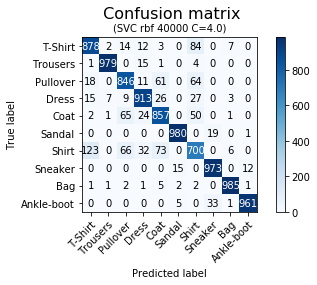

Test accuracy:  0.9072 

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1000
           1       0.99      0.98      0.98      1000
           2       0.84      0.85      0.85      1000
           3       0.91      0.91      0.91      1000
           4       0.84      0.86      0.85      1000
           5       0.98      0.98      0.98      1000
           6       0.75      0.70      0.73      1000
           7       0.95      0.97      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.99      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



NameError: name 'X_tr_60000' is not defined

In [21]:
#Parameterwerte aus 1. DL von Trainingsmenge 20000
train_RBF_SVC(X_tr_40000, X_test_9_4_2, y_tr_40000, y_test, 1, '40000', 4.0, 0.000387549084953174,'ovo',
               "SVM_Modelle_FM/Hog_opt/rbf/Neue Mengen//", "seed_1_random_A_with_scaler", "HOG_942_ovo.pkl")
train_RBF_SVC(X_tr_60000, X_test_9_4_2, y_tr_60000, y_test, 1, '60000', 4.0, 0.000387549084953174,'ovo',
               "SVM_Modelle_FM/Hog_opt/rbf/Neue Mengen/", "seed_1_random_A_with_scaler", "HOG_942_ovo.pkl")

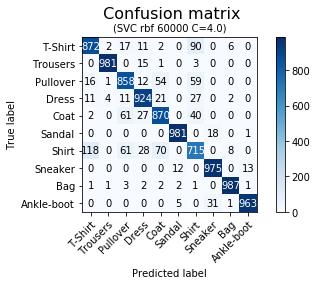

Test accuracy:  0.9126 

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1000
           1       0.99      0.98      0.99      1000
           2       0.85      0.86      0.85      1000
           3       0.91      0.92      0.92      1000
           4       0.85      0.87      0.86      1000
           5       0.98      0.98      0.98      1000
           6       0.76      0.71      0.74      1000
           7       0.95      0.97      0.96      1000
           8       0.98      0.99      0.99      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [22]:
# optimierte PArameterwerte aus 1. DL 20.000
train_RBF_SVC(X_train_9_4_2, X_test_9_4_2, y_train, y_test, 1, '60000', 4.0, 0.000387549084953174,'ovo',
               "SVM_Modelle_FM/Hog_opt/rbf/Neue Mengen/", "seed_1_random_A_with_scaler", "HOG_942_ovo.pkl")

In [24]:
###########################################################################
#####   GridSearchCV   LinearSVC, squared_hinge    ohne StandardScaler      ##############
###########################################################################
'''
GridSearchCV LinearSVC ohne StandardScaler, ohne PCA     1. Durchlauf
speichern
'''

print("GridSearch LinearSVC 500 1. Durchlauf")
clf_500_LinearSVC, time_500 = tuning_hyper_params_2(X_tr_500, y_tr_500, X_test_9_4_2, y_test, 
                                        'LinearSVC',10, 0, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_500_LinearSVC, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/500/seed_1_random_A_without_scaler_l2_sq_hinge/GridSearch_1DL.pkl")
save_as_csv(time_500, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/500/seed_1_random_A_without_scaler_l2_sq_hinge/", 'Suchzeiten_GridSearch_1_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 1000 1. Durchlauf")
clf_1000_LinearSVC, time_1000 = tuning_hyper_params_2(X_tr_1000, y_tr_1000, X_test_9_4_2, y_test, 
                                        'LinearSVC',10, 0, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_1000_LinearSVC, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/1000/seed_1_random_A_without_scaler_l2_sq_hinge/GridSearch_1DL.pkl")
save_as_csv(time_1000, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/1000/seed_1_random_A_without_scaler_l2_sq_hinge/", 'Suchzeiten_GridSearch_1_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 2000 1. Durchlauf")
clf_2000_LinearSVC, time_2000 = tuning_hyper_params_2(X_tr_2000, y_tr_2000, X_test_9_4_2, y_test, 
                                        'LinearSVC',10, 0, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)


GridSearch LinearSVC 500 1. Durchlauf

 C_range: [1.53e-05 6.10e-05 2.44e-04 9.77e-04 3.91e-03 1.56e-02 6.25e-02 2.50e-01
 1.00e+00 4.00e+00 1.60e+01 6.40e+01 2.56e+02 1.02e+03]

 Bester Score:  0.812

 Besten Parameter:  {'svm__C': 0.25}
Bester Estimator score:  0.8083
Precision-Score: 0.608249 (0.092746) mit Parameter: {'svm__C': 1.52587890625e-05}
Precision-Score: 0.608672 (0.092492) mit Parameter: {'svm__C': 6.103515625e-05}
Precision-Score: 0.626505 (0.082861) mit Parameter: {'svm__C': 0.000244140625}
Precision-Score: 0.700161 (0.055142) mit Parameter: {'svm__C': 0.0009765625}
Precision-Score: 0.754069 (0.071175) mit Parameter: {'svm__C': 0.00390625}
Precision-Score: 0.801811 (0.045481) mit Parameter: {'svm__C': 0.015625}
Precision-Score: 0.833869 (0.042897) mit Parameter: {'svm__C': 0.0625}
Precision-Score: 0.839389 (0.043029) mit Parameter: {'svm__C': 0.25}
Precision-Score: 0.834159 (0.044890) mit Parameter: {'svm__C': 1.0}
Precision-Score: 0.804206 (0.059184) mit Parameter: {'s


 C_range: [1.53e-05 6.10e-05 2.44e-04 9.77e-04 3.91e-03 1.56e-02 6.25e-02 2.50e-01
 1.00e+00 4.00e+00 1.60e+01 6.40e+01 2.56e+02 1.02e+03]

 Bester Score:  0.847

 Besten Parameter:  {'svm__C': 1.0}
Bester Estimator score:  0.8435
Precision-Score: 0.598483 (0.059001) mit Parameter: {'svm__C': 1.52587890625e-05}
Precision-Score: 0.633661 (0.041427) mit Parameter: {'svm__C': 6.103515625e-05}
Precision-Score: 0.675787 (0.029144) mit Parameter: {'svm__C': 0.000244140625}
Precision-Score: 0.762440 (0.044126) mit Parameter: {'svm__C': 0.0009765625}
Precision-Score: 0.795954 (0.026982) mit Parameter: {'svm__C': 0.00390625}
Precision-Score: 0.823416 (0.014969) mit Parameter: {'svm__C': 0.015625}
Precision-Score: 0.841751 (0.015547) mit Parameter: {'svm__C': 0.0625}
Precision-Score: 0.847747 (0.012471) mit Parameter: {'svm__C': 0.25}
Precision-Score: 0.850451 (0.021961) mit Parameter: {'svm__C': 1.0}
Precision-Score: 0.834784 (0.021166) mit Parameter: {'svm__C': 4.0}
Precision-Score: 0.822913 

FileNotFoundError: [Errno 2] No such file or directory: 'SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/2000/seed_1_random_A_without_scale_l2_sq_hinge/Suchzeiten_GridSearch_1_DL.csv'

In [25]:
# Fortsetzung
save_trained_model_as_pkl(clf_2000_LinearSVC, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/2000/seed_1_random_A_without_scaler_l2_sq_hinge/GridSearch_1DL.pkl")
save_as_csv(time_2000, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/2000/seed_1_random_A_without_scaler_l2_sq_hinge/", 'Suchzeiten_GridSearch_1_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 5000 1. Durchlauf")
clf_5000_LinearSVC, time_5000 = tuning_hyper_params_2(X_tr_5000, y_tr_5000, X_test_9_4_2, y_test, 
                                        'LinearSVC',5, 0, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_5000_LinearSVC, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/5000/seed_1_random_A_without_scaler_l2_sq_hinge/GridSearch_1DL.pkl")
save_as_csv(time_5000, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/5000/seed_1_random_A_without_scaler_l2_sq_hinge/", 'Suchzeiten_GridSearch_1_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 10000 1. Durchlauf")
clf_10000_LinearSVC, time_10000 = tuning_hyper_params_2(X_tr_10000, y_tr_10000, X_test_9_4_2, y_test, 
                                        'LinearSVC',5, 0, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_10000_LinearSVC, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/10000/seed_1_random_A_without_scaler_l2_sq_hinge/GridSearch_1DL.pkl")
save_as_csv(time_10000, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/10000/seed_1_random_A_without_scaler_l2_sq_hinge/", 'Suchzeiten_GridSearch_1_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 20000 1. Durchlauf")
clf_20000_LinearSVC, time_20000 = tuning_hyper_params_2(X_tr_20000, y_tr_20000, X_test_9_4_2, y_test, 
                                        'LinearSVC',3, 0, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_20000_LinearSVC, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/20000/seed_1_random_A_without_scaler_l2_sq_hinge/GridSearch_1DL.pkl")
save_as_csv(time_20000, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/20000/seed_1_random_A_without_scaler_l2_sq_hinge/", 'Suchzeiten_GridSearch_1_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 40000 1. Durchlauf")
clf_40000_LinearSVC, time_40000 = tuning_hyper_params_2(X_tr_40000, y_tr_40000, X_test_9_4_2, y_test, 
                                        'LinearSVC',3, 0, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_40000_LinearSVC, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/40000/seed_1_random_A_without_scaler_l2_sq_hinge/GridSearch_1DL.pkl")
save_as_csv(time_40000, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/40000/seed_1_random_A_without_scaler_l2_sq_hinge/", 'Suchzeiten_GridSearch_1_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 60000 1. Durchlauf")
clf_60000_LinearSVC, time_60000 = tuning_hyper_params_2(X_tr_60000, y_tr_60000, X_test_9_4_2, y_test, 
                                        'LinearSVC',3, 0, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_60000_LinearSVC, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/60000/seed_1_random_A_without_scaler_l2_sq_hinge/GridSearch_1DL.pkl")
save_as_csv(time_60000, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/60000/seed_1_random_A_without_scaler_l2_sq_hinge/", 'Suchzeiten_GridSearch_1_DL.csv')


*********************************************************************
GridSearch LinearSVC 5000 1. Durchlauf

 C_range: [1.53e-05 6.10e-05 2.44e-04 9.77e-04 3.91e-03 1.56e-02 6.25e-02 2.50e-01
 1.00e+00 4.00e+00 1.60e+01 6.40e+01 2.56e+02 1.02e+03]

 Bester Score:  0.8628

 Besten Parameter:  {'svm__C': 0.25}
Bester Estimator score:  0.8672
Precision-Score: 0.657011 (0.038242) mit Parameter: {'svm__C': 1.52587890625e-05}
Precision-Score: 0.685524 (0.048374) mit Parameter: {'svm__C': 6.103515625e-05}
Precision-Score: 0.739165 (0.031489) mit Parameter: {'svm__C': 0.000244140625}
Precision-Score: 0.781649 (0.005288) mit Parameter: {'svm__C': 0.0009765625}
Precision-Score: 0.811619 (0.004775) mit Parameter: {'svm__C': 0.00390625}
Precision-Score: 0.838618 (0.004333) mit Parameter: {'svm__C': 0.015625}
Precision-Score: 0.855832 (0.004370) mit Parameter: {'svm__C': 0.0625}
Precision-Score: 0.862218 (0.006342) mit Parameter: {'svm__C': 0.25}
Precision-Score: 0.857127 (0.005632) mit Parameter:


 C_range: [1.53e-05 6.10e-05 2.44e-04 9.77e-04 3.91e-03 1.56e-02 6.25e-02 2.50e-01
 1.00e+00 4.00e+00 1.60e+01 6.40e+01 2.56e+02 1.02e+03]

 Bester Score:  0.8864

 Besten Parameter:  {'svm__C': 0.25}
Bester Estimator score:  0.8884
Precision-Score: 0.699675 (0.040865) mit Parameter: {'svm__C': 1.52587890625e-05}
Precision-Score: 0.744933 (0.005779) mit Parameter: {'svm__C': 6.103515625e-05}
Precision-Score: 0.787670 (0.002378) mit Parameter: {'svm__C': 0.000244140625}
Precision-Score: 0.813223 (0.001243) mit Parameter: {'svm__C': 0.0009765625}
Precision-Score: 0.842905 (0.001782) mit Parameter: {'svm__C': 0.00390625}
Precision-Score: 0.864830 (0.000655) mit Parameter: {'svm__C': 0.015625}
Precision-Score: 0.879596 (0.000240) mit Parameter: {'svm__C': 0.0625}
Precision-Score: 0.885702 (0.002570) mit Parameter: {'svm__C': 0.25}
Precision-Score: 0.883747 (0.003212) mit Parameter: {'svm__C': 1.0}
Precision-Score: 0.878815 (0.003088) mit Parameter: {'svm__C': 4.0}
Precision-Score: 0.87127

*********************************************************************
GridSearch LinearSVC 60000 1. Durchlauf


NameError: name 'X_tr_60000' is not defined

In [26]:
print("GridSearch LinearSVC 60000 1. Durchlauf")
clf_60000_LinearSVC, time_60000 = tuning_hyper_params_2(X_train_9_4_2, y_train, X_test_9_4_2, y_test, 
                                        'LinearSVC',3, 0, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_60000_LinearSVC, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/60000/seed_1_random_A_without_scaler_l2_sq_hinge/GridSearch_1DL.pkl")
save_as_csv(time_60000, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/60000/seed_1_random_A_without_scaler_l2_sq_hinge/", 'Suchzeiten_GridSearch_1_DL.csv')

GridSearch LinearSVC 60000 1. Durchlauf


C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



 C_range: [1.53e-05 6.10e-05 2.44e-04 9.77e-04 3.91e-03 1.56e-02 6.25e-02 2.50e-01
 1.00e+00 4.00e+00 1.60e+01 6.40e+01 2.56e+02 1.02e+03]

 Bester Score:  0.8975

 Besten Parameter:  {'svm__C': 4.0}
Bester Estimator score:  0.9017
Precision-Score: 0.734545 (0.002104) mit Parameter: {'svm__C': 1.52587890625e-05}
Precision-Score: 0.775233 (0.000194) mit Parameter: {'svm__C': 6.103515625e-05}
Precision-Score: 0.802197 (0.000788) mit Parameter: {'svm__C': 0.000244140625}
Precision-Score: 0.833818 (0.002654) mit Parameter: {'svm__C': 0.0009765625}
Precision-Score: 0.860451 (0.003037) mit Parameter: {'svm__C': 0.00390625}
Precision-Score: 0.878428 (0.001794) mit Parameter: {'svm__C': 0.015625}
Precision-Score: 0.888808 (0.002021) mit Parameter: {'svm__C': 0.0625}
Precision-Score: 0.895016 (0.001834) mit Parameter: {'svm__C': 0.25}
Precision-Score: 0.896436 (0.001437) mit Parameter: {'svm__C': 1.0}
Precision-Score: 0.896860 (0.001501) mit Parameter: {'svm__C': 4.0}
Precision-Score: 0.894742

In [31]:
'''
GridSearchCV LinearSVC ohne StandardScaler, ohne PCA     2. Durchlauf
speichern  
'''

print("GridSearch LinearSVC 500 2. Durchlauf")
clf_500_LinearSVC, time_500 = tuning_hyper_params_2(X_tr_500, y_tr_500, X_test_9_4_2, y_test, 
                                        'LinearSVC',10, 0, 0, get_finer_range(0.25),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_500_LinearSVC, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/500/seed_1_random_A_without_scaler_l2_sq_hinge/GridSearch_2DL.pkl")
save_as_csv(time_500, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/500/seed_1_random_A_without_scaler_l2_sq_hinge/", 'Suchzeiten_GridSearch_2_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 1000 2. Durchlauf")
clf_1000_LinearSVC, time_1000 = tuning_hyper_params_2(X_tr_1000, y_tr_1000, X_test_9_4_2, y_test, 
                                        'LinearSVC',10, 0, 0, get_finer_range(0.25),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_1000_LinearSVC, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/1000/seed_1_random_A_without_scaler_l2_sq_hinge/GridSearch_2DL.pkl")
save_as_csv(time_1000, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/1000/seed_1_random_A_without_scaler_l2_sq_hinge/", 'Suchzeiten_GridSearch_2_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 2000 2. Durchlauf")
clf_2000_LinearSVC, time_2000 = tuning_hyper_params_2(X_tr_2000, y_tr_2000, X_test_9_4_2, y_test, 
                                        'LinearSVC',10, 0, 0, get_finer_range(1.0),
                                         np.logspace(-16,4,11, base=2), 1)

print("*********************************************************************")
print("GridSearch LinearSVC 5000 2. Durchlauf")
clf_5000_LinearSVC, time_5000 = tuning_hyper_params_2(X_tr_5000, y_tr_5000, X_test_9_4_2, y_test, 
                                        'LinearSVC',5, 0, 0, get_finer_range(0.25),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_5000_LinearSVC, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/5000/seed_1_random_A_without_scaler_l2_sq_hinge/GridSearch_2DL.pkl")
save_as_csv(time_5000, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/5000/seed_1_random_A_without_scaler_l2_sq_hinge/", 'Suchzeiten_GridSearch_2_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 10000 2. Durchlauf")
clf_10000_LinearSVC, time_10000 = tuning_hyper_params_2(X_tr_10000, y_tr_10000, X_test_9_4_2, y_test, 
                                        'LinearSVC',5, 0, 0, get_finer_range(0.25),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_10000_LinearSVC, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/10000/seed_1_random_A_without_scaler_l2_sq_hinge/GridSearch_2DL.pkl")
save_as_csv(time_10000, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/10000/seed_1_random_A_without_scaler_l2_sq_hinge/", 'Suchzeiten_GridSearch_2_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 20000 2. Durchlauf")
clf_20000_LinearSVC, time_20000 = tuning_hyper_params_2(X_tr_20000, y_tr_20000, X_test_9_4_2, y_test, 
                                        'LinearSVC',3, 0, 0, get_finer_range(0.25),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_20000_LinearSVC, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/20000/seed_1_random_A_without_scaler_l2_sq_hinge/GridSearch_2DL.pkl")
save_as_csv(time_20000, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/20000/seed_1_random_A_without_scaler_l2_sq_hinge/", 'Suchzeiten_GridSearch_2_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 40000 2. Durchlauf")
clf_40000_LinearSVC, time_40000 = tuning_hyper_params_2(X_tr_40000, y_tr_40000, X_test_9_4_2, y_test, 
                                        'LinearSVC',3, 0, 0, get_finer_range(1.0),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_40000_LinearSVC, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/40000/seed_1_random_A_without_scaler_l2_sq_hinge/GridSearch_2DL.pkl")
save_as_csv(time_40000, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/40000/seed_1_random_A_without_scaler_l2_sq_hinge/", 'Suchzeiten_GridSearch_2_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 60000 2. Durchlauf")
clf_60000_LinearSVC, time_60000 = tuning_hyper_params_2(X_train_9_4_2, y_train, X_test_9_4_2, y_test, 
                                        'LinearSVC',3, 0, 0, get_finer_range(4.0),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_60000_LinearSVC, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/60000/seed_1_random_A_without_scaler_l2_sq_hinge/GridSearch_2DL.pkl")
save_as_csv(time_60000, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/60000/seed_1_random_A_without_scaler_l2_sq_hinge/", 'Suchzeiten_GridSearch_2_DL.csv')



GridSearch LinearSVC 500 2. Durchlauf

 C_range: [0.06 0.07 0.09 0.11 0.12 0.15 0.18 0.21 0.25 0.3  0.35 0.42 0.5  0.59
 0.71 0.84 1.  ]

 Bester Score:  0.818

 Besten Parameter:  {'svm__C': 0.125}
Bester Estimator score:  0.8059
Precision-Score: 0.833869 (0.042897) mit Parameter: {'svm__C': 0.0625}
Precision-Score: 0.836702 (0.042300) mit Parameter: {'svm__C': 0.07432544468767006}
Precision-Score: 0.839774 (0.049007) mit Parameter: {'svm__C': 0.08838834764831845}
Precision-Score: 0.839726 (0.049050) mit Parameter: {'svm__C': 0.10511205190671431}
Precision-Score: 0.842913 (0.047964) mit Parameter: {'svm__C': 0.125}
Precision-Score: 0.834881 (0.049448) mit Parameter: {'svm__C': 0.14865088937534013}
Precision-Score: 0.839603 (0.043003) mit Parameter: {'svm__C': 0.1767766952966369}
Precision-Score: 0.839889 (0.043412) mit Parameter: {'svm__C': 0.21022410381342863}
Precision-Score: 0.839389 (0.043029) mit Parameter: {'svm__C': 0.25}
Precision-Score: 0.837714 (0.046942) mit Parameter: {'sv


 C_range: [0.25 0.3  0.35 0.42 0.5  0.59 0.71 0.84 1.   1.19 1.41 1.68 2.   2.38
 2.83 3.36 4.  ]

 Bester Score:  0.848

 Besten Parameter:  {'svm__C': 0.3535533905932738}
Bester Estimator score:  0.8527
Precision-Score: 0.847747 (0.012471) mit Parameter: {'svm__C': 0.25}
Precision-Score: 0.849111 (0.013681) mit Parameter: {'svm__C': 0.29730177875068026}
Precision-Score: 0.850172 (0.014849) mit Parameter: {'svm__C': 0.3535533905932738}
Precision-Score: 0.848832 (0.015747) mit Parameter: {'svm__C': 0.42044820762685725}
Precision-Score: 0.847451 (0.018816) mit Parameter: {'svm__C': 0.5}
Precision-Score: 0.848144 (0.020255) mit Parameter: {'svm__C': 0.5946035575013605}
Precision-Score: 0.850844 (0.022827) mit Parameter: {'svm__C': 0.7071067811865476}
Precision-Score: 0.850628 (0.020800) mit Parameter: {'svm__C': 0.8408964152537145}
Precision-Score: 0.850451 (0.021961) mit Parameter: {'svm__C': 1.0}
Precision-Score: 0.848889 (0.022395) mit Parameter: {'svm__C': 1.189207115002721}
Precisi

Accuracy-Score: 0.862400 (0.004716) mit Parameter: {'svm__C': 0.42044820762685725}
Accuracy-Score: 0.862200 (0.006145) mit Parameter: {'svm__C': 0.5}
Accuracy-Score: 0.860800 (0.005269) mit Parameter: {'svm__C': 0.5946035575013605}
Accuracy-Score: 0.860800 (0.006554) mit Parameter: {'svm__C': 0.7071067811865476}
Accuracy-Score: 0.857800 (0.006675) mit Parameter: {'svm__C': 0.8408964152537145}
Accuracy-Score: 0.857400 (0.005817) mit Parameter: {'svm__C': 1.0}
Roc-Score: 0.920667 (0.002091) mit Parameter: {'svm__C': 0.0625}
Roc-Score: 0.921889 (0.002424) mit Parameter: {'svm__C': 0.07432544468767006}
Roc-Score: 0.922222 (0.002653) mit Parameter: {'svm__C': 0.08838834764831845}
Roc-Score: 0.922222 (0.002833) mit Parameter: {'svm__C': 0.10511205190671431}
Roc-Score: 0.923111 (0.003135) mit Parameter: {'svm__C': 0.125}
Roc-Score: 0.923444 (0.003775) mit Parameter: {'svm__C': 0.14865088937534013}
Roc-Score: 0.923333 (0.003928) mit Parameter: {'svm__C': 0.1767766952966369}
Roc-Score: 0.924333


 C_range: [0.06 0.07 0.09 0.11 0.12 0.15 0.18 0.21 0.25 0.3  0.35 0.42 0.5  0.59
 0.71 0.84 1.  ]

 Bester Score:  0.8865

 Besten Parameter:  {'svm__C': 0.42044820762685725}
Bester Estimator score:  0.8892
Precision-Score: 0.879596 (0.000240) mit Parameter: {'svm__C': 0.0625}
Precision-Score: 0.880393 (0.000846) mit Parameter: {'svm__C': 0.07432544468767006}
Precision-Score: 0.881704 (0.001481) mit Parameter: {'svm__C': 0.08838834764831845}
Precision-Score: 0.882773 (0.001733) mit Parameter: {'svm__C': 0.10511205190671431}
Precision-Score: 0.883627 (0.002301) mit Parameter: {'svm__C': 0.125}
Precision-Score: 0.883922 (0.002167) mit Parameter: {'svm__C': 0.14865088937534013}
Precision-Score: 0.884858 (0.002249) mit Parameter: {'svm__C': 0.1767766952966369}
Precision-Score: 0.885061 (0.002240) mit Parameter: {'svm__C': 0.21022410381342863}
Precision-Score: 0.885702 (0.002570) mit Parameter: {'svm__C': 0.25}
Precision-Score: 0.885269 (0.002481) mit Parameter: {'svm__C': 0.29730177875068

*********************************************************************
GridSearch LinearSVC 60000 2. Durchlauf


C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning



 C_range: [ 1.    1.19  1.41  1.68  2.    2.38  2.83  3.36  4.    4.76  5.66  6.73
  8.    9.51 11.31 13.45 16.  ]

 Bester Score:  0.8977166666666667

 Besten Parameter:  {'svm__C': 1.681792830507429}
Bester Estimator score:  0.9001
Precision-Score: 0.896436 (0.001437) mit Parameter: {'svm__C': 1.0}
Precision-Score: 0.896582 (0.001569) mit Parameter: {'svm__C': 1.189207115002721}
Precision-Score: 0.896721 (0.001387) mit Parameter: {'svm__C': 1.4142135623730951}
Precision-Score: 0.897021 (0.001483) mit Parameter: {'svm__C': 1.681792830507429}
Precision-Score: 0.896753 (0.001426) mit Parameter: {'svm__C': 2.0}
Precision-Score: 0.896672 (0.001293) mit Parameter: {'svm__C': 2.378414230005442}
Precision-Score: 0.896811 (0.001456) mit Parameter: {'svm__C': 2.8284271247461903}
Precision-Score: 0.896762 (0.001432) mit Parameter: {'svm__C': 3.363585661014858}
Precision-Score: 0.896860 (0.001501) mit Parameter: {'svm__C': 4.0}
Precision-Score: 0.896646 (0.001325) mit Parameter: {'svm__C': 4.75

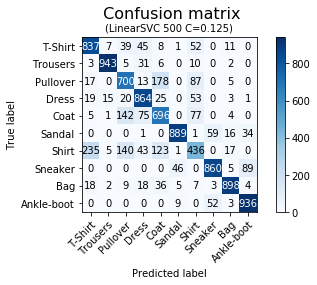

Test accuracy:  0.8059 

              precision    recall  f1-score   support

           0       0.74      0.84      0.78      1000
           1       0.97      0.94      0.96      1000
           2       0.66      0.70      0.68      1000
           3       0.79      0.86      0.83      1000
           4       0.65      0.70      0.67      1000
           5       0.93      0.89      0.91      1000
           6       0.60      0.44      0.51      1000
           7       0.88      0.86      0.87      1000
           8       0.93      0.90      0.91      1000
           9       0.88      0.94      0.91      1000

    accuracy                           0.81     10000
   macro avg       0.80      0.81      0.80     10000
weighted avg       0.80      0.81      0.80     10000



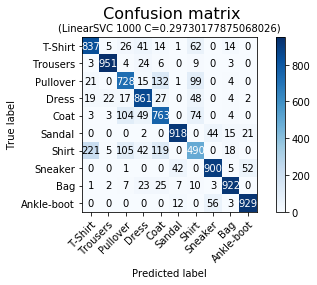

Test accuracy:  0.8299 

              precision    recall  f1-score   support

           0       0.76      0.84      0.80      1000
           1       0.96      0.95      0.96      1000
           2       0.73      0.73      0.73      1000
           3       0.81      0.86      0.84      1000
           4       0.70      0.76      0.73      1000
           5       0.94      0.92      0.93      1000
           6       0.62      0.49      0.55      1000
           7       0.90      0.90      0.90      1000
           8       0.93      0.92      0.93      1000
           9       0.93      0.93      0.93      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



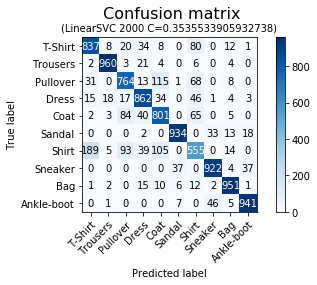

Test accuracy:  0.8527 

              precision    recall  f1-score   support

           0       0.78      0.84      0.81      1000
           1       0.96      0.96      0.96      1000
           2       0.78      0.76      0.77      1000
           3       0.84      0.86      0.85      1000
           4       0.74      0.80      0.77      1000
           5       0.95      0.93      0.94      1000
           6       0.67      0.56      0.61      1000
           7       0.92      0.92      0.92      1000
           8       0.93      0.95      0.94      1000
           9       0.94      0.94      0.94      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



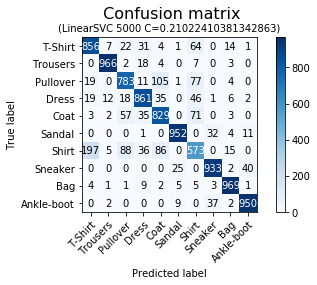

Test accuracy:  0.8672 

              precision    recall  f1-score   support

           0       0.78      0.86      0.82      1000
           1       0.97      0.97      0.97      1000
           2       0.81      0.78      0.79      1000
           3       0.86      0.86      0.86      1000
           4       0.78      0.83      0.80      1000
           5       0.96      0.95      0.96      1000
           6       0.68      0.57      0.62      1000
           7       0.93      0.93      0.93      1000
           8       0.95      0.97      0.96      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



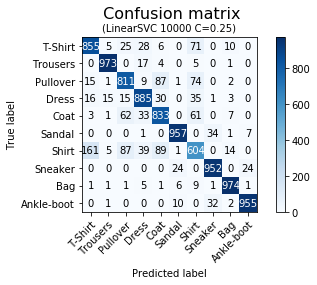

Test accuracy:  0.8799 

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1000
           1       0.97      0.97      0.97      1000
           2       0.81      0.81      0.81      1000
           3       0.87      0.89      0.88      1000
           4       0.79      0.83      0.81      1000
           5       0.96      0.96      0.96      1000
           6       0.70      0.60      0.65      1000
           7       0.93      0.95      0.94      1000
           8       0.96      0.97      0.97      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



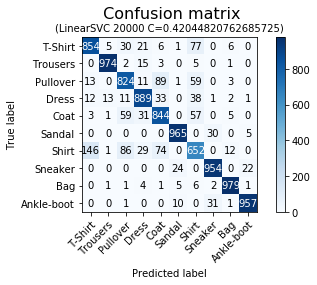

Test accuracy:  0.8892 

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1000
           1       0.98      0.97      0.98      1000
           2       0.81      0.82      0.82      1000
           3       0.89      0.89      0.89      1000
           4       0.80      0.84      0.82      1000
           5       0.96      0.96      0.96      1000
           6       0.73      0.65      0.69      1000
           7       0.94      0.95      0.95      1000
           8       0.97      0.98      0.97      1000
           9       0.97      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



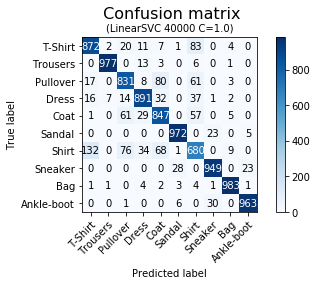

Test accuracy:  0.8965 

              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1000
           1       0.99      0.98      0.98      1000
           2       0.83      0.83      0.83      1000
           3       0.90      0.89      0.90      1000
           4       0.82      0.85      0.83      1000
           5       0.96      0.97      0.97      1000
           6       0.73      0.68      0.71      1000
           7       0.95      0.95      0.95      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



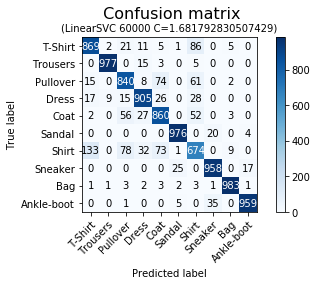

Test accuracy:  0.9001 

              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1000
           1       0.99      0.98      0.98      1000
           2       0.83      0.84      0.83      1000
           3       0.91      0.91      0.91      1000
           4       0.82      0.86      0.84      1000
           5       0.97      0.98      0.97      1000
           6       0.74      0.67      0.71      1000
           7       0.94      0.96      0.95      1000
           8       0.98      0.98      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [37]:
############################################################################
##################  LinearSVC, squared_hinge, ohne StandardScaler, ohne PCA ########
##################  Training mit optimierten Hyperparametern
############################################################################
#######  seed 1 ##########

train_LinearSVC_sq(X_tr_500, X_test_9_4_2, y_tr_500, y_test, 1, '500', 0.125,
               "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler_l2_sq_hinge", "HOG_942.pkl")
train_LinearSVC_sq(X_tr_1000, X_test_9_4_2, y_tr_1000, y_test, 1, '1000',0.29730177875068026,
               "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler_l2_sq_hinge", "HOG_942.pkl")
train_LinearSVC_sq(X_tr_2000, X_test_9_4_2, y_tr_2000, y_test, 1, '2000',0.3535533905932738,
               "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler_l2_sq_hinge", "HOG_942.pkl")
train_LinearSVC_sq(X_tr_5000, X_test_9_4_2, y_tr_5000, y_test, 1, '5000',0.21022410381342863,
               "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler_l2_sq_hinge", "HOG_942.pkl")
train_LinearSVC_sq(X_tr_10000, X_test_9_4_2, y_tr_10000, y_test, 1, '10000',0.25,
               "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler_l2_sq_hinge", "HOG_942.pkl")
train_LinearSVC_sq(X_tr_20000, X_test_9_4_2, y_tr_20000, y_test, 1, '20000',0.42044820762685725,
               "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler_l2_sq_hinge", "HOG_942.pkl")
train_LinearSVC_sq(X_tr_40000, X_test_9_4_2, y_tr_40000, y_test, 1, '40000',1.0,
               "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler_l2_sq_hinge", "HOG_942.pkl")
train_LinearSVC_sq(X_train_9_4_2, X_test_9_4_2, y_train, y_test, 1, '60000',1.681792830507429,
               "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler_l2_sq_hinge", "HOG_942.pkl")

In [36]:
get_finer_range(0.25)

array([0.06, 0.07, 0.09, 0.11, 0.12, 0.15, 0.18, 0.21, 0.25, 0.3 , 0.35,
       0.42, 0.5 , 0.59, 0.71, 0.84, 1.  ])

In [134]:
###########################################################################
#####   GridSearchCV   LinearSVC    ohne StandardScaler      ##############
###########################################################################

In [138]:
'''
GridSearchCV LinearSVC ohne StandardScaler, ohne PCA     1. Durchlauf
speichern
'''
'''
print("GridSearch LinearSVC 500 1. Durchlauf")
clf_500_LinearSVC, time_500 = tuning_hyper_params(X_tr_500, y_tr_500, X_test_9_4_2, y_test, 
                                        'LinearSVC',10, 0, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_500_LinearSVC, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/500/seed_1_random_A_without_scaler/GridSearch_1DL.pkl")
save_as_csv(time_500, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/500/seed_1_random_A_without_scaler/", 'Suchzeiten_GridSearch_1_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 1000 1. Durchlauf")
clf_1000_LinearSVC, time_1000 = tuning_hyper_params(X_tr_1000, y_tr_1000, X_test_9_4_2, y_test, 
                                        'LinearSVC',10, 0, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_1000_LinearSVC, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/1000/seed_1_random_A_without_scaler/GridSearch_1DL.pkl")
save_as_csv(time_1000, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/1000/seed_1_random_A_without_scaler/", 'Suchzeiten_GridSearch_1_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 2000 1. Durchlauf")
clf_2000_LinearSVC, time_2000 = tuning_hyper_params(X_tr_2000, y_tr_2000, X_test_9_4_2, y_test, 
                                        'LinearSVC',10, 0, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_2000_LinearSVC, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/2000/seed_1_random_A_without_scaler/GridSearch_1DL.pkl")
save_as_csv(time_2000, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/2000/seed_1_random_A_without_scaler/", 'Suchzeiten_GridSearch_1_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 5000 1. Durchlauf")
clf_5000_LinearSVC, time_5000 = tuning_hyper_params(X_tr_5000, y_tr_5000, X_test_9_4_2, y_test, 
                                        'LinearSVC',5, 0, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_5000_LinearSVC, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/5000/seed_1_random_A_without_scaler/GridSearch_1DL.pkl")
save_as_csv(time_5000, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/5000/seed_1_random_A_without_scaler/", 'Suchzeiten_GridSearch_1_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 10000 1. Durchlauf")
clf_10000_LinearSVC, time_10000 = tuning_hyper_params(X_tr_10000, y_tr_10000, X_test_9_4_2, y_test, 
                                        'LinearSVC',5, 0, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_10000_LinearSVC, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/10000/seed_1_random_A_without_scaler/GridSearch_1DL.pkl")
save_as_csv(time_10000, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/10000/seed_1_random_A_without_scaler/", 'Suchzeiten_GridSearch_1_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 20000 1. Durchlauf")
clf_20000_LinearSVC, time_20000 = tuning_hyper_params(X_tr_20000, y_tr_20000, X_test_9_4_2, y_test, 
                                        'LinearSVC',3, 0, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_20000_LinearSVC, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/20000/seed_1_random_A_without_scaler/GridSearch_1DL.pkl")
save_as_csv(time_20000, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/20000/seed_1_random_A_without_scaler/", 'Suchzeiten_GridSearch_1_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 40000 1. Durchlauf")
clf_40000_LinearSVC, time_40000 = tuning_hyper_params(X_tr_40000, y_tr_40000, X_test_9_4_2, y_test, 
                                        'LinearSVC',3, 0, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_40000_LinearSVC, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/40000/seed_1_random_A_without_scaler/GridSearch_1DL.pkl")
save_as_csv(time_40000, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/40000/seed_1_random_A_without_scaler/", 'Suchzeiten_GridSearch_1_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 60000 1. Durchlauf")
clf_60000_LinearSVC, time_60000 = tuning_hyper_params(X_tr_60000, y_tr_60000, X_test_9_4_2, y_test, 
                                        'LinearSVC',3, 0, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_60000_LinearSVC, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/60000/seed_1_random_A_without_scaler/GridSearch_1DL.pkl")
save_as_csv(time_60000, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/60000/seed_1_random_A_without_scaler/", 'Suchzeiten_GridSearch_1_DL.csv')
'''

GridSearch LinearSVC 500 1. Durchlauf

 C_range: [1.52587891e-05 6.10351562e-05 2.44140625e-04 9.76562500e-04
 3.90625000e-03 1.56250000e-02 6.25000000e-02 2.50000000e-01
 1.00000000e+00 4.00000000e+00 1.60000000e+01 6.40000000e+01
 2.56000000e+02 1.02400000e+03]

 Bester Score:  0.812

 Besten Parameter:  {'svm__C': 1.0}
Bester Estimator score:  0.804
Precision-Score: 0.596376 (0.089285) mit Parameter: {'svm__C': 1.52587890625e-05}
Precision-Score: 0.596376 (0.089285) mit Parameter: {'svm__C': 6.103515625e-05}
Precision-Score: 0.596376 (0.089285) mit Parameter: {'svm__C': 0.000244140625}
Precision-Score: 0.572385 (0.039386) mit Parameter: {'svm__C': 0.0009765625}
Precision-Score: 0.723920 (0.057762) mit Parameter: {'svm__C': 0.00390625}
Precision-Score: 0.748329 (0.062407) mit Parameter: {'svm__C': 0.015625}
Precision-Score: 0.774879 (0.065592) mit Parameter: {'svm__C': 0.0625}
Precision-Score: 0.836861 (0.039793) mit Parameter: {'svm__C': 0.25}
Precision-Score: 0.831488 (0.069175) mi


 C_range: [1.52587891e-05 6.10351562e-05 2.44140625e-04 9.76562500e-04
 3.90625000e-03 1.56250000e-02 6.25000000e-02 2.50000000e-01
 1.00000000e+00 4.00000000e+00 1.60000000e+01 6.40000000e+01
 2.56000000e+02 1.02400000e+03]

 Bester Score:  0.843

 Besten Parameter:  {'svm__C': 1.0}
Bester Estimator score:  0.8453
Precision-Score: 0.588265 (0.062677) mit Parameter: {'svm__C': 1.52587890625e-05}
Precision-Score: 0.588265 (0.062677) mit Parameter: {'svm__C': 6.103515625e-05}
Precision-Score: 0.589506 (0.048474) mit Parameter: {'svm__C': 0.000244140625}
Precision-Score: 0.744059 (0.028927) mit Parameter: {'svm__C': 0.0009765625}
Precision-Score: 0.749309 (0.028237) mit Parameter: {'svm__C': 0.00390625}
Precision-Score: 0.800199 (0.016228) mit Parameter: {'svm__C': 0.015625}
Precision-Score: 0.822379 (0.032039) mit Parameter: {'svm__C': 0.0625}
Precision-Score: 0.844246 (0.016465) mit Parameter: {'svm__C': 0.25}
Precision-Score: 0.846472 (0.017710) mit Parameter: {'svm__C': 1.0}
Precisio

C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



 C_range: [1.52587891e-05 6.10351562e-05 2.44140625e-04 9.76562500e-04
 3.90625000e-03 1.56250000e-02 6.25000000e-02 2.50000000e-01
 1.00000000e+00 4.00000000e+00 1.60000000e+01 6.40000000e+01
 2.56000000e+02 1.02400000e+03]

 Bester Score:  0.8574

 Besten Parameter:  {'svm__C': 1.0}
Bester Estimator score:  0.8644
Precision-Score: 0.635282 (0.009839) mit Parameter: {'svm__C': 1.52587890625e-05}
Precision-Score: 0.635282 (0.009839) mit Parameter: {'svm__C': 6.103515625e-05}
Precision-Score: 0.718723 (0.018531) mit Parameter: {'svm__C': 0.000244140625}
Precision-Score: 0.749691 (0.012692) mit Parameter: {'svm__C': 0.0009765625}
Precision-Score: 0.774674 (0.006024) mit Parameter: {'svm__C': 0.00390625}
Precision-Score: 0.811792 (0.006098) mit Parameter: {'svm__C': 0.015625}
Precision-Score: 0.841341 (0.005988) mit Parameter: {'svm__C': 0.0625}
Precision-Score: 0.854741 (0.006557) mit Parameter: {'svm__C': 0.25}
Precision-Score: 0.856378 (0.006988) mit Parameter: {'svm__C': 1.0}
Precisi

C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



 C_range: [1.52587891e-05 6.10351562e-05 2.44140625e-04 9.76562500e-04
 3.90625000e-03 1.56250000e-02 6.25000000e-02 2.50000000e-01
 1.00000000e+00 4.00000000e+00 1.60000000e+01 6.40000000e+01
 2.56000000e+02 1.02400000e+03]

 Bester Score:  0.8761

 Besten Parameter:  {'svm__C': 1.0}
Bester Estimator score:  0.878
Precision-Score: 0.634170 (0.005617) mit Parameter: {'svm__C': 1.52587890625e-05}
Precision-Score: 0.714630 (0.023753) mit Parameter: {'svm__C': 6.103515625e-05}
Precision-Score: 0.744395 (0.002744) mit Parameter: {'svm__C': 0.000244140625}
Precision-Score: 0.760641 (0.004519) mit Parameter: {'svm__C': 0.0009765625}
Precision-Score: 0.797860 (0.005925) mit Parameter: {'svm__C': 0.00390625}
Precision-Score: 0.829537 (0.008199) mit Parameter: {'svm__C': 0.015625}
Precision-Score: 0.854827 (0.009147) mit Parameter: {'svm__C': 0.0625}
Precision-Score: 0.869680 (0.008008) mit Parameter: {'svm__C': 0.25}
Precision-Score: 0.875202 (0.004453) mit Parameter: {'svm__C': 1.0}
Precisio

C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



 C_range: [1.52587891e-05 6.10351562e-05 2.44140625e-04 9.76562500e-04
 3.90625000e-03 1.56250000e-02 6.25000000e-02 2.50000000e-01
 1.00000000e+00 4.00000000e+00 1.60000000e+01 6.40000000e+01
 2.56000000e+02 1.02400000e+03]

 Bester Score:  0.88455

 Besten Parameter:  {'svm__C': 1.0}
Bester Estimator score:  0.8881
Precision-Score: 0.633889 (0.003877) mit Parameter: {'svm__C': 1.52587890625e-05}
Precision-Score: 0.714365 (0.002602) mit Parameter: {'svm__C': 6.103515625e-05}
Precision-Score: 0.754146 (0.002782) mit Parameter: {'svm__C': 0.000244140625}
Precision-Score: 0.777804 (0.001618) mit Parameter: {'svm__C': 0.0009765625}
Precision-Score: 0.814459 (0.001901) mit Parameter: {'svm__C': 0.00390625}
Precision-Score: 0.843454 (0.001760) mit Parameter: {'svm__C': 0.015625}
Precision-Score: 0.863084 (0.002567) mit Parameter: {'svm__C': 0.0625}
Precision-Score: 0.878540 (0.000938) mit Parameter: {'svm__C': 0.25}
Precision-Score: 0.883440 (0.002890) mit Parameter: {'svm__C': 1.0}
Precis

C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



 C_range: [1.52587891e-05 6.10351562e-05 2.44140625e-04 9.76562500e-04
 3.90625000e-03 1.56250000e-02 6.25000000e-02 2.50000000e-01
 1.00000000e+00 4.00000000e+00 1.60000000e+01 6.40000000e+01
 2.56000000e+02 1.02400000e+03]

 Bester Score:  0.892475

 Besten Parameter:  {'svm__C': 4.0}
Bester Estimator score:  0.8943
Precision-Score: 0.628585 (0.000513) mit Parameter: {'svm__C': 1.52587890625e-05}
Precision-Score: 0.736198 (0.002093) mit Parameter: {'svm__C': 6.103515625e-05}
Precision-Score: 0.757758 (0.001132) mit Parameter: {'svm__C': 0.000244140625}
Precision-Score: 0.792465 (0.000460) mit Parameter: {'svm__C': 0.0009765625}
Precision-Score: 0.827839 (0.000577) mit Parameter: {'svm__C': 0.00390625}
Precision-Score: 0.851624 (0.002575) mit Parameter: {'svm__C': 0.015625}
Precision-Score: 0.871861 (0.001808) mit Parameter: {'svm__C': 0.0625}
Precision-Score: 0.885091 (0.001617) mit Parameter: {'svm__C': 0.25}
Precision-Score: 0.890607 (0.001437) mit Parameter: {'svm__C': 1.0}
Preci

NameError: name 'X_tr_60000' is not defined

In [139]:
print("GridSearch LinearSVC 60000 1. Durchlauf")
clf_60000_LinearSVC, time_60000 = tuning_hyper_params(X_train_9_4_2 , y_train, X_test_9_4_2, y_test, 
                                        'LinearSVC',3, 0, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_60000_LinearSVC, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/60000/seed_1_random_A_without_scaler/GridSearch_1DL.pkl")
save_as_csv(time_60000, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/60000/seed_1_random_A_without_scaler/", 'Suchzeiten_GridSearch_1_DL.csv')


GridSearch LinearSVC 60000 1. Durchlauf


C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



 C_range: [1.52587891e-05 6.10351562e-05 2.44140625e-04 9.76562500e-04
 3.90625000e-03 1.56250000e-02 6.25000000e-02 2.50000000e-01
 1.00000000e+00 4.00000000e+00 1.60000000e+01 6.40000000e+01
 2.56000000e+02 1.02400000e+03]

 Bester Score:  0.8964

 Besten Parameter:  {'svm__C': 4.0}
Bester Estimator score:  0.8981
Precision-Score: 0.709227 (0.001935) mit Parameter: {'svm__C': 1.52587890625e-05}
Precision-Score: 0.743396 (0.000365) mit Parameter: {'svm__C': 6.103515625e-05}
Precision-Score: 0.764413 (0.000770) mit Parameter: {'svm__C': 0.000244140625}
Precision-Score: 0.800563 (0.000610) mit Parameter: {'svm__C': 0.0009765625}
Precision-Score: 0.832233 (0.001911) mit Parameter: {'svm__C': 0.00390625}
Precision-Score: 0.859158 (0.002072) mit Parameter: {'svm__C': 0.015625}
Precision-Score: 0.877450 (0.001878) mit Parameter: {'svm__C': 0.0625}
Precision-Score: 0.888063 (0.002018) mit Parameter: {'svm__C': 0.25}
Precision-Score: 0.893644 (0.001718) mit Parameter: {'svm__C': 1.0}
Precisi

In [145]:
'''
GridSearchCV LinearSVC ohne StandardScaler, ohne PCA    2. Durchlauf
                    Fine-tuning
'''

'''
print("GridSearch LinearSVC 500 2. Durchlauf")
clf_500_LinearSVC, time_500 = tuning_hyper_params(X_tr_500, y_tr_500, X_test_9_4_2, y_test,
                                                  'LinearSVC',10, 0, 0, 
                                                  get_finer_range(1), np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_500_LinearSVC, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/500/seed_1_random_A_without_scaler/GridSearch_2DL.pkl")
save_as_csv(time_500, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/500/seed_1_random_A_without_scaler/", 'Suchzeiten_GridSearch_2_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 1000 2. Durchlauf")
clf_1000_LinearSVC, time_1000 = tuning_hyper_params(X_tr_1000, y_tr_1000, X_test_9_4_2, y_test,
                                                    'LinearSVC',10, 0, 0, get_finer_range(1),
                                                    np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_1000_LinearSVC, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/1000/seed_1_random_A_without_scaler/GridSearch_2DL.pkl")
save_as_csv(time_1000, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/1000/seed_1_random_A_without_scaler/", 'Suchzeiten_GridSearch_2_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 2000 2. Durchlauf")
clf_2000_LinearSVC, time_2000 = tuning_hyper_params(X_tr_2000, y_tr_2000, X_test_9_4_2, y_test,
                                                    'LinearSVC',10, 0, 0, get_finer_range(1),
                                                    np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_2000_LinearSVC, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/2000/seed_1_random_A_without_scaler/GridSearch_2DL.pkl")
save_as_csv(time_2000, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/2000/seed_1_random_A_without_scaler/", 'Suchzeiten_GridSearch_2_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 5000 2. Durchlauf")
clf_5000_LinearSVC, time_5000 = tuning_hyper_params(X_tr_5000, y_tr_5000, X_test_9_4_2, y_test,
                                                    'LinearSVC',5, 0, 0, get_finer_range(1),
                                                    np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_5000_LinearSVC, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/5000/seed_1_random_A_without_scaler/GridSearch_2DL.pkl")
save_as_csv(time_5000, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/5000/seed_1_random_A_without_scaler/", 'Suchzeiten_GridSearch_2_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 10000 2. Durchlauf")
clf_10000_LinearSVC, time_10000 = tuning_hyper_params(X_tr_10000, y_tr_10000, X_test_9_4_2, y_test,
                                                      'LinearSVC',5, 0, 0, get_finer_range(1),
                                                      np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_10000_LinearSVC, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/10000/seed_1_random_A_without_scaler/GridSearch_2DL.pkl")
save_as_csv(time_10000, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/10000/seed_1_random_A_without_scaler/", 'Suchzeiten_GridSearch_2_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 20000 2. Durchlauf")
clf_20000_LinearSVC, time_20000 = tuning_hyper_params(X_tr_20000, y_tr_20000, X_test_9_4_2, y_test,
                                                      'LinearSVC',3, 0, 0, get_finer_range(1),
                                                      np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_20000_LinearSVC, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/20000/seed_1_random_A_without_scaler/GridSearch_2DL.pkl")
save_as_csv(time_20000, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/20000/seed_1_random_A_without_scaler/", 'Suchzeiten_GridSearch_2_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 40000 2. Durchlauf")
clf_40000_LinearSVC, time_40000 = tuning_hyper_params(X_tr_40000, y_tr_40000, X_test_9_4_2, y_test,
                                                      'LinearSVC',3, 0, 0, get_finer_range(4),
                                                      np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_40000_LinearSVC, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/40000/seed_1_random_A_without_scaler/GridSearch_2DL.pkl")
save_as_csv(time_40000, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/40000/seed_1_random_A_without_scaler/", 'Suchzeiten_GridSearch_2_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 60000 2. Durchlauf")
clf_60000_LinearSVC, time_60000 = tuning_hyper_params(X_train_9_4_2, y_train, X_test_9_4_2, y_test,
                                                      'LinearSVC',3, 0, 0, get_finer_range(4),
                                                      np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_60000_LinearSVC, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/60000/seed_1_random_A_without_scaler/GridSearch_2DL.pkl")
save_as_csv(time_60000, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/60000/seed_1_random_A_without_scaler/", 'Suchzeiten_GridSearch_2_DL.csv')
'''

GridSearch LinearSVC 500 2. Durchlauf

 C_range: [0.25       0.29730178 0.35355339 0.42044821 0.5        0.59460356
 0.70710678 0.84089642 1.         1.18920712 1.41421356 1.68179283
 2.         2.37841423 2.82842712 3.36358566 4.        ]

 Bester Score:  0.812

 Besten Parameter:  {'svm__C': 0.42044820762685725}
Bester Estimator score:  0.8078
Precision-Score: 0.836861 (0.039793) mit Parameter: {'svm__C': 0.25}
Precision-Score: 0.838222 (0.051909) mit Parameter: {'svm__C': 0.29730177875068026}
Precision-Score: 0.841889 (0.047381) mit Parameter: {'svm__C': 0.3535533905932738}
Precision-Score: 0.844071 (0.044486) mit Parameter: {'svm__C': 0.42044820762685725}
Precision-Score: 0.836762 (0.047299) mit Parameter: {'svm__C': 0.5}
Precision-Score: 0.839944 (0.052881) mit Parameter: {'svm__C': 0.5946035575013605}
Precision-Score: 0.831821 (0.058472) mit Parameter: {'svm__C': 0.7071067811865476}
Precision-Score: 0.829286 (0.058065) mit Parameter: {'svm__C': 0.8408964152537145}
Precision-Score

*********************************************************************
GridSearch LinearSVC 2000 2. Durchlauf

 C_range: [0.25       0.29730178 0.35355339 0.42044821 0.5        0.59460356
 0.70710678 0.84089642 1.         1.18920712 1.41421356 1.68179283
 2.         2.37841423 2.82842712 3.36358566 4.        ]

 Bester Score:  0.849

 Besten Parameter:  {'svm__C': 1.4142135623730951}
Bester Estimator score:  0.8458
Precision-Score: 0.844246 (0.016465) mit Parameter: {'svm__C': 0.25}
Precision-Score: 0.843499 (0.019383) mit Parameter: {'svm__C': 0.29730177875068026}
Precision-Score: 0.844165 (0.020158) mit Parameter: {'svm__C': 0.3535533905932738}
Precision-Score: 0.845261 (0.021190) mit Parameter: {'svm__C': 0.42044820762685725}
Precision-Score: 0.840043 (0.017307) mit Parameter: {'svm__C': 0.5}
Precision-Score: 0.842052 (0.012164) mit Parameter: {'svm__C': 0.5946035575013605}
Precision-Score: 0.844011 (0.011066) mit Parameter: {'svm__C': 0.7071067811865476}
Precision-Score: 0.844791 (0

*********************************************************************
GridSearch LinearSVC 10000 2. Durchlauf

 C_range: [0.25       0.29730178 0.35355339 0.42044821 0.5        0.59460356
 0.70710678 0.84089642 1.         1.18920712 1.41421356 1.68179283
 2.         2.37841423 2.82842712 3.36358566 4.        ]

 Bester Score:  0.8772

 Besten Parameter:  {'svm__C': 0.5946035575013605}
Bester Estimator score:  0.8765
Precision-Score: 0.869680 (0.008008) mit Parameter: {'svm__C': 0.25}
Precision-Score: 0.870662 (0.007099) mit Parameter: {'svm__C': 0.29730177875068026}
Precision-Score: 0.872504 (0.006811) mit Parameter: {'svm__C': 0.3535533905932738}
Precision-Score: 0.874325 (0.006662) mit Parameter: {'svm__C': 0.42044820762685725}
Precision-Score: 0.875655 (0.007120) mit Parameter: {'svm__C': 0.5}
Precision-Score: 0.876009 (0.006824) mit Parameter: {'svm__C': 0.5946035575013605}
Precision-Score: 0.875703 (0.005133) mit Parameter: {'svm__C': 0.7071067811865476}
Precision-Score: 0.875575 

C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



 C_range: [0.25       0.29730178 0.35355339 0.42044821 0.5        0.59460356
 0.70710678 0.84089642 1.         1.18920712 1.41421356 1.68179283
 2.         2.37841423 2.82842712 3.36358566 4.        ]

 Bester Score:  0.88475

 Besten Parameter:  {'svm__C': 1.4142135623730951}
Bester Estimator score:  0.888
Precision-Score: 0.878540 (0.000938) mit Parameter: {'svm__C': 0.25}
Precision-Score: 0.880271 (0.001387) mit Parameter: {'svm__C': 0.29730177875068026}
Precision-Score: 0.881069 (0.001262) mit Parameter: {'svm__C': 0.3535533905932738}
Precision-Score: 0.881675 (0.001325) mit Parameter: {'svm__C': 0.42044820762685725}
Precision-Score: 0.882130 (0.001439) mit Parameter: {'svm__C': 0.5}
Precision-Score: 0.882358 (0.000869) mit Parameter: {'svm__C': 0.5946035575013605}
Precision-Score: 0.882832 (0.001488) mit Parameter: {'svm__C': 0.7071067811865476}
Precision-Score: 0.883304 (0.002127) mit Parameter: {'svm__C': 0.8408964152537145}
Precision-Score: 0.883440 (0.002890) mit Parameter: {

C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



 C_range: [ 1.          1.18920712  1.41421356  1.68179283  2.          2.37841423
  2.82842712  3.36358566  4.          4.75682846  5.65685425  6.72717132
  8.          9.51365692 11.3137085  13.45434264 16.        ]

 Bester Score:  0.892475

 Besten Parameter:  {'svm__C': 4.0}
Bester Estimator score:  0.8943
Precision-Score: 0.890607 (0.001437) mit Parameter: {'svm__C': 1.0}
Precision-Score: 0.890479 (0.001474) mit Parameter: {'svm__C': 1.189207115002721}
Precision-Score: 0.890335 (0.001559) mit Parameter: {'svm__C': 1.4142135623730951}
Precision-Score: 0.891107 (0.001466) mit Parameter: {'svm__C': 1.681792830507429}
Precision-Score: 0.891316 (0.001140) mit Parameter: {'svm__C': 2.0}
Precision-Score: 0.891035 (0.001338) mit Parameter: {'svm__C': 2.378414230005442}
Precision-Score: 0.891258 (0.001370) mit Parameter: {'svm__C': 2.8284271247461903}
Precision-Score: 0.891321 (0.001385) mit Parameter: {'svm__C': 3.363585661014858}
Precision-Score: 0.891427 (0.002345) mit Parameter: {'sv

C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



 C_range: [ 1.          1.18920712  1.41421356  1.68179283  2.          2.37841423
  2.82842712  3.36358566  4.          4.75682846  5.65685425  6.72717132
  8.          9.51365692 11.3137085  13.45434264 16.        ]

 Bester Score:  0.8964333333333333

 Besten Parameter:  {'svm__C': 3.363585661014858}
Bester Estimator score:  0.8983
Precision-Score: 0.893644 (0.001718) mit Parameter: {'svm__C': 1.0}
Precision-Score: 0.893957 (0.001388) mit Parameter: {'svm__C': 1.189207115002721}
Precision-Score: 0.894555 (0.001639) mit Parameter: {'svm__C': 1.4142135623730951}
Precision-Score: 0.894754 (0.001286) mit Parameter: {'svm__C': 1.681792830507429}
Precision-Score: 0.894760 (0.001188) mit Parameter: {'svm__C': 2.0}
Precision-Score: 0.895204 (0.001331) mit Parameter: {'svm__C': 2.378414230005442}
Precision-Score: 0.895366 (0.001672) mit Parameter: {'svm__C': 2.8284271247461903}
Precision-Score: 0.895508 (0.001729) mit Parameter: {'svm__C': 3.363585661014858}
Precision-Score: 0.895511 (0.001

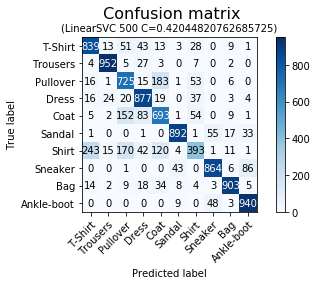

Test accuracy:  0.8078 

              precision    recall  f1-score   support

           0       0.74      0.84      0.78      1000
           1       0.94      0.95      0.95      1000
           2       0.64      0.72      0.68      1000
           3       0.79      0.88      0.83      1000
           4       0.65      0.69      0.67      1000
           5       0.93      0.89      0.91      1000
           6       0.68      0.39      0.50      1000
           7       0.89      0.86      0.88      1000
           8       0.93      0.90      0.92      1000
           9       0.88      0.94      0.91      1000

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.80     10000
weighted avg       0.81      0.81      0.80     10000



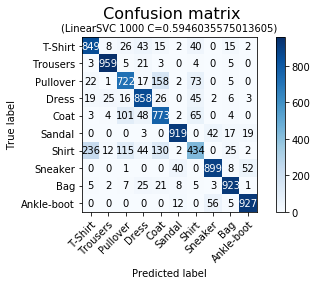

Test accuracy:  0.8263 

              precision    recall  f1-score   support

           0       0.75      0.85      0.79      1000
           1       0.95      0.96      0.95      1000
           2       0.73      0.72      0.72      1000
           3       0.81      0.86      0.83      1000
           4       0.69      0.77      0.73      1000
           5       0.93      0.92      0.93      1000
           6       0.65      0.43      0.52      1000
           7       0.90      0.90      0.90      1000
           8       0.91      0.92      0.92      1000
           9       0.92      0.93      0.92      1000

    accuracy                           0.83     10000
   macro avg       0.82      0.83      0.82     10000
weighted avg       0.82      0.83      0.82     10000



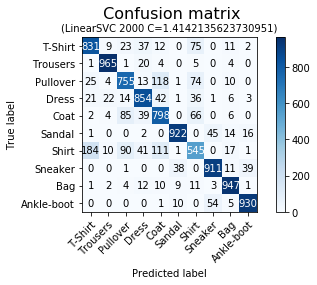

Test accuracy:  0.8458 

              precision    recall  f1-score   support

           0       0.78      0.83      0.80      1000
           1       0.95      0.96      0.96      1000
           2       0.78      0.76      0.77      1000
           3       0.84      0.85      0.85      1000
           4       0.73      0.80      0.76      1000
           5       0.94      0.92      0.93      1000
           6       0.67      0.55      0.60      1000
           7       0.90      0.91      0.90      1000
           8       0.92      0.95      0.93      1000
           9       0.94      0.93      0.93      1000

    accuracy                           0.85     10000
   macro avg       0.84      0.85      0.84     10000
weighted avg       0.84      0.85      0.84     10000



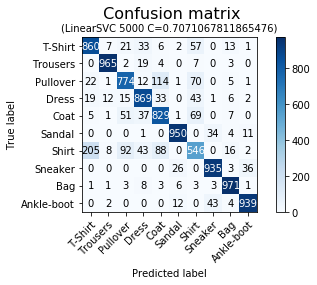

Test accuracy:  0.8638 

              precision    recall  f1-score   support

           0       0.77      0.86      0.81      1000
           1       0.97      0.96      0.97      1000
           2       0.81      0.77      0.79      1000
           3       0.85      0.87      0.86      1000
           4       0.77      0.83      0.80      1000
           5       0.95      0.95      0.95      1000
           6       0.69      0.55      0.61      1000
           7       0.92      0.94      0.93      1000
           8       0.94      0.97      0.96      1000
           9       0.95      0.94      0.94      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



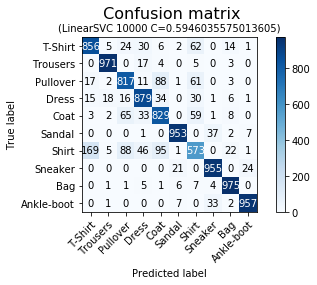

Test accuracy:  0.8765 

              precision    recall  f1-score   support

           0       0.81      0.86      0.83      1000
           1       0.97      0.97      0.97      1000
           2       0.81      0.82      0.81      1000
           3       0.86      0.88      0.87      1000
           4       0.78      0.83      0.81      1000
           5       0.96      0.95      0.96      1000
           6       0.72      0.57      0.64      1000
           7       0.93      0.95      0.94      1000
           8       0.94      0.97      0.96      1000
           9       0.97      0.96      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.87      0.88      0.87     10000
weighted avg       0.87      0.88      0.87     10000



C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


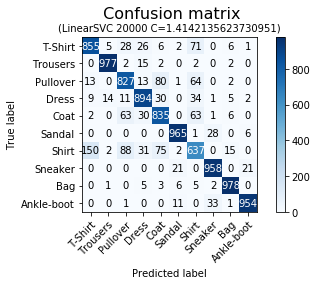

Test accuracy:  0.888 

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1000
           1       0.98      0.98      0.98      1000
           2       0.81      0.83      0.82      1000
           3       0.88      0.89      0.89      1000
           4       0.81      0.83      0.82      1000
           5       0.96      0.96      0.96      1000
           6       0.73      0.64      0.68      1000
           7       0.94      0.96      0.95      1000
           8       0.96      0.98      0.97      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


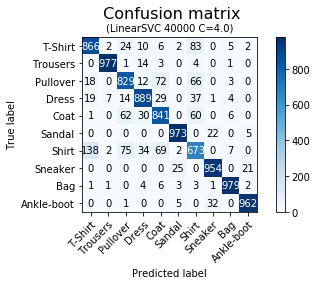

Test accuracy:  0.8943 

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1000
           1       0.99      0.98      0.98      1000
           2       0.82      0.83      0.83      1000
           3       0.90      0.89      0.89      1000
           4       0.82      0.84      0.83      1000
           5       0.96      0.97      0.97      1000
           6       0.73      0.67      0.70      1000
           7       0.94      0.95      0.95      1000
           8       0.97      0.98      0.98      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


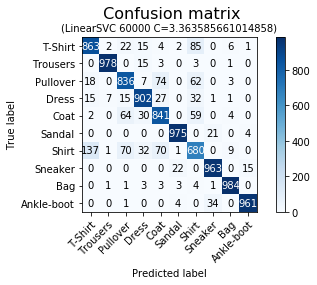

Test accuracy:  0.8983 

              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1000
           1       0.99      0.98      0.98      1000
           2       0.83      0.84      0.83      1000
           3       0.90      0.90      0.90      1000
           4       0.82      0.84      0.83      1000
           5       0.97      0.97      0.97      1000
           6       0.74      0.68      0.71      1000
           7       0.94      0.96      0.95      1000
           8       0.98      0.98      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [35]:
#######  seed 1, LinearSVC  mit optimierten C    trainieren     ##########

train_LinearSVC(X_tr_500, X_test_9_4_2, y_tr_500, y_test, 1, '500',0.42044820762685725,
               "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler", "HOG_942.pkl")
train_LinearSVC(X_tr_1000, X_test_9_4_2, y_tr_1000, y_test, 1, '1000',0.5946035575013605,
               "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler", "HOG_942.pkl")
train_LinearSVC(X_tr_2000, X_test_9_4_2, y_tr_2000, y_test, 1, '2000',1.4142135623730951,
               "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler", "HOG_942.pkl")
train_LinearSVC(X_tr_5000, X_test_9_4_2, y_tr_5000, y_test, 1, '5000',0.7071067811865476,
               "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler", "HOG_942.pkl")
train_LinearSVC(X_tr_10000, X_test_9_4_2, y_tr_10000, y_test, 1, '10000',0.5946035575013605,
               "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler", "HOG_942.pkl")
train_LinearSVC(X_tr_20000, X_test_9_4_2, y_tr_20000, y_test, 1, '20000',1.4142135623730951,
               "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler", "HOG_942.pkl")
train_LinearSVC(X_tr_40000, X_test_9_4_2, y_tr_40000, y_test, 1, '40000',4.0,
               "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler", "HOG_942.pkl")
train_LinearSVC(X_train_9_4_2, X_test_9_4_2, y_train, y_test, 1, '60000',3.363585661014858,
               "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler", "HOG_942.pkl")

In [ ]:
###########################################################################
#####   GridSearchCV   LinearSVC    StandardScaler   ohne std     #########
###########################################################################

In [146]:

'''
print("GridSearch LinearSVC 500 1. Durchlauf")
clf_500_LinearSVC, time_500 = tuning_hyper_params(X_tr_500, y_tr_500, X_test_9_4_2, y_test, 
                                        'LinearSVC',10, 1, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_500_LinearSVC, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/500/seed_1_random_A_with_scaler_without_std/GridSearch_1DL.pkl")
save_as_csv(time_500, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/500/seed_1_random_A_with_scaler_without_std/", 'Suchzeiten_GridSearch_1_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 1000 1. Durchlauf")
clf_1000_LinearSVC, time_1000 = tuning_hyper_params(X_tr_1000, y_tr_1000, X_test_9_4_2, y_test, 
                                        'LinearSVC',10, 1, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_1000_LinearSVC, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/1000/seed_1_random_A_with_scaler_without_std/GridSearch_1DL.pkl")
save_as_csv(time_1000, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/1000/seed_1_random_A_with_scaler_without_std/", 'Suchzeiten_GridSearch_1_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 2000 1. Durchlauf")
clf_2000_LinearSVC, time_2000 = tuning_hyper_params(X_tr_2000, y_tr_2000, X_test_9_4_2, y_test, 
                                        'LinearSVC',10, 1, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_2000_LinearSVC, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/2000/seed_1_random_A_with_scaler_without_std/GridSearch_1DL.pkl")
save_as_csv(time_2000, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/2000/seed_1_random_A_with_scaler_without_std/", 'Suchzeiten_GridSearch_1_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 5000 1. Durchlauf")
clf_5000_LinearSVC, time_5000 = tuning_hyper_params(X_tr_5000, y_tr_5000, X_test_9_4_2, y_test, 
                                        'LinearSVC',5, 1, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_5000_LinearSVC, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/5000/seed_1_random_A_with_scaler_without_std/GridSearch_1DL.pkl")
save_as_csv(time_5000, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/5000/seed_1_random_A_with_scaler_without_std/", 'Suchzeiten_GridSearch_1_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 10000 1. Durchlauf")
clf_10000_LinearSVC, time_10000 = tuning_hyper_params(X_tr_10000, y_tr_10000, X_test_9_4_2, y_test, 
                                        'LinearSVC',5, 1, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_10000_LinearSVC, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/10000/seed_1_random_A_with_scaler_without_std/GridSearch_1DL.pkl")
save_as_csv(time_10000, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/10000/seed_1_random_A_with_scaler_without_std/", 'Suchzeiten_GridSearch_1_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 20000 1. Durchlauf")
clf_20000_LinearSVC, time_20000 = tuning_hyper_params(X_tr_20000, y_tr_20000, X_test_9_4_2, y_test, 
                                        'LinearSVC',3, 1, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_20000_LinearSVC, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/20000/seed_1_random_A_with_scaler_without_std/GridSearch_1DL.pkl")
save_as_csv(time_20000, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/20000/seed_1_random_A_with_scaler_without_std/", 'Suchzeiten_GridSearch_1_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 40000 1. Durchlauf")
clf_40000_LinearSVC, time_40000 = tuning_hyper_params(X_tr_40000, y_tr_40000, X_test_9_4_2, y_test, 
                                        'LinearSVC',3, 1, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_40000_LinearSVC, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/40000/seed_1_random_A_with_scaler_without_std/GridSearch_1DL.pkl")
save_as_csv(time_40000, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/40000/seed_1_random_A_with_scaler_without_std/", 'Suchzeiten_GridSearch_1_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 60000 1. Durchlauf")
clf_60000_LinearSVC, time_60000 = tuning_hyper_params(X_train_9_4_2, y_train, X_test_9_4_2, y_test, 
                                        'LinearSVC',3, 1, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_60000_LinearSVC, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/60000/seed_1_random_A_with_scaler_without_std/GridSearch_1DL.pkl")
save_as_csv(time_60000, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/60000/seed_1_random_A_with_scaler_without_std/", 'Suchzeiten_GridSearch_1_DL.csv')
'''

GridSearch LinearSVC 500 1. Durchlauf

 C_range: [1.52587891e-05 6.10351562e-05 2.44140625e-04 9.76562500e-04
 3.90625000e-03 1.56250000e-02 6.25000000e-02 2.50000000e-01
 1.00000000e+00 4.00000000e+00 1.60000000e+01 6.40000000e+01
 2.56000000e+02 1.02400000e+03]

 Bester Score:  0.812

 Besten Parameter:  {'svm__C': 1.0}
Bester Estimator score:  0.8047
Precision-Score: 0.676922 (0.069070) mit Parameter: {'svm__C': 1.52587890625e-05}
Precision-Score: 0.676922 (0.069070) mit Parameter: {'svm__C': 6.103515625e-05}
Precision-Score: 0.676922 (0.069070) mit Parameter: {'svm__C': 0.000244140625}
Precision-Score: 0.676922 (0.069070) mit Parameter: {'svm__C': 0.0009765625}
Precision-Score: 0.605418 (0.076178) mit Parameter: {'svm__C': 0.00390625}
Precision-Score: 0.665795 (0.031261) mit Parameter: {'svm__C': 0.015625}
Precision-Score: 0.765188 (0.080603) mit Parameter: {'svm__C': 0.0625}
Precision-Score: 0.837242 (0.042255) mit Parameter: {'svm__C': 0.25}
Precision-Score: 0.829607 (0.069225) m


 C_range: [1.52587891e-05 6.10351562e-05 2.44140625e-04 9.76562500e-04
 3.90625000e-03 1.56250000e-02 6.25000000e-02 2.50000000e-01
 1.00000000e+00 4.00000000e+00 1.60000000e+01 6.40000000e+01
 2.56000000e+02 1.02400000e+03]

 Bester Score:  0.8405

 Besten Parameter:  {'svm__C': 1.0}
Bester Estimator score:  0.845
Precision-Score: 0.681187 (0.037901) mit Parameter: {'svm__C': 1.52587890625e-05}
Precision-Score: 0.681187 (0.037901) mit Parameter: {'svm__C': 6.103515625e-05}
Precision-Score: 0.681187 (0.037901) mit Parameter: {'svm__C': 0.000244140625}
Precision-Score: 0.585289 (0.056413) mit Parameter: {'svm__C': 0.0009765625}
Precision-Score: 0.683106 (0.061054) mit Parameter: {'svm__C': 0.00390625}
Precision-Score: 0.752101 (0.055592) mit Parameter: {'svm__C': 0.015625}
Precision-Score: 0.820370 (0.033540) mit Parameter: {'svm__C': 0.0625}
Precision-Score: 0.841275 (0.016425) mit Parameter: {'svm__C': 0.25}
Precision-Score: 0.843491 (0.017758) mit Parameter: {'svm__C': 1.0}
Precisio

C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



 C_range: [1.52587891e-05 6.10351562e-05 2.44140625e-04 9.76562500e-04
 3.90625000e-03 1.56250000e-02 6.25000000e-02 2.50000000e-01
 1.00000000e+00 4.00000000e+00 1.60000000e+01 6.40000000e+01
 2.56000000e+02 1.02400000e+03]

 Bester Score:  0.8756

 Besten Parameter:  {'svm__C': 1.0}
Bester Estimator score:  0.8785
Precision-Score: 0.693376 (0.022872) mit Parameter: {'svm__C': 1.52587890625e-05}
Precision-Score: 0.693376 (0.022872) mit Parameter: {'svm__C': 6.103515625e-05}
Precision-Score: 0.627510 (0.008419) mit Parameter: {'svm__C': 0.000244140625}
Precision-Score: 0.717457 (0.041516) mit Parameter: {'svm__C': 0.0009765625}
Precision-Score: 0.788399 (0.005389) mit Parameter: {'svm__C': 0.00390625}
Precision-Score: 0.827348 (0.008743) mit Parameter: {'svm__C': 0.015625}
Precision-Score: 0.854525 (0.010353) mit Parameter: {'svm__C': 0.0625}
Precision-Score: 0.869181 (0.008654) mit Parameter: {'svm__C': 0.25}
Precision-Score: 0.874682 (0.004151) mit Parameter: {'svm__C': 1.0}
Precisi

C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



 C_range: [1.52587891e-05 6.10351562e-05 2.44140625e-04 9.76562500e-04
 3.90625000e-03 1.56250000e-02 6.25000000e-02 2.50000000e-01
 1.00000000e+00 4.00000000e+00 1.60000000e+01 6.40000000e+01
 2.56000000e+02 1.02400000e+03]

 Bester Score:  0.88485

 Besten Parameter:  {'svm__C': 1.0}
Bester Estimator score:  0.8878
Precision-Score: 0.700621 (0.006541) mit Parameter: {'svm__C': 1.52587890625e-05}
Precision-Score: 0.701012 (0.006535) mit Parameter: {'svm__C': 6.103515625e-05}
Precision-Score: 0.624021 (0.006133) mit Parameter: {'svm__C': 0.000244140625}
Precision-Score: 0.755116 (0.001216) mit Parameter: {'svm__C': 0.0009765625}
Precision-Score: 0.805111 (0.003810) mit Parameter: {'svm__C': 0.00390625}
Precision-Score: 0.841273 (0.001674) mit Parameter: {'svm__C': 0.015625}
Precision-Score: 0.862834 (0.001844) mit Parameter: {'svm__C': 0.0625}
Precision-Score: 0.877869 (0.000440) mit Parameter: {'svm__C': 0.25}
Precision-Score: 0.883724 (0.003351) mit Parameter: {'svm__C': 1.0}
Precis

C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



 C_range: [1.52587891e-05 6.10351562e-05 2.44140625e-04 9.76562500e-04
 3.90625000e-03 1.56250000e-02 6.25000000e-02 2.50000000e-01
 1.00000000e+00 4.00000000e+00 1.60000000e+01 6.40000000e+01
 2.56000000e+02 1.02400000e+03]

 Bester Score:  0.8925

 Besten Parameter:  {'svm__C': 4.0}
Bester Estimator score:  0.8939
Precision-Score: 0.707568 (0.003199) mit Parameter: {'svm__C': 1.52587890625e-05}
Precision-Score: 0.631616 (0.001751) mit Parameter: {'svm__C': 6.103515625e-05}
Precision-Score: 0.694127 (0.048769) mit Parameter: {'svm__C': 0.000244140625}
Precision-Score: 0.780140 (0.002419) mit Parameter: {'svm__C': 0.0009765625}
Precision-Score: 0.824252 (0.000714) mit Parameter: {'svm__C': 0.00390625}
Precision-Score: 0.851348 (0.001951) mit Parameter: {'svm__C': 0.015625}
Precision-Score: 0.871743 (0.002064) mit Parameter: {'svm__C': 0.0625}
Precision-Score: 0.884854 (0.001811) mit Parameter: {'svm__C': 0.25}
Precision-Score: 0.890333 (0.001466) mit Parameter: {'svm__C': 1.0}
Precisi

C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



 C_range: [1.52587891e-05 6.10351562e-05 2.44140625e-04 9.76562500e-04
 3.90625000e-03 1.56250000e-02 6.25000000e-02 2.50000000e-01
 1.00000000e+00 4.00000000e+00 1.60000000e+01 6.40000000e+01
 2.56000000e+02 1.02400000e+03]

 Bester Score:  0.8963833333333333

 Besten Parameter:  {'svm__C': 4.0}
Bester Estimator score:  0.8985
Precision-Score: 0.701229 (0.001552) mit Parameter: {'svm__C': 1.52587890625e-05}
Precision-Score: 0.622179 (0.001841) mit Parameter: {'svm__C': 6.103515625e-05}
Precision-Score: 0.732596 (0.005164) mit Parameter: {'svm__C': 0.000244140625}
Precision-Score: 0.791830 (0.000847) mit Parameter: {'svm__C': 0.0009765625}
Precision-Score: 0.829898 (0.002433) mit Parameter: {'svm__C': 0.00390625}
Precision-Score: 0.858637 (0.001626) mit Parameter: {'svm__C': 0.015625}
Precision-Score: 0.876970 (0.001723) mit Parameter: {'svm__C': 0.0625}
Precision-Score: 0.888217 (0.001911) mit Parameter: {'svm__C': 0.25}
Precision-Score: 0.893523 (0.001508) mit Parameter: {'svm__C': 

In [147]:
'''
GridSearchCV LinearSVC mit StandardScaler, ohne std, ohne PCA    2. Durchlauf
                    Fine-tuning
'''
'''
print("GridSearch LinearSVC 500 2. Durchlauf")
clf_500_LinearSVC, time_500 = tuning_hyper_params(X_tr_500, y_tr_500, X_test_9_4_2, y_test,
                                                  'LinearSVC',10, 0, 0, 
                                                  get_finer_range(1), np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_500_LinearSVC, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/500/seed_1_random_A_with_scaler_without_std/GridSearch_2DL.pkl")
save_as_csv(time_500, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/500/seed_1_random_A_with_scaler_without_std/", 'Suchzeiten_GridSearch_2_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 1000 2. Durchlauf")
clf_1000_LinearSVC, time_1000 = tuning_hyper_params(X_tr_1000, y_tr_1000, X_test_9_4_2, y_test,
                                                    'LinearSVC',10, 0, 0, get_finer_range(1),
                                                    np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_1000_LinearSVC, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/1000/seed_1_random_A_with_scaler_without_std/GridSearch_2DL.pkl")
save_as_csv(time_1000, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/1000/seed_1_random_A_with_scaler_without_std/", 'Suchzeiten_GridSearch_2_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 2000 2. Durchlauf")
clf_2000_LinearSVC, time_2000 = tuning_hyper_params(X_tr_2000, y_tr_2000, X_test_9_4_2, y_test,
                                                    'LinearSVC',10, 0, 0, get_finer_range(1),
                                                    np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_2000_LinearSVC, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/2000/seed_1_random_A_with_scaler_without_std/GridSearch_2DL.pkl")
save_as_csv(time_2000, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/2000/seed_1_random_A_with_scaler_without_std/", 'Suchzeiten_GridSearch_2_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 5000 2. Durchlauf")
clf_5000_LinearSVC, time_5000 = tuning_hyper_params(X_tr_5000, y_tr_5000, X_test_9_4_2, y_test,
                                                    'LinearSVC',5, 0, 0, get_finer_range(1),
                                                    np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_5000_LinearSVC, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/5000/seed_1_random_A_with_scaler_without_std/GridSearch_2DL.pkl")
save_as_csv(time_5000, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/5000/seed_1_random_A_with_scaler_without_std/", 'Suchzeiten_GridSearch_2_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 10000 2. Durchlauf")
clf_10000_LinearSVC, time_10000 = tuning_hyper_params(X_tr_10000, y_tr_10000, X_test_9_4_2, y_test,
                                                      'LinearSVC',5, 0, 0, get_finer_range(1),
                                                      np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_10000_LinearSVC, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/10000/seed_1_random_A_with_scaler_without_std/GridSearch_2DL.pkl")
save_as_csv(time_10000, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/10000/seed_1_random_A_with_scaler_without_std/", 'Suchzeiten_GridSearch_2_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 20000 2. Durchlauf")
clf_20000_LinearSVC, time_20000 = tuning_hyper_params(X_tr_20000, y_tr_20000, X_test_9_4_2, y_test,
                                                      'LinearSVC',3, 0, 0, get_finer_range(1),
                                                      np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_20000_LinearSVC, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/20000/seed_1_random_A_with_scaler_without_std/GridSearch_2DL.pkl")
save_as_csv(time_20000, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/20000/seed_1_random_A_with_scaler_without_std/", 'Suchzeiten_GridSearch_2_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 40000 2. Durchlauf")
clf_40000_LinearSVC, time_40000 = tuning_hyper_params(X_tr_40000, y_tr_40000, X_test_9_4_2, y_test,
                                                      'LinearSVC',3, 0, 0, get_finer_range(4),
                                                      np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_40000_LinearSVC, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/40000/seed_1_random_A_with_scaler_without_std/GridSearch_2DL.pkl")
save_as_csv(time_40000, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/40000/seed_1_random_A_with_scaler_without_std/", 'Suchzeiten_GridSearch_2_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 60000 2. Durchlauf")
clf_60000_LinearSVC, time_60000 = tuning_hyper_params(X_train_9_4_2, y_train, X_test_9_4_2, y_test,
                                                      'LinearSVC',3, 0, 0, get_finer_range(4),
                                                      np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_60000_LinearSVC, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/60000/seed_1_random_A_with_scaler_without_std/GridSearch_2DL.pkl")
save_as_csv(time_60000, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/60000/seed_1_random_A_with_scaler_without_std/", 'Suchzeiten_GridSearch_2_DL.csv')
'''

GridSearch LinearSVC 500 2. Durchlauf

 C_range: [0.25       0.29730178 0.35355339 0.42044821 0.5        0.59460356
 0.70710678 0.84089642 1.         1.18920712 1.41421356 1.68179283
 2.         2.37841423 2.82842712 3.36358566 4.        ]

 Bester Score:  0.812

 Besten Parameter:  {'svm__C': 0.42044820762685725}
Bester Estimator score:  0.8078
Precision-Score: 0.836861 (0.039793) mit Parameter: {'svm__C': 0.25}
Precision-Score: 0.838222 (0.051909) mit Parameter: {'svm__C': 0.29730177875068026}
Precision-Score: 0.841889 (0.047381) mit Parameter: {'svm__C': 0.3535533905932738}
Precision-Score: 0.844071 (0.044486) mit Parameter: {'svm__C': 0.42044820762685725}
Precision-Score: 0.836762 (0.047299) mit Parameter: {'svm__C': 0.5}
Precision-Score: 0.839944 (0.052881) mit Parameter: {'svm__C': 0.5946035575013605}
Precision-Score: 0.831821 (0.058472) mit Parameter: {'svm__C': 0.7071067811865476}
Precision-Score: 0.829286 (0.058065) mit Parameter: {'svm__C': 0.8408964152537145}
Precision-Score

*********************************************************************
GridSearch LinearSVC 2000 2. Durchlauf

 C_range: [0.25       0.29730178 0.35355339 0.42044821 0.5        0.59460356
 0.70710678 0.84089642 1.         1.18920712 1.41421356 1.68179283
 2.         2.37841423 2.82842712 3.36358566 4.        ]

 Bester Score:  0.849

 Besten Parameter:  {'svm__C': 1.4142135623730951}
Bester Estimator score:  0.8458
Precision-Score: 0.844246 (0.016465) mit Parameter: {'svm__C': 0.25}
Precision-Score: 0.843499 (0.019383) mit Parameter: {'svm__C': 0.29730177875068026}
Precision-Score: 0.844165 (0.020158) mit Parameter: {'svm__C': 0.3535533905932738}
Precision-Score: 0.845261 (0.021190) mit Parameter: {'svm__C': 0.42044820762685725}
Precision-Score: 0.840043 (0.017307) mit Parameter: {'svm__C': 0.5}
Precision-Score: 0.842052 (0.012164) mit Parameter: {'svm__C': 0.5946035575013605}
Precision-Score: 0.844011 (0.011066) mit Parameter: {'svm__C': 0.7071067811865476}
Precision-Score: 0.844791 (0

*********************************************************************
GridSearch LinearSVC 10000 2. Durchlauf

 C_range: [0.25       0.29730178 0.35355339 0.42044821 0.5        0.59460356
 0.70710678 0.84089642 1.         1.18920712 1.41421356 1.68179283
 2.         2.37841423 2.82842712 3.36358566 4.        ]

 Bester Score:  0.8772

 Besten Parameter:  {'svm__C': 0.5946035575013605}
Bester Estimator score:  0.8765
Precision-Score: 0.869680 (0.008008) mit Parameter: {'svm__C': 0.25}
Precision-Score: 0.870662 (0.007099) mit Parameter: {'svm__C': 0.29730177875068026}
Precision-Score: 0.872504 (0.006811) mit Parameter: {'svm__C': 0.3535533905932738}
Precision-Score: 0.874325 (0.006662) mit Parameter: {'svm__C': 0.42044820762685725}
Precision-Score: 0.875655 (0.007120) mit Parameter: {'svm__C': 0.5}
Precision-Score: 0.876009 (0.006824) mit Parameter: {'svm__C': 0.5946035575013605}
Precision-Score: 0.875703 (0.005133) mit Parameter: {'svm__C': 0.7071067811865476}
Precision-Score: 0.875575 

C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



 C_range: [0.25       0.29730178 0.35355339 0.42044821 0.5        0.59460356
 0.70710678 0.84089642 1.         1.18920712 1.41421356 1.68179283
 2.         2.37841423 2.82842712 3.36358566 4.        ]

 Bester Score:  0.88475

 Besten Parameter:  {'svm__C': 1.4142135623730951}
Bester Estimator score:  0.888
Precision-Score: 0.878540 (0.000938) mit Parameter: {'svm__C': 0.25}
Precision-Score: 0.880271 (0.001387) mit Parameter: {'svm__C': 0.29730177875068026}
Precision-Score: 0.881069 (0.001262) mit Parameter: {'svm__C': 0.3535533905932738}
Precision-Score: 0.881675 (0.001325) mit Parameter: {'svm__C': 0.42044820762685725}
Precision-Score: 0.882130 (0.001439) mit Parameter: {'svm__C': 0.5}
Precision-Score: 0.882358 (0.000869) mit Parameter: {'svm__C': 0.5946035575013605}
Precision-Score: 0.882832 (0.001488) mit Parameter: {'svm__C': 0.7071067811865476}
Precision-Score: 0.883304 (0.002127) mit Parameter: {'svm__C': 0.8408964152537145}
Precision-Score: 0.883440 (0.002890) mit Parameter: {

C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



 C_range: [ 1.          1.18920712  1.41421356  1.68179283  2.          2.37841423
  2.82842712  3.36358566  4.          4.75682846  5.65685425  6.72717132
  8.          9.51365692 11.3137085  13.45434264 16.        ]

 Bester Score:  0.892475

 Besten Parameter:  {'svm__C': 4.0}
Bester Estimator score:  0.8943
Precision-Score: 0.890607 (0.001437) mit Parameter: {'svm__C': 1.0}
Precision-Score: 0.890479 (0.001474) mit Parameter: {'svm__C': 1.189207115002721}
Precision-Score: 0.890335 (0.001559) mit Parameter: {'svm__C': 1.4142135623730951}
Precision-Score: 0.891107 (0.001466) mit Parameter: {'svm__C': 1.681792830507429}
Precision-Score: 0.891316 (0.001140) mit Parameter: {'svm__C': 2.0}
Precision-Score: 0.891035 (0.001338) mit Parameter: {'svm__C': 2.378414230005442}
Precision-Score: 0.891258 (0.001370) mit Parameter: {'svm__C': 2.8284271247461903}
Precision-Score: 0.891321 (0.001385) mit Parameter: {'svm__C': 3.363585661014858}
Precision-Score: 0.891427 (0.002345) mit Parameter: {'sv

C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



 C_range: [ 1.          1.18920712  1.41421356  1.68179283  2.          2.37841423
  2.82842712  3.36358566  4.          4.75682846  5.65685425  6.72717132
  8.          9.51365692 11.3137085  13.45434264 16.        ]

 Bester Score:  0.8964333333333333

 Besten Parameter:  {'svm__C': 3.363585661014858}
Bester Estimator score:  0.8983
Precision-Score: 0.893644 (0.001718) mit Parameter: {'svm__C': 1.0}
Precision-Score: 0.893957 (0.001388) mit Parameter: {'svm__C': 1.189207115002721}
Precision-Score: 0.894555 (0.001639) mit Parameter: {'svm__C': 1.4142135623730951}
Precision-Score: 0.894754 (0.001286) mit Parameter: {'svm__C': 1.681792830507429}
Precision-Score: 0.894760 (0.001188) mit Parameter: {'svm__C': 2.0}
Precision-Score: 0.895204 (0.001331) mit Parameter: {'svm__C': 2.378414230005442}
Precision-Score: 0.895366 (0.001672) mit Parameter: {'svm__C': 2.8284271247461903}
Precision-Score: 0.895508 (0.001729) mit Parameter: {'svm__C': 3.363585661014858}
Precision-Score: 0.895511 (0.001

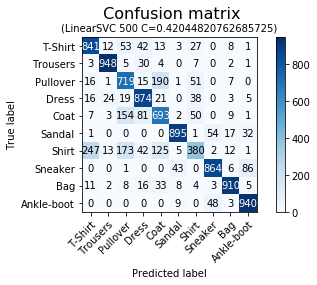

Test accuracy:  0.8064 

              precision    recall  f1-score   support

           0       0.74      0.84      0.79      1000
           1       0.95      0.95      0.95      1000
           2       0.64      0.72      0.67      1000
           3       0.79      0.87      0.83      1000
           4       0.64      0.69      0.67      1000
           5       0.93      0.90      0.91      1000
           6       0.68      0.38      0.49      1000
           7       0.89      0.86      0.88      1000
           8       0.93      0.91      0.92      1000
           9       0.88      0.94      0.91      1000

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.80     10000
weighted avg       0.81      0.81      0.80     10000



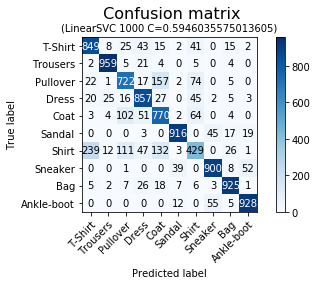

Test accuracy:  0.8255 

              precision    recall  f1-score   support

           0       0.74      0.85      0.79      1000
           1       0.95      0.96      0.95      1000
           2       0.73      0.72      0.73      1000
           3       0.80      0.86      0.83      1000
           4       0.69      0.77      0.73      1000
           5       0.93      0.92      0.92      1000
           6       0.65      0.43      0.52      1000
           7       0.90      0.90      0.90      1000
           8       0.91      0.93      0.92      1000
           9       0.92      0.93      0.93      1000

    accuracy                           0.83     10000
   macro avg       0.82      0.83      0.82     10000
weighted avg       0.82      0.83      0.82     10000



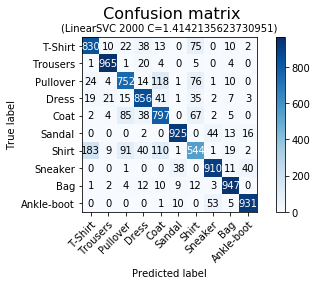

Test accuracy:  0.8457 

              precision    recall  f1-score   support

           0       0.78      0.83      0.81      1000
           1       0.95      0.96      0.96      1000
           2       0.77      0.75      0.76      1000
           3       0.84      0.86      0.85      1000
           4       0.73      0.80      0.76      1000
           5       0.94      0.93      0.93      1000
           6       0.67      0.54      0.60      1000
           7       0.90      0.91      0.90      1000
           8       0.92      0.95      0.93      1000
           9       0.94      0.93      0.93      1000

    accuracy                           0.85     10000
   macro avg       0.84      0.85      0.84     10000
weighted avg       0.84      0.85      0.84     10000



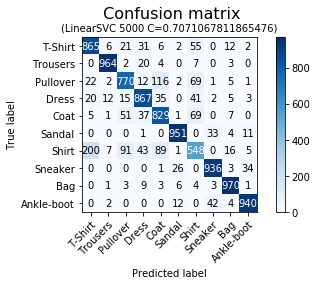

Test accuracy:  0.864 

              precision    recall  f1-score   support

           0       0.78      0.86      0.82      1000
           1       0.97      0.96      0.97      1000
           2       0.81      0.77      0.79      1000
           3       0.85      0.87      0.86      1000
           4       0.77      0.83      0.80      1000
           5       0.95      0.95      0.95      1000
           6       0.69      0.55      0.61      1000
           7       0.92      0.94      0.93      1000
           8       0.94      0.97      0.96      1000
           9       0.94      0.94      0.94      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



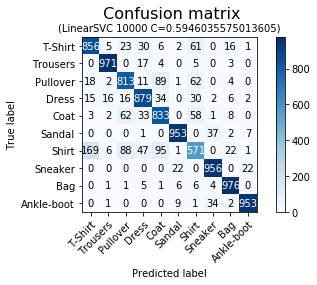

Test accuracy:  0.8761 

              precision    recall  f1-score   support

           0       0.81      0.86      0.83      1000
           1       0.97      0.97      0.97      1000
           2       0.81      0.81      0.81      1000
           3       0.86      0.88      0.87      1000
           4       0.78      0.83      0.81      1000
           5       0.96      0.95      0.96      1000
           6       0.72      0.57      0.64      1000
           7       0.92      0.96      0.94      1000
           8       0.94      0.98      0.96      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.87      0.88      0.87     10000
weighted avg       0.87      0.88      0.87     10000



C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


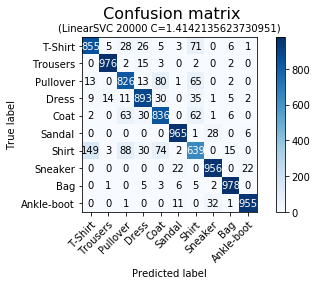

Test accuracy:  0.8879 

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1000
           1       0.98      0.98      0.98      1000
           2       0.81      0.83      0.82      1000
           3       0.88      0.89      0.89      1000
           4       0.81      0.84      0.82      1000
           5       0.96      0.96      0.96      1000
           6       0.73      0.64      0.68      1000
           7       0.94      0.96      0.95      1000
           8       0.96      0.98      0.97      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


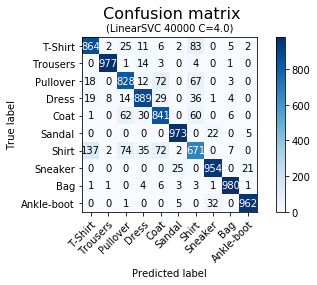

Test accuracy:  0.8939 

              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1000
           1       0.99      0.98      0.98      1000
           2       0.82      0.83      0.83      1000
           3       0.89      0.89      0.89      1000
           4       0.82      0.84      0.83      1000
           5       0.96      0.97      0.97      1000
           6       0.73      0.67      0.70      1000
           7       0.94      0.95      0.95      1000
           8       0.97      0.98      0.98      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


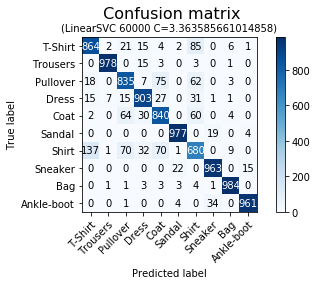

Test accuracy:  0.8985 

              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1000
           1       0.99      0.98      0.98      1000
           2       0.83      0.83      0.83      1000
           3       0.90      0.90      0.90      1000
           4       0.82      0.84      0.83      1000
           5       0.97      0.98      0.97      1000
           6       0.74      0.68      0.71      1000
           7       0.95      0.96      0.95      1000
           8       0.98      0.98      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [34]:
train_LinearSVC_scaled(X_tr_500, X_test_9_4_2, y_tr_500, y_test, 1, '500',0.42044820762685725,
               "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/", "seed_1_random_A_with_scaler_without_std", "HOG_942.pkl")
train_LinearSVC_scaled(X_tr_1000, X_test_9_4_2, y_tr_1000, y_test, 1, '1000',0.5946035575013605,
               "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/", "seed_1_random_A_with_scaler_without_std", "HOG_942.pkl")
train_LinearSVC_scaled(X_tr_2000, X_test_9_4_2, y_tr_2000, y_test, 1, '2000',1.4142135623730951,
               "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/", "seed_1_random_A_with_scaler_without_std", "HOG_942.pkl")
train_LinearSVC_scaled(X_tr_5000, X_test_9_4_2, y_tr_5000, y_test, 1, '5000',0.7071067811865476,
               "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/", "seed_1_random_A_with_scaler_without_std", "HOG_942.pkl")
train_LinearSVC_scaled(X_tr_10000, X_test_9_4_2, y_tr_10000, y_test, 1, '10000',0.5946035575013605,
               "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/", "seed_1_random_A_with_scaler_without_std", "HOG_942.pkl")
train_LinearSVC_scaled(X_tr_20000, X_test_9_4_2, y_tr_20000, y_test, 1, '20000',1.4142135623730951,
               "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/", "seed_1_random_A_with_scaler_without_std", "HOG_942.pkl")
train_LinearSVC_scaled(X_tr_40000, X_test_9_4_2, y_tr_40000, y_test, 1, '40000',4.0,
               "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/", "seed_1_random_A_with_scaler_without_std", "HOG_942.pkl")
train_LinearSVC_scaled(X_train_9_4_2, X_test_9_4_2, y_train, y_test, 1, '60000',3.363585661014858,
               "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/", "seed_1_random_A_with_scaler_without_std", "HOG_942.pkl")

In [9]:
#load_train_labels("500_roc_auc_score_single_class.npy")

In [10]:
#zz = load_train_labels("500_y_pred_label.npy")

In [11]:
#zz[0]

In [ ]:
############################################################################
##################  LinearSVC, hinge, ohne StandardScaler, ohne PCA ########
####################   GridSearchCV ########################################
############################################################################


 C_range: [1.52587891e-05 6.10351562e-05 2.44140625e-04 9.76562500e-04
 3.90625000e-03 1.56250000e-02 6.25000000e-02 2.50000000e-01
 1.00000000e+00 4.00000000e+00 1.60000000e+01 6.40000000e+01
 2.56000000e+02 1.02400000e+03]

 Bester Score:  0.812

 Besten Parameter:  {'svm__C': 1.0}
Zeitmessung mit time():  30.011716842651367
Zeitmessung mit process_time():  0.9516060999999922
Zeitmessung mit perf_counter():  30.012466407761963
Bester Estimator score:  0.804
Score: 0.628000 (0.058788) mit Parameter: {'svm__C': 1.52587890625e-05}
Score: 0.628000 (0.058788) mit Parameter: {'svm__C': 6.103515625e-05}
Score: 0.628000 (0.058788) mit Parameter: {'svm__C': 0.000244140625}
Score: 0.592000 (0.045782) mit Parameter: {'svm__C': 0.0009765625}
Score: 0.688000 (0.041183) mit Parameter: {'svm__C': 0.00390625}
Score: 0.726000 (0.035833) mit Parameter: {'svm__C': 0.015625}
Score: 0.768000 (0.032496) mit Parameter: {'svm__C': 0.0625}
Score: 0.796000 (0.039799) mit Parameter: {'svm__C': 0.25}
Score: 0.

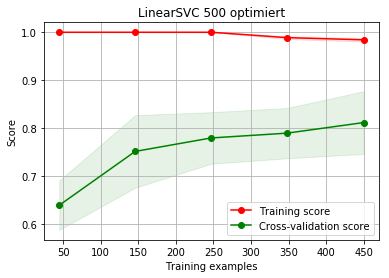

<Figure size 432x288 with 0 Axes>

In [35]:
clf_500_linSVC = tuning_hyper_params(X_tr_500, y_tr_500,X_test_9_4_2,y_test, kernel='LinearSVC', 
                        cv=10, 
                        scoring='accuracy', 
                        c_range=np.logspace(-16,10,14, base=2), 
                        gamma_range=np.logspace(-16,4,11, base=2),                       
                        seed=1)
save_trained_model_as_pkl(clf_500_linSVC, "SVM_Modelle_FM/Hog_opt/LinearSVC/Neue Mengen/500/seed_1_random_A_without_scaler/grid_1DL.pkl")
get_best_C_500 = clf_500_linSVC.best_params_['svm__C']
linSVC_500_opt = LinearSVC(C=get_best_C_500, loss='hinge', random_state=1)
learn_curve_def_500 = plot_learning_curve(linSVC_500_opt, "LinearSVC 500 optimiert", X_tr_500, y_tr_500, ylim=None, cv=10,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5))
fig = learn_curve_def_500.figure()
fig.savefig("Lernkurve_FM_LinearSVC_500_opt.png")
learn_curve_def_500.show()

In [ ]:
############################################################################
##################  LinearSVC, hinge, mit StandardScaler aber ohne std, ####
##################  d.h. with_std = False,   ohne PCA ######################
############################################################################

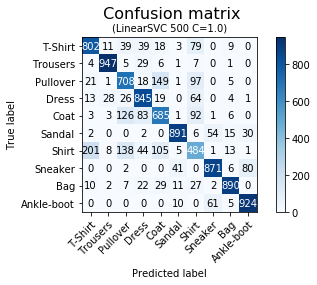

Test accuracy:  0.8047 

              precision    recall  f1-score   support

           0       0.76      0.80      0.78      1000
           1       0.95      0.95      0.95      1000
           2       0.67      0.71      0.69      1000
           3       0.78      0.84      0.81      1000
           4       0.68      0.69      0.68      1000
           5       0.92      0.89      0.91      1000
           6       0.57      0.48      0.52      1000
           7       0.88      0.87      0.88      1000
           8       0.93      0.89      0.91      1000
           9       0.89      0.92      0.91      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



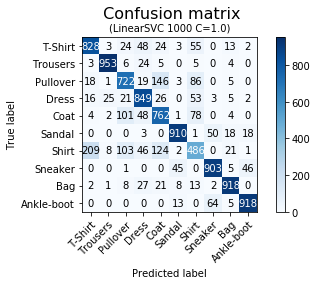

Test accuracy:  0.8249 

              precision    recall  f1-score   support

           0       0.77      0.83      0.80      1000
           1       0.96      0.95      0.96      1000
           2       0.73      0.72      0.73      1000
           3       0.80      0.85      0.82      1000
           4       0.69      0.76      0.72      1000
           5       0.92      0.91      0.92      1000
           6       0.63      0.49      0.55      1000
           7       0.88      0.90      0.89      1000
           8       0.92      0.92      0.92      1000
           9       0.93      0.92      0.92      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



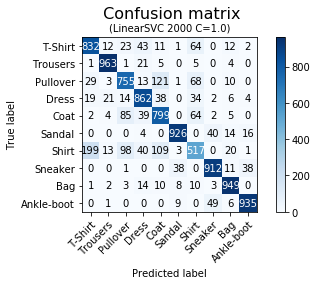

Test accuracy:  0.845 

              precision    recall  f1-score   support

           0       0.77      0.83      0.80      1000
           1       0.95      0.96      0.95      1000
           2       0.77      0.76      0.76      1000
           3       0.83      0.86      0.85      1000
           4       0.73      0.80      0.76      1000
           5       0.94      0.93      0.93      1000
           6       0.68      0.52      0.59      1000
           7       0.90      0.91      0.91      1000
           8       0.92      0.95      0.93      1000
           9       0.94      0.94      0.94      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



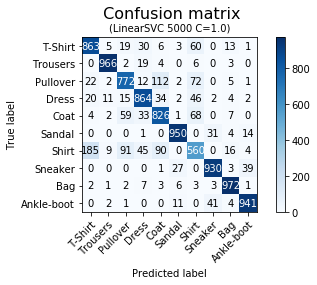

Test accuracy:  0.8644 

              precision    recall  f1-score   support

           0       0.79      0.86      0.82      1000
           1       0.97      0.97      0.97      1000
           2       0.80      0.77      0.79      1000
           3       0.85      0.86      0.86      1000
           4       0.77      0.83      0.80      1000
           5       0.95      0.95      0.95      1000
           6       0.69      0.56      0.62      1000
           7       0.92      0.93      0.93      1000
           8       0.94      0.97      0.96      1000
           9       0.94      0.94      0.94      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


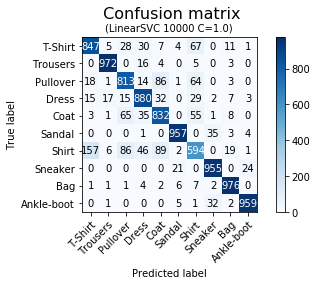

Test accuracy:  0.8785 

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1000
           1       0.97      0.97      0.97      1000
           2       0.81      0.81      0.81      1000
           3       0.86      0.88      0.87      1000
           4       0.79      0.83      0.81      1000
           5       0.96      0.96      0.96      1000
           6       0.72      0.59      0.65      1000
           7       0.93      0.95      0.94      1000
           8       0.95      0.98      0.96      1000
           9       0.97      0.96      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


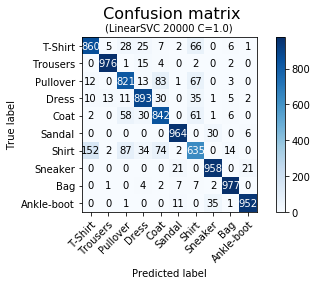

Test accuracy:  0.8878 

              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1000
           1       0.98      0.98      0.98      1000
           2       0.82      0.82      0.82      1000
           3       0.88      0.89      0.89      1000
           4       0.81      0.84      0.82      1000
           5       0.96      0.96      0.96      1000
           6       0.73      0.64      0.68      1000
           7       0.93      0.96      0.95      1000
           8       0.96      0.98      0.97      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


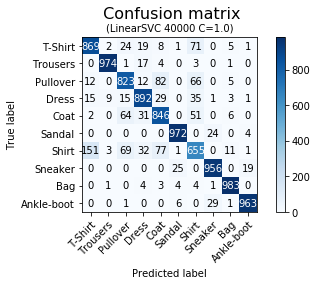

Test accuracy:  0.8933 

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1000
           1       0.98      0.97      0.98      1000
           2       0.83      0.82      0.82      1000
           3       0.89      0.89      0.89      1000
           4       0.81      0.85      0.83      1000
           5       0.96      0.97      0.97      1000
           6       0.74      0.66      0.69      1000
           7       0.95      0.96      0.95      1000
           8       0.97      0.98      0.98      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


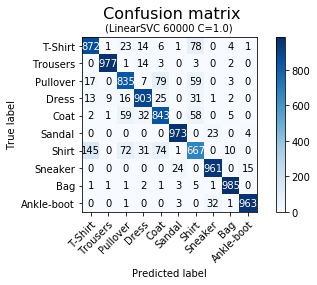

Test accuracy:  0.8979 

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1000
           1       0.99      0.98      0.98      1000
           2       0.83      0.83      0.83      1000
           3       0.90      0.90      0.90      1000
           4       0.82      0.84      0.83      1000
           5       0.97      0.97      0.97      1000
           6       0.74      0.67      0.70      1000
           7       0.94      0.96      0.95      1000
           8       0.97      0.98      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [28]:
train_LinearSVC_scaled(X_tr_500, X_test_9_4_2, y_tr_500, y_test, 1, '500',1.0,
               "SVM_Modelle_FM/Hog_default/LinearSVC/Neue Mengen/", "seed_1_random_A_with_scaler_without_std", "HOG_942.pkl")
train_LinearSVC_scaled(X_tr_1000, X_test_9_4_2, y_tr_1000, y_test, 1, '1000',1.0,
               "SVM_Modelle_FM/Hog_default/LinearSVC/Neue Mengen/", "seed_1_random_A_with_scaler_without_std", "HOG_942.pkl")
train_LinearSVC_scaled(X_tr_2000, X_test_9_4_2, y_tr_2000, y_test, 1, '2000',1.0,
               "SVM_Modelle_FM/Hog_default/LinearSVC/Neue Mengen/", "seed_1_random_A_with_scaler_without_std", "HOG_942.pkl")
train_LinearSVC_scaled(X_tr_5000, X_test_9_4_2, y_tr_5000, y_test, 1, '5000',1.0,
               "SVM_Modelle_FM/Hog_default/LinearSVC/Neue Mengen/", "seed_1_random_A_with_scaler_without_std", "HOG_942.pkl")
train_LinearSVC_scaled(X_tr_10000, X_test_9_4_2, y_tr_10000, y_test, 1, '10000',1.0,
               "SVM_Modelle_FM/Hog_default/LinearSVC/Neue Mengen/", "seed_1_random_A_with_scaler_without_std", "HOG_942.pkl")
train_LinearSVC_scaled(X_tr_20000, X_test_9_4_2, y_tr_20000, y_test, 1, '20000',1.0,
               "SVM_Modelle_FM/Hog_default/LinearSVC/Neue Mengen/", "seed_1_random_A_with_scaler_without_std", "HOG_942.pkl")
train_LinearSVC_scaled(X_tr_40000, X_test_9_4_2, y_tr_40000, y_test, 1, '40000',1.0,
               "SVM_Modelle_FM/Hog_default/LinearSVC/Neue Mengen/", "seed_1_random_A_with_scaler_without_std", "HOG_942.pkl")
train_LinearSVC_scaled(X_train_9_4_2, X_test_9_4_2, y_train, y_test, 1, '60000',1.0,
               "SVM_Modelle_FM/Hog_default/LinearSVC/Neue Mengen/", "seed_1_random_A_with_scaler_without_std", "HOG_942.pkl")

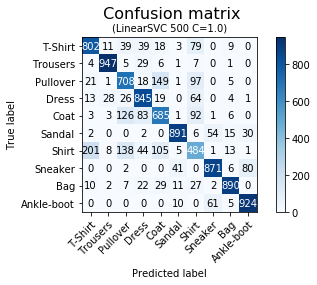

Test accuracy:  0.8047 

              precision    recall  f1-score   support

           0       0.76      0.80      0.78      1000
           1       0.95      0.95      0.95      1000
           2       0.67      0.71      0.69      1000
           3       0.78      0.84      0.81      1000
           4       0.68      0.69      0.68      1000
           5       0.92      0.89      0.91      1000
           6       0.57      0.48      0.52      1000
           7       0.88      0.87      0.88      1000
           8       0.93      0.89      0.91      1000
           9       0.89      0.92      0.91      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



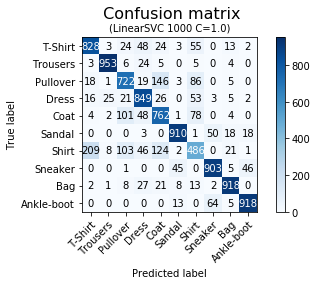

Test accuracy:  0.8249 

              precision    recall  f1-score   support

           0       0.77      0.83      0.80      1000
           1       0.96      0.95      0.96      1000
           2       0.73      0.72      0.73      1000
           3       0.80      0.85      0.82      1000
           4       0.69      0.76      0.72      1000
           5       0.92      0.91      0.92      1000
           6       0.63      0.49      0.55      1000
           7       0.88      0.90      0.89      1000
           8       0.92      0.92      0.92      1000
           9       0.93      0.92      0.92      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



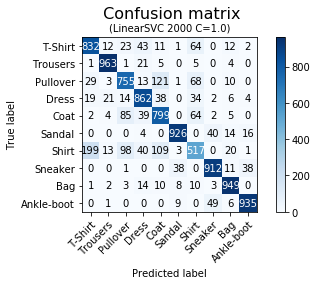

Test accuracy:  0.845 

              precision    recall  f1-score   support

           0       0.77      0.83      0.80      1000
           1       0.95      0.96      0.95      1000
           2       0.77      0.76      0.76      1000
           3       0.83      0.86      0.85      1000
           4       0.73      0.80      0.76      1000
           5       0.94      0.93      0.93      1000
           6       0.68      0.52      0.59      1000
           7       0.90      0.91      0.91      1000
           8       0.92      0.95      0.93      1000
           9       0.94      0.94      0.94      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



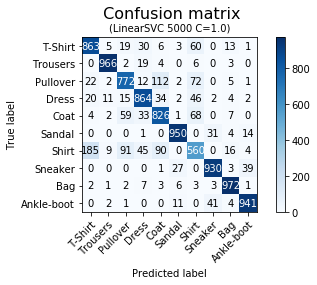

Test accuracy:  0.8644 

              precision    recall  f1-score   support

           0       0.79      0.86      0.82      1000
           1       0.97      0.97      0.97      1000
           2       0.80      0.77      0.79      1000
           3       0.85      0.86      0.86      1000
           4       0.77      0.83      0.80      1000
           5       0.95      0.95      0.95      1000
           6       0.69      0.56      0.62      1000
           7       0.92      0.93      0.93      1000
           8       0.94      0.97      0.96      1000
           9       0.94      0.94      0.94      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



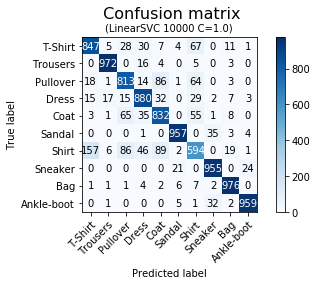

Test accuracy:  0.8785 

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1000
           1       0.97      0.97      0.97      1000
           2       0.81      0.81      0.81      1000
           3       0.86      0.88      0.87      1000
           4       0.79      0.83      0.81      1000
           5       0.96      0.96      0.96      1000
           6       0.72      0.59      0.65      1000
           7       0.93      0.95      0.94      1000
           8       0.95      0.98      0.96      1000
           9       0.97      0.96      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


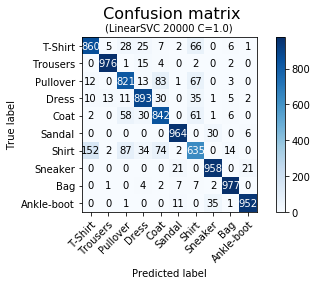

Test accuracy:  0.8878 

              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1000
           1       0.98      0.98      0.98      1000
           2       0.82      0.82      0.82      1000
           3       0.88      0.89      0.89      1000
           4       0.81      0.84      0.82      1000
           5       0.96      0.96      0.96      1000
           6       0.73      0.64      0.68      1000
           7       0.93      0.96      0.95      1000
           8       0.96      0.98      0.97      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


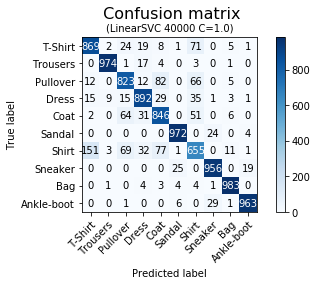

Test accuracy:  0.8933 

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1000
           1       0.98      0.97      0.98      1000
           2       0.83      0.82      0.82      1000
           3       0.89      0.89      0.89      1000
           4       0.81      0.85      0.83      1000
           5       0.96      0.97      0.97      1000
           6       0.74      0.66      0.69      1000
           7       0.95      0.96      0.95      1000
           8       0.97      0.98      0.98      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


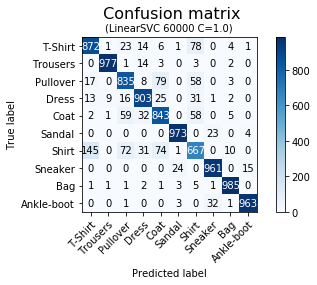

Test accuracy:  0.8979 

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1000
           1       0.99      0.98      0.98      1000
           2       0.83      0.83      0.83      1000
           3       0.90      0.90      0.90      1000
           4       0.82      0.84      0.83      1000
           5       0.97      0.97      0.97      1000
           6       0.74      0.67      0.70      1000
           7       0.94      0.96      0.95      1000
           8       0.97      0.98      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [29]:
train_LinearSVC_scaled(X_tr_500, X_test_9_4_2, y_tr_500, y_test, 7, '500',1.0,
               "SVM_Modelle_FM/Hog_default/LinearSVC/Neue Mengen/", "seed_7_random_A_with_scaler_without_std", "HOG_942.pkl")
train_LinearSVC_scaled(X_tr_1000, X_test_9_4_2, y_tr_1000, y_test, 7, '1000',1.0,
               "SVM_Modelle_FM/Hog_default/LinearSVC/Neue Mengen/", "seed_7_random_A_with_scaler_without_std", "HOG_942.pkl")
train_LinearSVC_scaled(X_tr_2000, X_test_9_4_2, y_tr_2000, y_test, 7, '2000',1.0,
               "SVM_Modelle_FM/Hog_default/LinearSVC/Neue Mengen/", "seed_7_random_A_with_scaler_without_std", "HOG_942.pkl")
train_LinearSVC_scaled(X_tr_5000, X_test_9_4_2, y_tr_5000, y_test, 7, '5000',1.0,
               "SVM_Modelle_FM/Hog_default/LinearSVC/Neue Mengen/", "seed_7_random_A_with_scaler_without_std", "HOG_942.pkl")
train_LinearSVC_scaled(X_tr_10000, X_test_9_4_2, y_tr_10000, y_test, 7, '10000',1.0,
               "SVM_Modelle_FM/Hog_default/LinearSVC/Neue Mengen/", "seed_7_random_A_with_scaler_without_std", "HOG_942.pkl")
train_LinearSVC_scaled(X_tr_20000, X_test_9_4_2, y_tr_20000, y_test, 7, '20000',1.0,
               "SVM_Modelle_FM/Hog_default/LinearSVC/Neue Mengen/", "seed_7_random_A_with_scaler_without_std", "HOG_942.pkl")
train_LinearSVC_scaled(X_tr_40000, X_test_9_4_2, y_tr_40000, y_test, 7, '40000',1.0,
               "SVM_Modelle_FM/Hog_default/LinearSVC/Neue Mengen/", "seed_7_random_A_with_scaler_without_std", "HOG_942.pkl")
train_LinearSVC_scaled(X_train_9_4_2, X_test_9_4_2, y_train, y_test, 7, '60000',1.0,
               "SVM_Modelle_FM/Hog_default/LinearSVC/Neue Mengen/", "seed_7_random_A_with_scaler_without_std", "HOG_942.pkl")

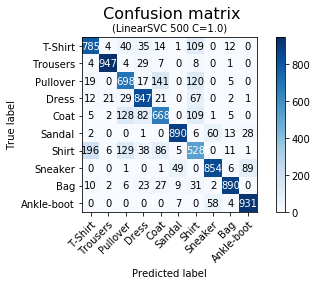

Test accuracy:  0.8038 

              precision    recall  f1-score   support

           0       0.76      0.79      0.77      1000
           1       0.96      0.95      0.96      1000
           2       0.67      0.70      0.69      1000
           3       0.79      0.85      0.82      1000
           4       0.69      0.67      0.68      1000
           5       0.93      0.89      0.91      1000
           6       0.54      0.53      0.53      1000
           7       0.88      0.85      0.86      1000
           8       0.94      0.89      0.91      1000
           9       0.89      0.93      0.91      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



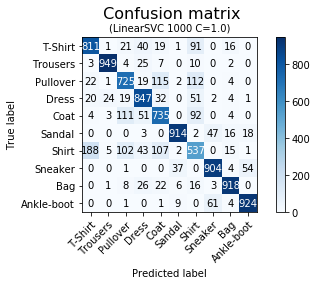

Test accuracy:  0.8264 

              precision    recall  f1-score   support

           0       0.77      0.81      0.79      1000
           1       0.96      0.95      0.96      1000
           2       0.73      0.72      0.73      1000
           3       0.80      0.85      0.82      1000
           4       0.71      0.73      0.72      1000
           5       0.94      0.91      0.93      1000
           6       0.59      0.54      0.56      1000
           7       0.89      0.90      0.90      1000
           8       0.93      0.92      0.92      1000
           9       0.93      0.92      0.92      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



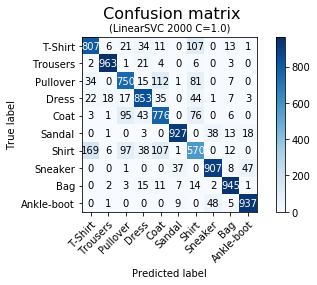

Test accuracy:  0.8435 

              precision    recall  f1-score   support

           0       0.78      0.81      0.79      1000
           1       0.96      0.96      0.96      1000
           2       0.76      0.75      0.76      1000
           3       0.83      0.85      0.84      1000
           4       0.73      0.78      0.75      1000
           5       0.94      0.93      0.94      1000
           6       0.63      0.57      0.60      1000
           7       0.91      0.91      0.91      1000
           8       0.93      0.94      0.94      1000
           9       0.93      0.94      0.93      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



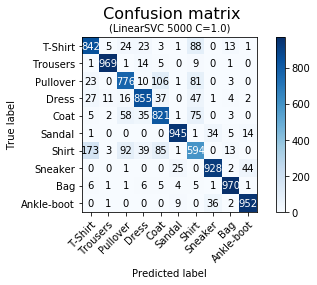

Test accuracy:  0.8652 

              precision    recall  f1-score   support

           0       0.78      0.84      0.81      1000
           1       0.98      0.97      0.97      1000
           2       0.80      0.78      0.79      1000
           3       0.87      0.85      0.86      1000
           4       0.77      0.82      0.80      1000
           5       0.96      0.94      0.95      1000
           6       0.66      0.59      0.63      1000
           7       0.93      0.93      0.93      1000
           8       0.95      0.97      0.96      1000
           9       0.94      0.95      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.86      0.87      0.86     10000
weighted avg       0.86      0.87      0.86     10000



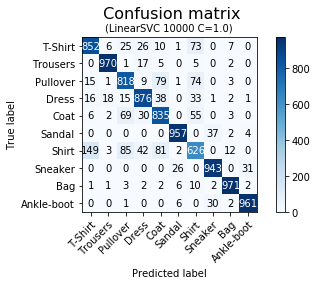

Test accuracy:  0.8809 

              precision    recall  f1-score   support

           0       0.82      0.85      0.84      1000
           1       0.97      0.97      0.97      1000
           2       0.80      0.82      0.81      1000
           3       0.87      0.88      0.88      1000
           4       0.80      0.83      0.81      1000
           5       0.96      0.96      0.96      1000
           6       0.71      0.63      0.67      1000
           7       0.93      0.94      0.94      1000
           8       0.97      0.97      0.97      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



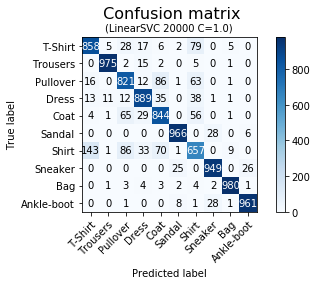

Test accuracy:  0.89 

              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1000
           1       0.98      0.97      0.98      1000
           2       0.81      0.82      0.81      1000
           3       0.89      0.89      0.89      1000
           4       0.81      0.84      0.83      1000
           5       0.96      0.97      0.96      1000
           6       0.73      0.66      0.69      1000
           7       0.94      0.95      0.95      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



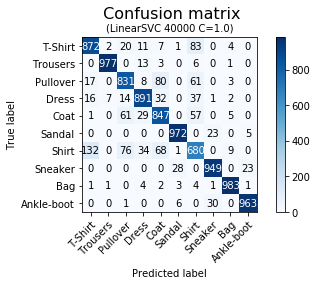

Test accuracy:  0.8965 

              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1000
           1       0.99      0.98      0.98      1000
           2       0.83      0.83      0.83      1000
           3       0.90      0.89      0.90      1000
           4       0.82      0.85      0.83      1000
           5       0.96      0.97      0.97      1000
           6       0.73      0.68      0.71      1000
           7       0.95      0.95      0.95      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



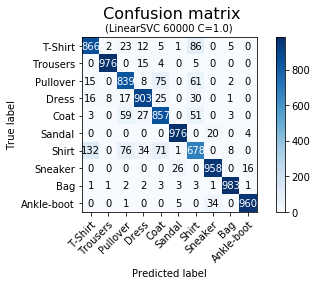

Test accuracy:  0.8996 

              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1000
           1       0.99      0.98      0.98      1000
           2       0.82      0.84      0.83      1000
           3       0.90      0.90      0.90      1000
           4       0.82      0.86      0.84      1000
           5       0.96      0.98      0.97      1000
           6       0.74      0.68      0.71      1000
           7       0.95      0.96      0.95      1000
           8       0.98      0.98      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [21]:
############################################################################
##################  LinearSVC, squared_hinge, ohne StandardScaler, ohne PCA ########
##################  
############################################################################
#######  seed 1 ##########

train_LinearSVC_sq(X_tr_500, X_test_9_4_2, y_tr_500, y_test, 1, '500',1.0,
               "SVM_Modelle_FM/Hog_default/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler_l2_sq_hinge", "HOG_942.pkl")
train_LinearSVC_sq(X_tr_1000, X_test_9_4_2, y_tr_1000, y_test, 1, '1000',1.0,
               "SVM_Modelle_FM/Hog_default/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler_l2_sq_hinge", "HOG_942.pkl")
train_LinearSVC_sq(X_tr_2000, X_test_9_4_2, y_tr_2000, y_test, 1, '2000',1.0,
               "SVM_Modelle_FM/Hog_default/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler_l2_sq_hinge", "HOG_942.pkl")
train_LinearSVC_sq(X_tr_5000, X_test_9_4_2, y_tr_5000, y_test, 1, '5000',1.0,
               "SVM_Modelle_FM/Hog_default/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler_l2_sq_hinge", "HOG_942.pkl")
train_LinearSVC_sq(X_tr_10000, X_test_9_4_2, y_tr_10000, y_test, 1, '10000',1.0,
               "SVM_Modelle_FM/Hog_default/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler_l2_sq_hinge", "HOG_942.pkl")
train_LinearSVC_sq(X_tr_20000, X_test_9_4_2, y_tr_20000, y_test, 1, '20000',1.0,
               "SVM_Modelle_FM/Hog_default/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler_l2_sq_hinge", "HOG_942.pkl")
train_LinearSVC_sq(X_tr_40000, X_test_9_4_2, y_tr_40000, y_test, 1, '40000',1.0,
               "SVM_Modelle_FM/Hog_default/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler_l2_sq_hinge", "HOG_942.pkl")
train_LinearSVC_sq(X_train_9_4_2, X_test_9_4_2, y_train, y_test, 1, '60000',1.0,
               "SVM_Modelle_FM/Hog_default/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler_l2_sq_hinge", "HOG_942.pkl")

In [ ]:
############################################################################
##################  LinearSVC, hinge, ohne StandardScaler, ohne PCA ########
############################################################################

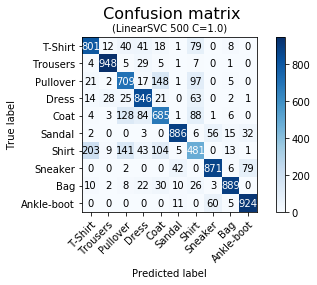

Test accuracy:  0.804 

              precision    recall  f1-score   support

           0       0.76      0.80      0.78      1000
           1       0.94      0.95      0.95      1000
           2       0.67      0.71      0.69      1000
           3       0.78      0.85      0.81      1000
           4       0.68      0.69      0.68      1000
           5       0.92      0.89      0.91      1000
           6       0.57      0.48      0.52      1000
           7       0.88      0.87      0.87      1000
           8       0.94      0.89      0.91      1000
           9       0.89      0.92      0.91      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



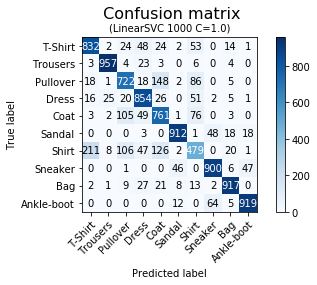

Test accuracy:  0.8253 

              precision    recall  f1-score   support

           0       0.77      0.83      0.80      1000
           1       0.96      0.96      0.96      1000
           2       0.73      0.72      0.73      1000
           3       0.80      0.85      0.83      1000
           4       0.69      0.76      0.72      1000
           5       0.93      0.91      0.92      1000
           6       0.63      0.48      0.54      1000
           7       0.89      0.90      0.89      1000
           8       0.92      0.92      0.92      1000
           9       0.93      0.92      0.93      1000

    accuracy                           0.83     10000
   macro avg       0.82      0.83      0.82     10000
weighted avg       0.82      0.83      0.82     10000



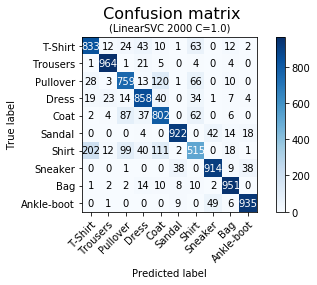

Test accuracy:  0.8453 

              precision    recall  f1-score   support

           0       0.77      0.83      0.80      1000
           1       0.94      0.96      0.95      1000
           2       0.77      0.76      0.76      1000
           3       0.83      0.86      0.85      1000
           4       0.73      0.80      0.76      1000
           5       0.94      0.92      0.93      1000
           6       0.68      0.52      0.59      1000
           7       0.91      0.91      0.91      1000
           8       0.92      0.95      0.93      1000
           9       0.94      0.94      0.94      1000

    accuracy                           0.85     10000
   macro avg       0.84      0.85      0.84     10000
weighted avg       0.84      0.85      0.84     10000



C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


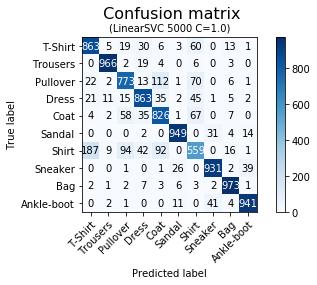

Test accuracy:  0.8644 

              precision    recall  f1-score   support

           0       0.79      0.86      0.82      1000
           1       0.97      0.97      0.97      1000
           2       0.80      0.77      0.79      1000
           3       0.85      0.86      0.86      1000
           4       0.77      0.83      0.79      1000
           5       0.95      0.95      0.95      1000
           6       0.69      0.56      0.62      1000
           7       0.93      0.93      0.93      1000
           8       0.94      0.97      0.96      1000
           9       0.94      0.94      0.94      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


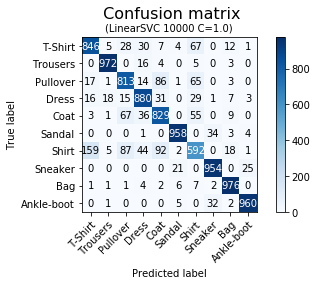

Test accuracy:  0.878 

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1000
           1       0.97      0.97      0.97      1000
           2       0.80      0.81      0.81      1000
           3       0.86      0.88      0.87      1000
           4       0.79      0.83      0.81      1000
           5       0.96      0.96      0.96      1000
           6       0.72      0.59      0.65      1000
           7       0.93      0.95      0.94      1000
           8       0.94      0.98      0.96      1000
           9       0.97      0.96      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


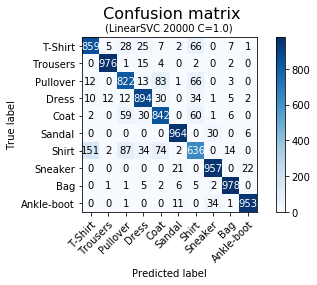

Test accuracy:  0.8881 

              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1000
           1       0.98      0.98      0.98      1000
           2       0.81      0.82      0.82      1000
           3       0.88      0.89      0.89      1000
           4       0.81      0.84      0.82      1000
           5       0.96      0.96      0.96      1000
           6       0.73      0.64      0.68      1000
           7       0.93      0.96      0.95      1000
           8       0.96      0.98      0.97      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


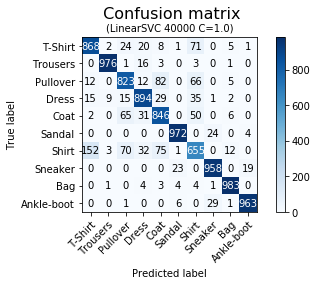

Test accuracy:  0.8938 

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1000
           1       0.98      0.98      0.98      1000
           2       0.82      0.82      0.82      1000
           3       0.89      0.89      0.89      1000
           4       0.81      0.85      0.83      1000
           5       0.97      0.97      0.97      1000
           6       0.74      0.66      0.70      1000
           7       0.95      0.96      0.95      1000
           8       0.97      0.98      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


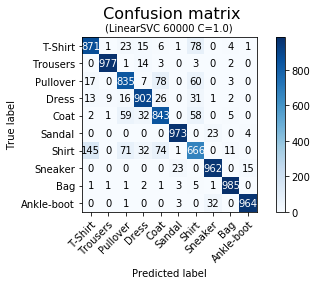

Test accuracy:  0.8978 

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1000
           1       0.99      0.98      0.98      1000
           2       0.83      0.83      0.83      1000
           3       0.90      0.90      0.90      1000
           4       0.82      0.84      0.83      1000
           5       0.97      0.97      0.97      1000
           6       0.74      0.67      0.70      1000
           7       0.94      0.96      0.95      1000
           8       0.97      0.98      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [22]:
#######  seed 1 ##########

train_LinearSVC(X_tr_500, X_test_9_4_2, y_tr_500, y_test, 1, '500',1.0,
               "SVM_Modelle_FM/Hog_default/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler", "HOG_942.pkl")
train_LinearSVC(X_tr_1000, X_test_9_4_2, y_tr_1000, y_test, 1, '1000',1.0,
               "SVM_Modelle_FM/Hog_default/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler", "HOG_942.pkl")
train_LinearSVC(X_tr_2000, X_test_9_4_2, y_tr_2000, y_test, 1, '2000',1.0,
               "SVM_Modelle_FM/Hog_default/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler", "HOG_942.pkl")
train_LinearSVC(X_tr_5000, X_test_9_4_2, y_tr_5000, y_test, 1, '5000',1.0,
               "SVM_Modelle_FM/Hog_default/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler", "HOG_942.pkl")
train_LinearSVC(X_tr_10000, X_test_9_4_2, y_tr_10000, y_test, 1, '10000',1.0,
               "SVM_Modelle_FM/Hog_default/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler", "HOG_942.pkl")
train_LinearSVC(X_tr_20000, X_test_9_4_2, y_tr_20000, y_test, 1, '20000',1.0,
               "SVM_Modelle_FM/Hog_default/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler", "HOG_942.pkl")
train_LinearSVC(X_tr_40000, X_test_9_4_2, y_tr_40000, y_test, 1, '40000',1.0,
               "SVM_Modelle_FM/Hog_default/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler", "HOG_942.pkl")
train_LinearSVC(X_train_9_4_2, X_test_9_4_2, y_train, y_test, 1, '60000',1.0,
               "SVM_Modelle_FM/Hog_default/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler", "HOG_942.pkl")

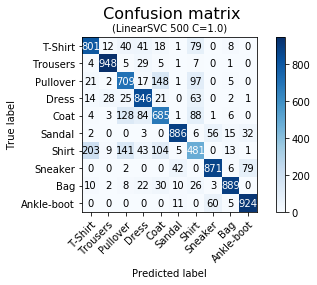

Test accuracy:  0.804 

              precision    recall  f1-score   support

           0       0.76      0.80      0.78      1000
           1       0.94      0.95      0.95      1000
           2       0.67      0.71      0.69      1000
           3       0.78      0.85      0.81      1000
           4       0.68      0.69      0.68      1000
           5       0.92      0.89      0.91      1000
           6       0.57      0.48      0.52      1000
           7       0.88      0.87      0.87      1000
           8       0.94      0.89      0.91      1000
           9       0.89      0.92      0.91      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



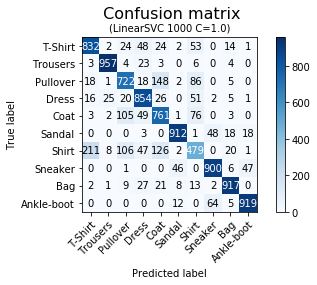

Test accuracy:  0.8253 

              precision    recall  f1-score   support

           0       0.77      0.83      0.80      1000
           1       0.96      0.96      0.96      1000
           2       0.73      0.72      0.73      1000
           3       0.80      0.85      0.83      1000
           4       0.69      0.76      0.72      1000
           5       0.93      0.91      0.92      1000
           6       0.63      0.48      0.54      1000
           7       0.89      0.90      0.89      1000
           8       0.92      0.92      0.92      1000
           9       0.93      0.92      0.93      1000

    accuracy                           0.83     10000
   macro avg       0.82      0.83      0.82     10000
weighted avg       0.82      0.83      0.82     10000



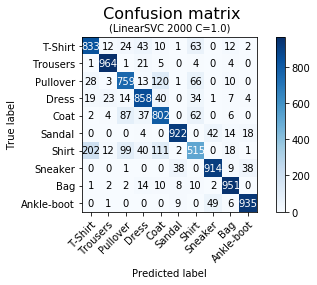

Test accuracy:  0.8453 

              precision    recall  f1-score   support

           0       0.77      0.83      0.80      1000
           1       0.94      0.96      0.95      1000
           2       0.77      0.76      0.76      1000
           3       0.83      0.86      0.85      1000
           4       0.73      0.80      0.76      1000
           5       0.94      0.92      0.93      1000
           6       0.68      0.52      0.59      1000
           7       0.91      0.91      0.91      1000
           8       0.92      0.95      0.93      1000
           9       0.94      0.94      0.94      1000

    accuracy                           0.85     10000
   macro avg       0.84      0.85      0.84     10000
weighted avg       0.84      0.85      0.84     10000



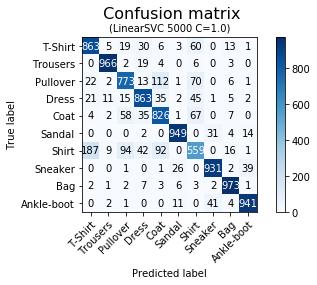

Test accuracy:  0.8644 

              precision    recall  f1-score   support

           0       0.79      0.86      0.82      1000
           1       0.97      0.97      0.97      1000
           2       0.80      0.77      0.79      1000
           3       0.85      0.86      0.86      1000
           4       0.77      0.83      0.79      1000
           5       0.95      0.95      0.95      1000
           6       0.69      0.56      0.62      1000
           7       0.93      0.93      0.93      1000
           8       0.94      0.97      0.96      1000
           9       0.94      0.94      0.94      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


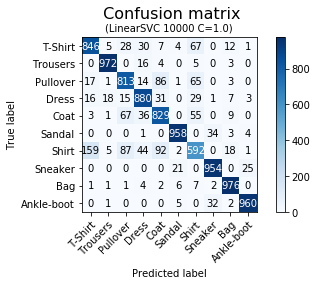

Test accuracy:  0.878 

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1000
           1       0.97      0.97      0.97      1000
           2       0.80      0.81      0.81      1000
           3       0.86      0.88      0.87      1000
           4       0.79      0.83      0.81      1000
           5       0.96      0.96      0.96      1000
           6       0.72      0.59      0.65      1000
           7       0.93      0.95      0.94      1000
           8       0.94      0.98      0.96      1000
           9       0.97      0.96      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


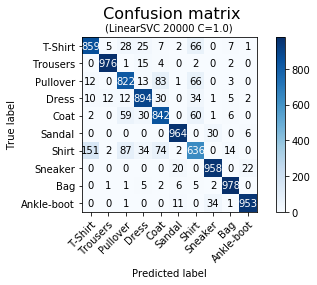

Test accuracy:  0.8882 

              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1000
           1       0.98      0.98      0.98      1000
           2       0.81      0.82      0.82      1000
           3       0.88      0.89      0.89      1000
           4       0.81      0.84      0.82      1000
           5       0.96      0.96      0.96      1000
           6       0.73      0.64      0.68      1000
           7       0.93      0.96      0.95      1000
           8       0.96      0.98      0.97      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


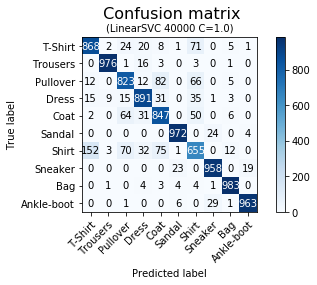

Test accuracy:  0.8936 

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1000
           1       0.98      0.98      0.98      1000
           2       0.82      0.82      0.82      1000
           3       0.89      0.89      0.89      1000
           4       0.81      0.85      0.83      1000
           5       0.97      0.97      0.97      1000
           6       0.74      0.66      0.70      1000
           7       0.95      0.96      0.95      1000
           8       0.97      0.98      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


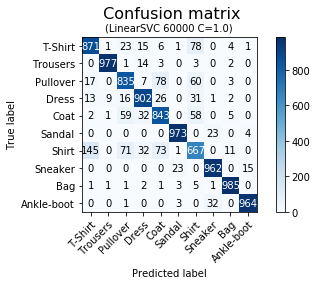

Test accuracy:  0.8979 

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1000
           1       0.99      0.98      0.98      1000
           2       0.83      0.83      0.83      1000
           3       0.90      0.90      0.90      1000
           4       0.82      0.84      0.83      1000
           5       0.97      0.97      0.97      1000
           6       0.74      0.67      0.70      1000
           7       0.94      0.96      0.95      1000
           8       0.97      0.98      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [23]:
#######  seed 7 ##########

train_LinearSVC(X_tr_500, X_test_9_4_2, y_tr_500, y_test, 7, '500',1.0,
               "SVM_Modelle_FM/Hog_default/LinearSVC/Neue Mengen/", "seed_7_random_A_without_scaler", "HOG_942.pkl")
train_LinearSVC(X_tr_1000, X_test_9_4_2, y_tr_1000, y_test, 7, '1000',1.0,
               "SVM_Modelle_FM/Hog_default/LinearSVC/Neue Mengen/", "seed_7_random_A_without_scaler", "HOG_942.pkl")
train_LinearSVC(X_tr_2000, X_test_9_4_2, y_tr_2000, y_test, 7, '2000',1.0,
               "SVM_Modelle_FM/Hog_default/LinearSVC/Neue Mengen/", "seed_7_random_A_without_scaler", "HOG_942.pkl")
train_LinearSVC(X_tr_5000, X_test_9_4_2, y_tr_5000, y_test, 7, '5000',1.0,
               "SVM_Modelle_FM/Hog_default/LinearSVC/Neue Mengen/", "seed_7_random_A_without_scaler", "HOG_942.pkl")
train_LinearSVC(X_tr_10000, X_test_9_4_2, y_tr_10000, y_test, 7, '10000',1.0,
               "SVM_Modelle_FM/Hog_default/LinearSVC/Neue Mengen/", "seed_7_random_A_without_scaler", "HOG_942.pkl")
train_LinearSVC(X_tr_20000, X_test_9_4_2, y_tr_20000, y_test, 7, '20000',1.0,
               "SVM_Modelle_FM/Hog_default/LinearSVC/Neue Mengen/", "seed_7_random_A_without_scaler", "HOG_942.pkl")
train_LinearSVC(X_tr_40000, X_test_9_4_2, y_tr_40000, y_test, 7, '40000',1.0,
               "SVM_Modelle_FM/Hog_default/LinearSVC/Neue Mengen/", "seed_7_random_A_without_scaler", "HOG_942.pkl")
train_LinearSVC(X_train_9_4_2, X_test_9_4_2, y_train, y_test, 7, '60000',1.0,
               "SVM_Modelle_FM/Hog_default/LinearSVC/Neue Mengen/", "seed_7_random_A_without_scaler", "HOG_942.pkl")

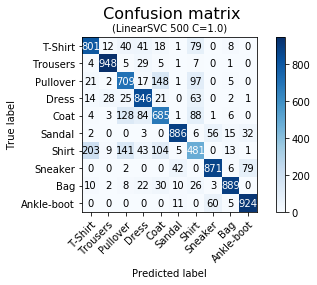

Test accuracy:  0.804 

              precision    recall  f1-score   support

           0       0.76      0.80      0.78      1000
           1       0.94      0.95      0.95      1000
           2       0.67      0.71      0.69      1000
           3       0.78      0.85      0.81      1000
           4       0.68      0.69      0.68      1000
           5       0.92      0.89      0.91      1000
           6       0.57      0.48      0.52      1000
           7       0.88      0.87      0.87      1000
           8       0.94      0.89      0.91      1000
           9       0.89      0.92      0.91      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



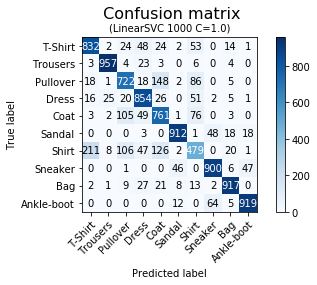

Test accuracy:  0.8253 

              precision    recall  f1-score   support

           0       0.77      0.83      0.80      1000
           1       0.96      0.96      0.96      1000
           2       0.73      0.72      0.73      1000
           3       0.80      0.85      0.83      1000
           4       0.69      0.76      0.72      1000
           5       0.93      0.91      0.92      1000
           6       0.63      0.48      0.54      1000
           7       0.89      0.90      0.89      1000
           8       0.92      0.92      0.92      1000
           9       0.93      0.92      0.93      1000

    accuracy                           0.83     10000
   macro avg       0.82      0.83      0.82     10000
weighted avg       0.82      0.83      0.82     10000



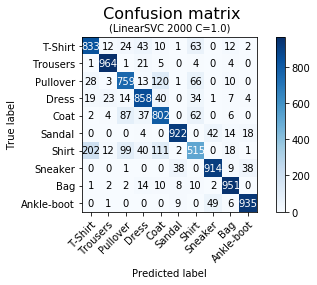

Test accuracy:  0.8453 

              precision    recall  f1-score   support

           0       0.77      0.83      0.80      1000
           1       0.94      0.96      0.95      1000
           2       0.77      0.76      0.76      1000
           3       0.83      0.86      0.85      1000
           4       0.73      0.80      0.76      1000
           5       0.94      0.92      0.93      1000
           6       0.68      0.52      0.59      1000
           7       0.91      0.91      0.91      1000
           8       0.92      0.95      0.93      1000
           9       0.94      0.94      0.94      1000

    accuracy                           0.85     10000
   macro avg       0.84      0.85      0.84     10000
weighted avg       0.84      0.85      0.84     10000



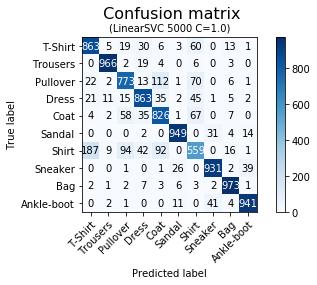

Test accuracy:  0.8644 

              precision    recall  f1-score   support

           0       0.79      0.86      0.82      1000
           1       0.97      0.97      0.97      1000
           2       0.80      0.77      0.79      1000
           3       0.85      0.86      0.86      1000
           4       0.77      0.83      0.79      1000
           5       0.95      0.95      0.95      1000
           6       0.69      0.56      0.62      1000
           7       0.93      0.93      0.93      1000
           8       0.94      0.97      0.96      1000
           9       0.94      0.94      0.94      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


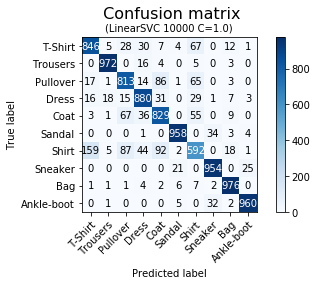

Test accuracy:  0.878 

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1000
           1       0.97      0.97      0.97      1000
           2       0.80      0.81      0.81      1000
           3       0.86      0.88      0.87      1000
           4       0.79      0.83      0.81      1000
           5       0.96      0.96      0.96      1000
           6       0.72      0.59      0.65      1000
           7       0.93      0.95      0.94      1000
           8       0.94      0.98      0.96      1000
           9       0.97      0.96      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


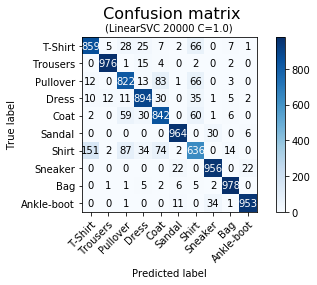

Test accuracy:  0.888 

              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1000
           1       0.98      0.98      0.98      1000
           2       0.81      0.82      0.82      1000
           3       0.88      0.89      0.89      1000
           4       0.81      0.84      0.82      1000
           5       0.96      0.96      0.96      1000
           6       0.73      0.64      0.68      1000
           7       0.93      0.96      0.94      1000
           8       0.96      0.98      0.97      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


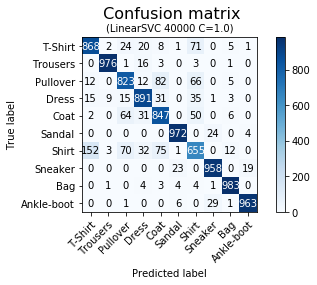

Test accuracy:  0.8936 

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1000
           1       0.98      0.98      0.98      1000
           2       0.82      0.82      0.82      1000
           3       0.89      0.89      0.89      1000
           4       0.81      0.85      0.83      1000
           5       0.97      0.97      0.97      1000
           6       0.74      0.66      0.70      1000
           7       0.95      0.96      0.95      1000
           8       0.97      0.98      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


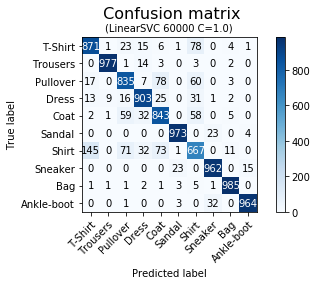

Test accuracy:  0.898 

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1000
           1       0.99      0.98      0.98      1000
           2       0.83      0.83      0.83      1000
           3       0.90      0.90      0.90      1000
           4       0.82      0.84      0.83      1000
           5       0.97      0.97      0.97      1000
           6       0.74      0.67      0.70      1000
           7       0.94      0.96      0.95      1000
           8       0.97      0.98      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [24]:
#######  seed 42 ##########

train_LinearSVC(X_tr_500, X_test_9_4_2, y_tr_500, y_test, 42, '500',1.0,
               "SVM_Modelle_FM/Hog_default/LinearSVC/Neue Mengen/", "seed_42_random_A_without_scaler", "HOG_942.pkl")
train_LinearSVC(X_tr_1000, X_test_9_4_2, y_tr_1000, y_test, 42, '1000',1.0,
               "SVM_Modelle_FM/Hog_default/LinearSVC/Neue Mengen/", "seed_42_random_A_without_scaler", "HOG_942.pkl")
train_LinearSVC(X_tr_2000, X_test_9_4_2, y_tr_2000, y_test, 42, '2000',1.0,
               "SVM_Modelle_FM/Hog_default/LinearSVC/Neue Mengen/", "seed_42_random_A_without_scaler", "HOG_942.pkl")
train_LinearSVC(X_tr_5000, X_test_9_4_2, y_tr_5000, y_test, 42, '5000',1.0,
               "SVM_Modelle_FM/Hog_default/LinearSVC/Neue Mengen/", "seed_42_random_A_without_scaler", "HOG_942.pkl")
train_LinearSVC(X_tr_10000, X_test_9_4_2, y_tr_10000, y_test, 42, '10000',1.0,
               "SVM_Modelle_FM/Hog_default/LinearSVC/Neue Mengen/", "seed_42_random_A_without_scaler", "HOG_942.pkl")
train_LinearSVC(X_tr_20000, X_test_9_4_2, y_tr_20000, y_test, 42, '20000',1.0,
               "SVM_Modelle_FM/Hog_default/LinearSVC/Neue Mengen/", "seed_42_random_A_without_scaler", "HOG_942.pkl")
train_LinearSVC(X_tr_40000, X_test_9_4_2, y_tr_40000, y_test, 42, '40000',1.0,
               "SVM_Modelle_FM/Hog_default/LinearSVC/Neue Mengen/", "seed_42_random_A_without_scaler", "HOG_942.pkl")
train_LinearSVC(X_train_9_4_2, X_test_9_4_2, y_train, y_test, 42, '60000',1.0,
               "SVM_Modelle_FM/Hog_default/LinearSVC/Neue Mengen/", "seed_42_random_A_without_scaler", "HOG_942.pkl")

In [ ]:
############################################################################
##################  RBF, mit StandardScaler, ohne PCA ######################
###  https://scikit-learn.org/stable/modules/preprocessing.html ############
#####   'ovr'
############################################################################

In [33]:
# RBF_SVC mit C=1 trainieren und Ergebnisse speichern, seed=1

train_RBF_SVC(X_tr_500, X_test_9_4_2, y_tr_500, y_test, 1, '500',1.0, 'auto',
               "SVM_Modelle_FM/Hog_default/rbf/Neue Mengen/", "seed_1_random_A_with_scaler", "HOG_942.pkl")
train_RBF_SVC(X_tr_1000, X_test_9_4_2, y_tr_1000, y_test, 1, '1000',1.0,'auto',
               "SVM_Modelle_FM/Hog_default/rbf/Neue Mengen/", "seed_1_random_A_with_scaler", "HOG_942.pkl")
train_RBF_SVC(X_tr_2000, X_test_9_4_2, y_tr_2000, y_test, 1, '2000',1.0,'auto',
               "SVM_Modelle_FM/Hog_default/rbf/Neue Mengen/", "seed_1_random_A_with_scaler", "HOG_942.pkl")
train_RBF_SVC(X_tr_5000, X_test_9_4_2, y_tr_5000, y_test, 1, '5000',1.0,'auto',
               "SVM_Modelle_FM/Hog_default/rbf/Neue Mengen/", "seed_1_random_A_with_scaler", "HOG_942.pkl")
train_RBF_SVC(X_tr_10000, X_test_9_4_2, y_tr_10000, y_test, 1, '10000',1.0,'auto',
               "SVM_Modelle_FM/Hog_default/rbf/Neue Mengen/", "seed_1_random_A_with_scaler", "HOG_942.pkl")
train_RBF_SVC(X_tr_20000, X_test_9_4_2, y_tr_20000, y_test, 1, '20000',1.0,'auto',
               "SVM_Modelle_FM/Hog_default/rbf/Neue Mengen/", "seed_1_random_A_with_scaler", "HOG_942.pkl")
train_RBF_SVC(X_tr_40000, X_test_9_4_2, y_tr_40000, y_test, 1, '40000',1.0,'auto',
               "SVM_Modelle_FM/Hog_default/rbf/Neue Mengen//", "seed_1_random_A_with_scaler", "HOG_942.pkl")
train_RBF_SVC(X_train_9_4_2, X_test_9_4_2, y_train, y_test, 1, '60000',1.0,'auto',
               "SVM_Modelle_FM/Hog_default/rbf/Neue Mengen/", "seed_1_random_A_with_scaler", "HOG_942.pkl")

TypeError: train_RBF_SVC() missing 1 required positional argument: 'feature'

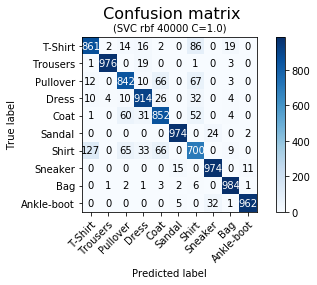

Test accuracy:  0.9039 

              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1000
           1       0.99      0.98      0.98      1000
           2       0.85      0.84      0.84      1000
           3       0.89      0.91      0.90      1000
           4       0.84      0.85      0.85      1000
           5       0.98      0.97      0.98      1000
           6       0.74      0.70      0.72      1000
           7       0.95      0.97      0.96      1000
           8       0.96      0.98      0.97      1000
           9       0.99      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



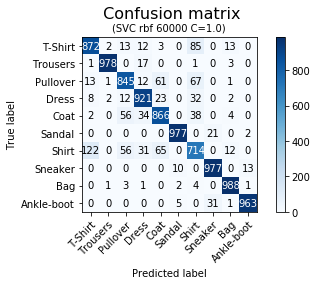

Test accuracy:  0.9101 

              precision    recall  f1-score   support

           0       0.86      0.87      0.86      1000
           1       0.99      0.98      0.99      1000
           2       0.86      0.84      0.85      1000
           3       0.90      0.92      0.91      1000
           4       0.85      0.87      0.86      1000
           5       0.98      0.98      0.98      1000
           6       0.76      0.71      0.74      1000
           7       0.95      0.98      0.96      1000
           8       0.96      0.99      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [13]:
train_RBF_SVC(X_tr_40000, X_test_9_4_2, y_tr_40000, y_test, 1, '40000',1.0,'auto',
               "SVM_Modelle_FM/Hog_default/rbf/Neue Mengen//", "seed_1_random_A_with_scaler", "HOG_942.pkl")
train_RBF_SVC(X_train_9_4_2, X_test_9_4_2, y_train, y_test, 1, '60000',1.0,'auto',
               "SVM_Modelle_FM/Hog_default/rbf/Neue Mengen/", "seed_1_random_A_with_scaler", "HOG_942.pkl")

In [ ]:
# RBF_SVC mit C=1 trainieren und Ergebnisse speichern, seed=7
train_RBF_SVC(X_tr_500, X_test_9_4_2, y_tr_500, y_test, 7, '500',1.0, 'auto',
               "SVM_Modelle_FM/Hog_default/rbf/Neue Mengen/", "seed_7_random_A_with_scaler", "HOG_942.pkl")
train_RBF_SVC(X_tr_1000, X_test_9_4_2, y_tr_1000, y_test, 7, '1000',1.0,'auto',
               "SVM_Modelle_FM/Hog_default/rbf/Neue Mengen/", "seed_7_random_A_with_scaler", "HOG_942.pkl")
train_RBF_SVC(X_tr_2000, X_test_9_4_2, y_tr_2000, y_test, 7, '2000',1.0,'auto',
               "SVM_Modelle_FM/Hog_default/rbf/Neue Mengen/", "seed_7_random_A_with_scaler", "HOG_942.pkl")
train_RBF_SVC(X_tr_5000, X_test_9_4_2, y_tr_5000, y_test, 7, '5000',1.0,'auto',
               "SVM_Modelle_FM/Hog_default/rbf/Neue Mengen/", "seed_7_random_A_with_scaler", "HOG_942.pkl")
train_RBF_SVC(X_tr_10000, X_test_9_4_2, y_tr_10000, y_test, 7, '10000',1.0,'auto',
               "SVM_Modelle_FM/Hog_default/rbf/Neue Mengen/", "seed_7_random_A_with_scaler", "HOG_942.pkl")
train_RBF_SVC(X_tr_20000, X_test_9_4_2, y_tr_20000, y_test, 7, '20000',1.0,'auto',
               "SVM_Modelle_FM/Hog_default/rbf/Neue Mengen/", "seed_7_random_A_with_scaler", "HOG_942.pkl")
train_RBF_SVC(X_tr_40000, X_test_9_4_2, y_tr_40000, y_test, 7, '40000',1.0,'auto',
               "SVM_Modelle_FM/Hog_default/rbf/Neue Mengen//", "seed_7_random_A_with_scaler", "HOG_942.pkl")
train_RBF_SVC(X_train_9_4_2, X_test_9_4_2, y_train, y_test, 7, '60000',1.0,'auto',
               "SVM_Modelle_FM/Hog_default/rbf/Neue Mengen/", "seed_7_random_A_with_scaler", "HOG_942.pkl")

In [ ]:
# RBF_SVC mit C=1 trainieren und Ergebnisse speichern, seed=42
train_RBF_SVC(X_tr_500, X_test_9_4_2, y_tr_500, y_test, 42, '500',1.0, 'auto',
               "SVM_Modelle_FM/Hog_default/rbf/Neue Mengen/", "seed_42_random_A_with_scaler", "HOG_942.pkl")
train_RBF_SVC(X_tr_1000, X_test_9_4_2, y_tr_1000, y_test, 42, '1000',1.0,'auto',
               "SVM_Modelle_FM/Hog_default/rbf/Neue Mengen/", "seed_42_random_A_with_scaler", "HOG_942.pkl")
train_RBF_SVC(X_tr_2000, X_test_9_4_2, y_tr_2000, y_test, 42, '2000',1.0,'auto',
               "SVM_Modelle_FM/Hog_default/rbf/Neue Mengen/", "seed_42_random_A_with_scaler", "HOG_942.pkl")
train_RBF_SVC(X_tr_5000, X_test_9_4_2, y_tr_5000, y_test, 42, '5000',1.0,'auto',
               "SVM_Modelle_FM/Hog_default/rbf/Neue Mengen/", "seed_42_random_A_with_scaler", "HOG_942.pkl")
train_RBF_SVC(X_tr_10000, X_test_9_4_2, y_tr_10000, y_test, 42, '10000',1.0,'auto',
               "SVM_Modelle_FM/Hog_default/rbf/Neue Mengen/", "seed_42_random_A_with_scaler", "HOG_942.pkl")
train_RBF_SVC(X_tr_20000, X_test_9_4_2, y_tr_20000, y_test, 42, '20000',1.0,'auto',
               "SVM_Modelle_FM/Hog_default/rbf/Neue Mengen/", "seed_42_random_A_with_scaler", "HOG_942.pkl")
train_RBF_SVC(X_tr_40000, X_test_9_4_2, y_tr_40000, y_test, 42, '40000',1.0,'auto',
               "SVM_Modelle_FM/Hog_default/rbf/Neue Mengen//", "seed_42_random_A_with_scaler", "HOG_942.pkl")
train_RBF_SVC(X_train_9_4_2, X_test_9_4_2, y_train, y_test, 42, '60000',1.0,'auto',
               "SVM_Modelle_FM/Hog_default/rbf/Neue Mengen/", "seed_42_random_A_with_scaler", "HOG_942.pkl")

In [ ]:
############################################################################
##################  RBF, mit StandardScaler aber ohne std   ########
##################   also   with_std=False, ohne PCA ######################
###  https://scikit-learn.org/stable/modules/preprocessing.html ############
#####   'ovo'
############################################################################
## !!!!!!!!!!!!!!!   sehr schlecht nicht verwenden !!!!!!!!!!!!!!!!! #######
############################################################################

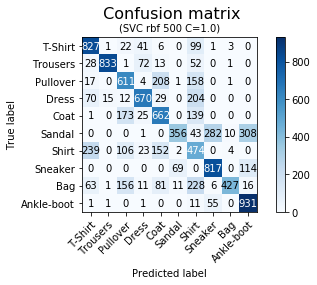

Test accuracy:  0.6608 

              precision    recall  f1-score   support

           0       0.66      0.83      0.74      1000
           1       0.98      0.83      0.90      1000
           2       0.57      0.61      0.59      1000
           3       0.79      0.67      0.73      1000
           4       0.58      0.66      0.62      1000
           5       0.81      0.36      0.49      1000
           6       0.34      0.47      0.39      1000
           7       0.70      0.82      0.76      1000
           8       0.96      0.43      0.59      1000
           9       0.68      0.93      0.79      1000

    accuracy                           0.66     10000
   macro avg       0.71      0.66      0.66     10000
weighted avg       0.71      0.66      0.66     10000



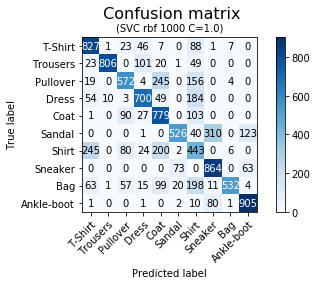

Test accuracy:  0.6954 

              precision    recall  f1-score   support

           0       0.67      0.83      0.74      1000
           1       0.99      0.81      0.89      1000
           2       0.69      0.57      0.63      1000
           3       0.76      0.70      0.73      1000
           4       0.56      0.78      0.65      1000
           5       0.84      0.53      0.65      1000
           6       0.35      0.44      0.39      1000
           7       0.68      0.86      0.76      1000
           8       0.97      0.53      0.69      1000
           9       0.83      0.91      0.86      1000

    accuracy                           0.70     10000
   macro avg       0.73      0.70      0.70     10000
weighted avg       0.73      0.70      0.70     10000



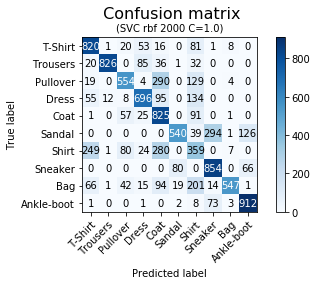

Test accuracy:  0.6933 

              precision    recall  f1-score   support

           0       0.67      0.82      0.74      1000
           1       0.98      0.83      0.90      1000
           2       0.73      0.55      0.63      1000
           3       0.77      0.70      0.73      1000
           4       0.50      0.82      0.63      1000
           5       0.84      0.54      0.66      1000
           6       0.33      0.36      0.35      1000
           7       0.69      0.85      0.76      1000
           8       0.96      0.55      0.70      1000
           9       0.83      0.91      0.87      1000

    accuracy                           0.69     10000
   macro avg       0.73      0.69      0.69     10000
weighted avg       0.73      0.69      0.69     10000



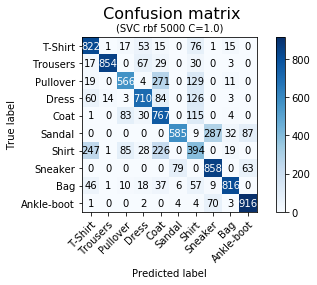

Test accuracy:  0.7288 

              precision    recall  f1-score   support

           0       0.68      0.82      0.74      1000
           1       0.98      0.85      0.91      1000
           2       0.74      0.57      0.64      1000
           3       0.78      0.71      0.74      1000
           4       0.54      0.77      0.63      1000
           5       0.87      0.58      0.70      1000
           6       0.42      0.39      0.41      1000
           7       0.70      0.86      0.77      1000
           8       0.90      0.82      0.86      1000
           9       0.86      0.92      0.89      1000

    accuracy                           0.73     10000
   macro avg       0.75      0.73      0.73     10000
weighted avg       0.75      0.73      0.73     10000



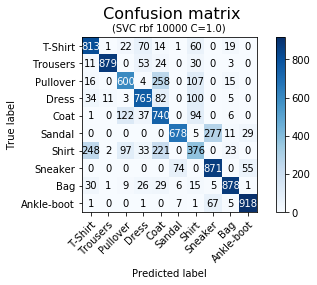

Test accuracy:  0.7518 

              precision    recall  f1-score   support

           0       0.70      0.81      0.75      1000
           1       0.98      0.88      0.93      1000
           2       0.70      0.60      0.65      1000
           3       0.77      0.77      0.77      1000
           4       0.54      0.74      0.62      1000
           5       0.89      0.68      0.77      1000
           6       0.48      0.38      0.42      1000
           7       0.71      0.87      0.78      1000
           8       0.91      0.88      0.89      1000
           9       0.92      0.92      0.92      1000

    accuracy                           0.75     10000
   macro avg       0.76      0.75      0.75     10000
weighted avg       0.76      0.75      0.75     10000



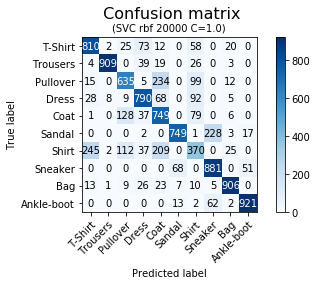

Test accuracy:  0.772 

              precision    recall  f1-score   support

           0       0.73      0.81      0.77      1000
           1       0.99      0.91      0.95      1000
           2       0.69      0.64      0.66      1000
           3       0.78      0.79      0.79      1000
           4       0.57      0.75      0.65      1000
           5       0.89      0.75      0.82      1000
           6       0.50      0.37      0.43      1000
           7       0.75      0.88      0.81      1000
           8       0.92      0.91      0.91      1000
           9       0.93      0.92      0.93      1000

    accuracy                           0.77     10000
   macro avg       0.78      0.77      0.77     10000
weighted avg       0.78      0.77      0.77     10000



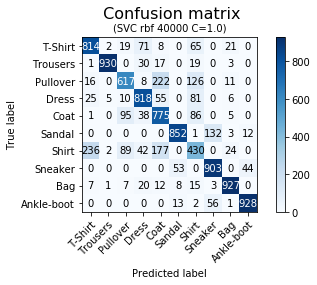

Test accuracy:  0.7994 

              precision    recall  f1-score   support

           0       0.74      0.81      0.78      1000
           1       0.99      0.93      0.96      1000
           2       0.74      0.62      0.67      1000
           3       0.80      0.82      0.81      1000
           4       0.61      0.78      0.68      1000
           5       0.92      0.85      0.88      1000
           6       0.52      0.43      0.47      1000
           7       0.83      0.90      0.86      1000
           8       0.93      0.93      0.93      1000
           9       0.94      0.93      0.94      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



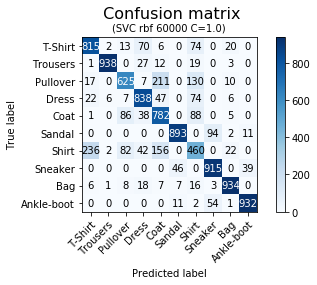

Test accuracy:  0.8132 

              precision    recall  f1-score   support

           0       0.74      0.81      0.78      1000
           1       0.99      0.94      0.96      1000
           2       0.76      0.62      0.69      1000
           3       0.81      0.84      0.82      1000
           4       0.64      0.78      0.70      1000
           5       0.93      0.89      0.91      1000
           6       0.53      0.46      0.49      1000
           7       0.86      0.92      0.89      1000
           8       0.93      0.93      0.93      1000
           9       0.95      0.93      0.94      1000

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000



In [30]:
# RBF_SVC mit C=1 trainieren und Ergebnisse speichern, seed=1
train_RBF_SVC_without_std(X_tr_500, X_test_9_4_2, y_tr_500, y_test, 1, '500',1.0, 'auto','ovo',
               "SVM_Modelle_FM/Hog_default/rbf/Neue Mengen/", "seed_1_random_A_with_scaler_without_std", "HOG_942_ovo.pkl")
train_RBF_SVC_without_std(X_tr_1000, X_test_9_4_2, y_tr_1000, y_test, 1, '1000',1.0,'auto','ovo',
               "SVM_Modelle_FM/Hog_default/rbf/Neue Mengen/", "seed_1_random_A_with_scaler_without_std", "HOG_942_ovo.pkl")
train_RBF_SVC_without_std(X_tr_2000, X_test_9_4_2, y_tr_2000, y_test, 1, '2000',1.0,'auto','ovo',
               "SVM_Modelle_FM/Hog_default/rbf/Neue Mengen/", "seed_1_random_A_with_scaler_without_std", "HOG_942_ovo.pkl")
train_RBF_SVC_without_std(X_tr_5000, X_test_9_4_2, y_tr_5000, y_test, 1, '5000',1.0,'auto','ovo',
               "SVM_Modelle_FM/Hog_default/rbf/Neue Mengen/", "seed_1_random_A_with_scaler_without_std", "HOG_942_ovo.pkl")
train_RBF_SVC_without_std(X_tr_10000, X_test_9_4_2, y_tr_10000, y_test, 1, '10000',1.0,'auto','ovo',
               "SVM_Modelle_FM/Hog_default/rbf/Neue Mengen/", "seed_1_random_A_with_scaler_without_std", "HOG_942_ovo.pkl")
train_RBF_SVC_without_std(X_tr_20000, X_test_9_4_2, y_tr_20000, y_test, 1, '20000',1.0,'auto','ovo',
               "SVM_Modelle_FM/Hog_default/rbf/Neue Mengen/", "seed_1_random_A_with_scaler_without_std", "HOG_942_ovo.pkl")
train_RBF_SVC_without_std(X_tr_40000, X_test_9_4_2, y_tr_40000, y_test, 1, '40000',1.0,'auto','ovo',
               "SVM_Modelle_FM/Hog_default/rbf/Neue Mengen//", "seed_1_random_A_with_scaler_without_std", "HOG_942_ovo.pkl")
train_RBF_SVC_without_std(X_train_9_4_2, X_test_9_4_2, y_train, y_test, 1, '60000',1.0,'auto','ovo',
               "SVM_Modelle_FM/Hog_default/rbf/Neue Mengen/", "seed_1_random_A_with_scaler_without_std", "HOG_942_ovo.pkl")

In [ ]:
############################################################################
##################  RBF, mit StandardScaler, ohne PCA ######################
###  https://scikit-learn.org/stable/modules/preprocessing.html ############
#####   'ovo'
############################################################################

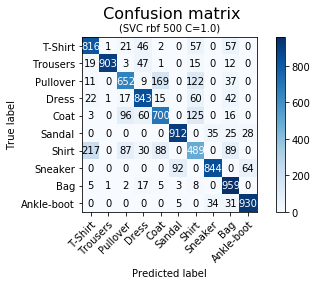

Test accuracy:  0.8048 

              precision    recall  f1-score   support

           0       0.75      0.82      0.78      1000
           1       1.00      0.90      0.95      1000
           2       0.74      0.65      0.69      1000
           3       0.80      0.84      0.82      1000
           4       0.71      0.70      0.71      1000
           5       0.90      0.91      0.91      1000
           6       0.56      0.49      0.52      1000
           7       0.92      0.84      0.88      1000
           8       0.76      0.96      0.85      1000
           9       0.91      0.93      0.92      1000

    accuracy                           0.80     10000
   macro avg       0.81      0.80      0.80     10000
weighted avg       0.81      0.80      0.80     10000



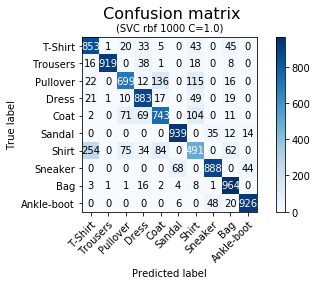

Test accuracy:  0.8305 

              precision    recall  f1-score   support

           0       0.73      0.85      0.79      1000
           1       1.00      0.92      0.96      1000
           2       0.80      0.70      0.75      1000
           3       0.81      0.88      0.85      1000
           4       0.75      0.74      0.75      1000
           5       0.92      0.94      0.93      1000
           6       0.59      0.49      0.54      1000
           7       0.91      0.89      0.90      1000
           8       0.83      0.96      0.89      1000
           9       0.94      0.93      0.93      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



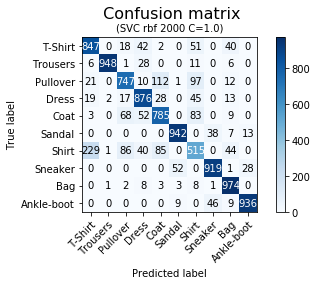

Test accuracy:  0.8489 

              precision    recall  f1-score   support

           0       0.75      0.85      0.80      1000
           1       1.00      0.95      0.97      1000
           2       0.80      0.75      0.77      1000
           3       0.83      0.88      0.85      1000
           4       0.77      0.79      0.78      1000
           5       0.94      0.94      0.94      1000
           6       0.64      0.52      0.57      1000
           7       0.92      0.92      0.92      1000
           8       0.87      0.97      0.92      1000
           9       0.96      0.94      0.95      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



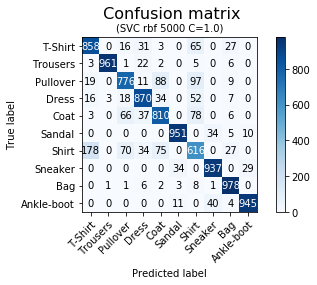

Test accuracy:  0.8702 

              precision    recall  f1-score   support

           0       0.80      0.86      0.83      1000
           1       1.00      0.96      0.98      1000
           2       0.82      0.78      0.80      1000
           3       0.86      0.87      0.87      1000
           4       0.80      0.81      0.80      1000
           5       0.95      0.95      0.95      1000
           6       0.67      0.62      0.64      1000
           7       0.93      0.94      0.93      1000
           8       0.91      0.98      0.95      1000
           9       0.96      0.94      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



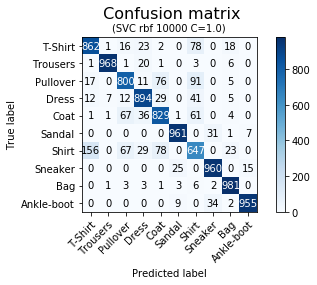

Test accuracy:  0.8857 

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.83      0.80      0.81      1000
           3       0.88      0.89      0.89      1000
           4       0.82      0.83      0.82      1000
           5       0.96      0.96      0.96      1000
           6       0.70      0.65      0.67      1000
           7       0.93      0.96      0.95      1000
           8       0.94      0.98      0.96      1000
           9       0.98      0.95      0.97      1000

    accuracy                           0.89     10000
   macro avg       0.88      0.89      0.88     10000
weighted avg       0.88      0.89      0.88     10000



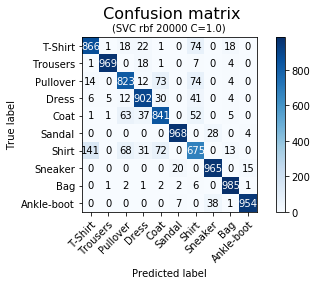

Test accuracy:  0.8948 

              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1000
           1       0.99      0.97      0.98      1000
           2       0.83      0.82      0.83      1000
           3       0.88      0.90      0.89      1000
           4       0.82      0.84      0.83      1000
           5       0.97      0.97      0.97      1000
           6       0.73      0.68      0.70      1000
           7       0.94      0.96      0.95      1000
           8       0.95      0.98      0.97      1000
           9       0.98      0.95      0.97      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



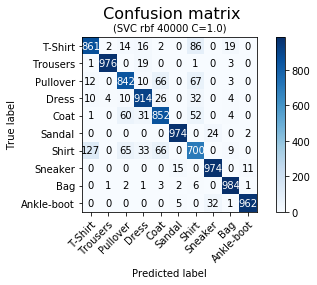

Test accuracy:  0.9039 

              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1000
           1       0.99      0.98      0.98      1000
           2       0.85      0.84      0.84      1000
           3       0.89      0.91      0.90      1000
           4       0.84      0.85      0.85      1000
           5       0.98      0.97      0.98      1000
           6       0.74      0.70      0.72      1000
           7       0.95      0.97      0.96      1000
           8       0.96      0.98      0.97      1000
           9       0.99      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



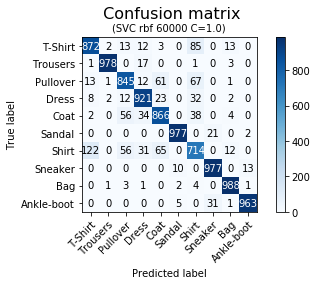

Test accuracy:  0.9101 

              precision    recall  f1-score   support

           0       0.86      0.87      0.86      1000
           1       0.99      0.98      0.99      1000
           2       0.86      0.84      0.85      1000
           3       0.90      0.92      0.91      1000
           4       0.85      0.87      0.86      1000
           5       0.98      0.98      0.98      1000
           6       0.76      0.71      0.74      1000
           7       0.95      0.98      0.96      1000
           8       0.96      0.99      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [31]:
# RBF_SVC mit C=1 trainieren und Ergebnisse speichern, seed=1
train_RBF_SVC(X_tr_500, X_test_9_4_2, y_tr_500, y_test, 1, '500',1.0, 'auto','ovo',
               "SVM_Modelle_FM/Hog_default/rbf/Neue Mengen/", "seed_1_random_A_with_scaler", "HOG_942_ovo.pkl")
train_RBF_SVC(X_tr_1000, X_test_9_4_2, y_tr_1000, y_test, 1, '1000',1.0,'auto','ovo',
               "SVM_Modelle_FM/Hog_default/rbf/Neue Mengen/", "seed_1_random_A_with_scaler", "HOG_942_ovo.pkl")
train_RBF_SVC(X_tr_2000, X_test_9_4_2, y_tr_2000, y_test, 1, '2000',1.0,'auto','ovo',
               "SVM_Modelle_FM/Hog_default/rbf/Neue Mengen/", "seed_1_random_A_with_scaler", "HOG_942_ovo.pkl")
train_RBF_SVC(X_tr_5000, X_test_9_4_2, y_tr_5000, y_test, 1, '5000',1.0,'auto','ovo',
               "SVM_Modelle_FM/Hog_default/rbf/Neue Mengen/", "seed_1_random_A_with_scaler", "HOG_942_ovo.pkl")
train_RBF_SVC(X_tr_10000, X_test_9_4_2, y_tr_10000, y_test, 1, '10000',1.0,'auto','ovo',
               "SVM_Modelle_FM/Hog_default/rbf/Neue Mengen/", "seed_1_random_A_with_scaler", "HOG_942_ovo.pkl")
train_RBF_SVC(X_tr_20000, X_test_9_4_2, y_tr_20000, y_test, 1, '20000',1.0,'auto','ovo',
               "SVM_Modelle_FM/Hog_default/rbf/Neue Mengen/", "seed_1_random_A_with_scaler", "HOG_942_ovo.pkl")
train_RBF_SVC(X_tr_40000, X_test_9_4_2, y_tr_40000, y_test, 1, '40000',1.0,'auto','ovo',
               "SVM_Modelle_FM/Hog_default/rbf/Neue Mengen//", "seed_1_random_A_with_scaler", "HOG_942_ovo.pkl")
train_RBF_SVC(X_train_9_4_2, X_test_9_4_2, y_train, y_test, 1, '60000',1.0,'auto','ovo',
               "SVM_Modelle_FM/Hog_default/rbf/Neue Mengen/", "seed_1_random_A_with_scaler", "HOG_942_ovo.pkl")

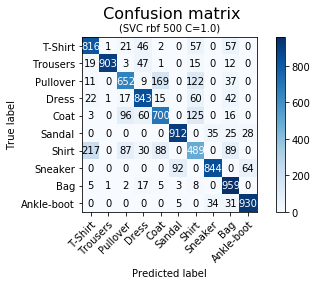

Test accuracy:  0.8048 

              precision    recall  f1-score   support

           0       0.75      0.82      0.78      1000
           1       1.00      0.90      0.95      1000
           2       0.74      0.65      0.69      1000
           3       0.80      0.84      0.82      1000
           4       0.71      0.70      0.71      1000
           5       0.90      0.91      0.91      1000
           6       0.56      0.49      0.52      1000
           7       0.92      0.84      0.88      1000
           8       0.76      0.96      0.85      1000
           9       0.91      0.93      0.92      1000

    accuracy                           0.80     10000
   macro avg       0.81      0.80      0.80     10000
weighted avg       0.81      0.80      0.80     10000



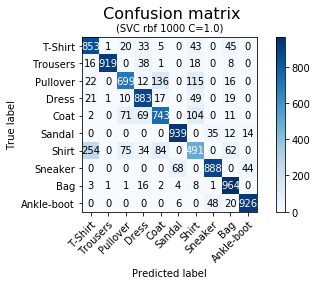

Test accuracy:  0.8305 

              precision    recall  f1-score   support

           0       0.73      0.85      0.79      1000
           1       1.00      0.92      0.96      1000
           2       0.80      0.70      0.75      1000
           3       0.81      0.88      0.85      1000
           4       0.75      0.74      0.75      1000
           5       0.92      0.94      0.93      1000
           6       0.59      0.49      0.54      1000
           7       0.91      0.89      0.90      1000
           8       0.83      0.96      0.89      1000
           9       0.94      0.93      0.93      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



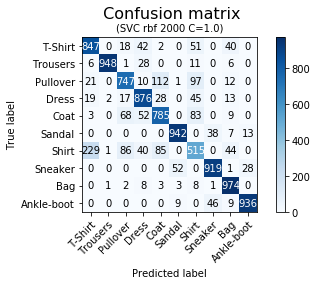

Test accuracy:  0.8489 

              precision    recall  f1-score   support

           0       0.75      0.85      0.80      1000
           1       1.00      0.95      0.97      1000
           2       0.80      0.75      0.77      1000
           3       0.83      0.88      0.85      1000
           4       0.77      0.79      0.78      1000
           5       0.94      0.94      0.94      1000
           6       0.64      0.52      0.57      1000
           7       0.92      0.92      0.92      1000
           8       0.87      0.97      0.92      1000
           9       0.96      0.94      0.95      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



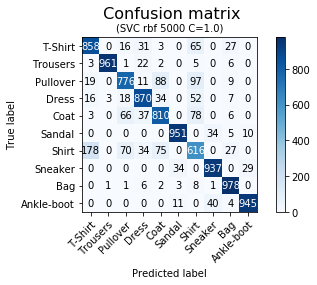

Test accuracy:  0.8702 

              precision    recall  f1-score   support

           0       0.80      0.86      0.83      1000
           1       1.00      0.96      0.98      1000
           2       0.82      0.78      0.80      1000
           3       0.86      0.87      0.87      1000
           4       0.80      0.81      0.80      1000
           5       0.95      0.95      0.95      1000
           6       0.67      0.62      0.64      1000
           7       0.93      0.94      0.93      1000
           8       0.91      0.98      0.95      1000
           9       0.96      0.94      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



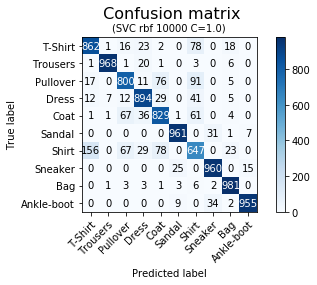

Test accuracy:  0.8857 

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.83      0.80      0.81      1000
           3       0.88      0.89      0.89      1000
           4       0.82      0.83      0.82      1000
           5       0.96      0.96      0.96      1000
           6       0.70      0.65      0.67      1000
           7       0.93      0.96      0.95      1000
           8       0.94      0.98      0.96      1000
           9       0.98      0.95      0.97      1000

    accuracy                           0.89     10000
   macro avg       0.88      0.89      0.88     10000
weighted avg       0.88      0.89      0.88     10000



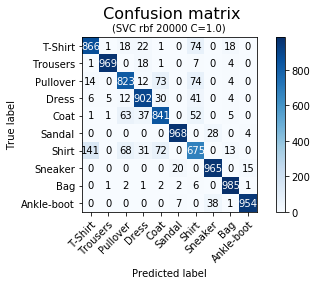

Test accuracy:  0.8948 

              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1000
           1       0.99      0.97      0.98      1000
           2       0.83      0.82      0.83      1000
           3       0.88      0.90      0.89      1000
           4       0.82      0.84      0.83      1000
           5       0.97      0.97      0.97      1000
           6       0.73      0.68      0.70      1000
           7       0.94      0.96      0.95      1000
           8       0.95      0.98      0.97      1000
           9       0.98      0.95      0.97      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



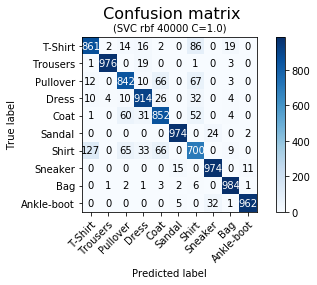

Test accuracy:  0.9039 

              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1000
           1       0.99      0.98      0.98      1000
           2       0.85      0.84      0.84      1000
           3       0.89      0.91      0.90      1000
           4       0.84      0.85      0.85      1000
           5       0.98      0.97      0.98      1000
           6       0.74      0.70      0.72      1000
           7       0.95      0.97      0.96      1000
           8       0.96      0.98      0.97      1000
           9       0.99      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



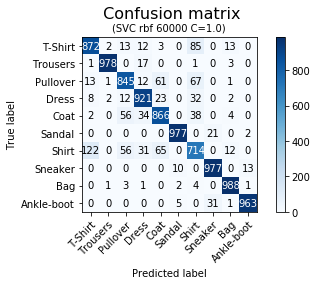

Test accuracy:  0.9101 

              precision    recall  f1-score   support

           0       0.86      0.87      0.86      1000
           1       0.99      0.98      0.99      1000
           2       0.86      0.84      0.85      1000
           3       0.90      0.92      0.91      1000
           4       0.85      0.87      0.86      1000
           5       0.98      0.98      0.98      1000
           6       0.76      0.71      0.74      1000
           7       0.95      0.98      0.96      1000
           8       0.96      0.99      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [32]:
# RBF_SVC mit C=1 trainieren und Ergebnisse speichern, seed=7
train_RBF_SVC(X_tr_500, X_test_9_4_2, y_tr_500, y_test, 7, '500',1.0, 'auto','ovo',
               "SVM_Modelle_FM/Hog_default/rbf/Neue Mengen/", "seed_7_random_A_with_scaler", "HOG_942_ovo.pkl")
train_RBF_SVC(X_tr_1000, X_test_9_4_2, y_tr_1000, y_test, 7, '1000',1.0,'auto','ovo',
               "SVM_Modelle_FM/Hog_default/rbf/Neue Mengen/", "seed_7_random_A_with_scaler", "HOG_942_ovo.pkl")
train_RBF_SVC(X_tr_2000, X_test_9_4_2, y_tr_2000, y_test, 7, '2000',1.0,'auto','ovo',
               "SVM_Modelle_FM/Hog_default/rbf/Neue Mengen/", "seed_7_random_A_with_scaler", "HOG_942_ovo.pkl")
train_RBF_SVC(X_tr_5000, X_test_9_4_2, y_tr_5000, y_test, 7, '5000',1.0,'auto','ovo',
               "SVM_Modelle_FM/Hog_default/rbf/Neue Mengen/", "seed_7_random_A_with_scaler", "HOG_942_ovo.pkl")
train_RBF_SVC(X_tr_10000, X_test_9_4_2, y_tr_10000, y_test, 7, '10000',1.0,'auto','ovo',
               "SVM_Modelle_FM/Hog_default/rbf/Neue Mengen/", "seed_7_random_A_with_scaler", "HOG_942_ovo.pkl")
train_RBF_SVC(X_tr_20000, X_test_9_4_2, y_tr_20000, y_test, 7, '20000',1.0,'auto','ovo',
               "SVM_Modelle_FM/Hog_default/rbf/Neue Mengen/", "seed_7_random_A_with_scaler", "HOG_942_ovo.pkl")
train_RBF_SVC(X_tr_40000, X_test_9_4_2, y_tr_40000, y_test, 7, '40000',1.0,'auto','ovo',
               "SVM_Modelle_FM/Hog_default/rbf/Neue Mengen//", "seed_7_random_A_with_scaler", "HOG_942_ovo.pkl")
train_RBF_SVC(X_train_9_4_2, X_test_9_4_2, y_train, y_test, 7, '60000',1.0,'auto','ovo',
               "SVM_Modelle_FM/Hog_default/rbf/Neue Mengen/", "seed_7_random_A_with_scaler", "HOG_942_ovo.pkl")

In [ ]:
##############################################################################
##############################################################################
###########  TRAINING der SVMs mit VGG16-Features ############################
##############################################################################
##############################################################################

In [19]:
'''
Trainings- und Testdaten (VGG16-Features) laden
'''
X_train_vgg16 = load_vgg16_features("Fashion_MNIST_VGG16_Data/Vgg16_Trainingsdaten.npy")
X_test_vgg16 = load_vgg16_features("Fashion_MNIST_VGG16_Data/Vgg16_Testdaten.npy")
y_train_vgg16 = load_labels("Fashion_MNIST_VGG16_Data/Vgg16_Train_Label.npy")
y_test_vgg16 = load_labels("Fashion_MNIST_VGG16_Data/Vgg16_Test_Label.npy")


In [20]:
'''
Trainingsdatensätze unterschiedlicher Größe erstellen
random_state=A
'''
X_tr_40000, y_tr_40000, X_tr_20000, y_tr_20000, X_tr_10000, y_tr_10000, X_tr_5000, y_tr_5000, X_tr_2000, y_tr_2000, X_tr_1000, y_tr_1000, X_tr_500, y_tr_500 = make_subsets_training_data_A(X_train_vgg16, y_train_vgg16)

C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


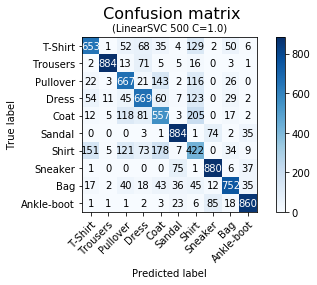

Test accuracy:  0.7228 

              precision    recall  f1-score   support

           0       0.72      0.65      0.68      1000
           1       0.97      0.88      0.92      1000
           2       0.63      0.67      0.65      1000
           3       0.67      0.67      0.67      1000
           4       0.54      0.56      0.55      1000
           5       0.85      0.88      0.86      1000
           6       0.40      0.42      0.41      1000
           7       0.84      0.88      0.86      1000
           8       0.80      0.75      0.78      1000
           9       0.87      0.86      0.87      1000

    accuracy                           0.72     10000
   macro avg       0.73      0.72      0.72     10000
weighted avg       0.73      0.72      0.72     10000



C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


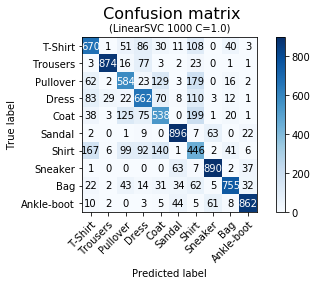

Test accuracy:  0.7177 

              precision    recall  f1-score   support

           0       0.63      0.67      0.65      1000
           1       0.95      0.87      0.91      1000
           2       0.62      0.58      0.60      1000
           3       0.64      0.66      0.65      1000
           4       0.57      0.54      0.55      1000
           5       0.84      0.90      0.87      1000
           6       0.39      0.45      0.42      1000
           7       0.87      0.89      0.88      1000
           8       0.84      0.76      0.80      1000
           9       0.89      0.86      0.88      1000

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000



C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


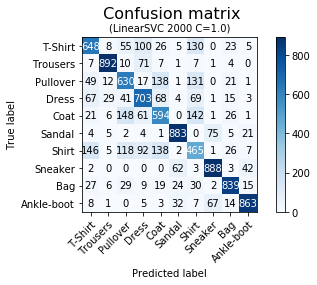

Test accuracy:  0.7405 

              precision    recall  f1-score   support

           0       0.66      0.65      0.65      1000
           1       0.93      0.89      0.91      1000
           2       0.61      0.63      0.62      1000
           3       0.66      0.70      0.68      1000
           4       0.60      0.59      0.60      1000
           5       0.87      0.88      0.88      1000
           6       0.47      0.47      0.47      1000
           7       0.86      0.89      0.87      1000
           8       0.86      0.84      0.85      1000
           9       0.90      0.86      0.88      1000

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.74      0.74      0.74     10000



C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


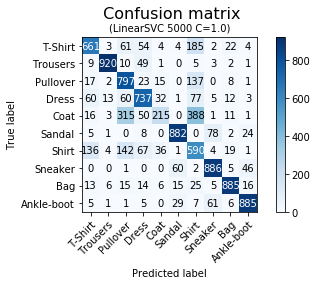

Test accuracy:  0.7458 

              precision    recall  f1-score   support

           0       0.72      0.66      0.69      1000
           1       0.97      0.92      0.94      1000
           2       0.57      0.80      0.66      1000
           3       0.73      0.74      0.73      1000
           4       0.70      0.21      0.33      1000
           5       0.89      0.88      0.89      1000
           6       0.42      0.59      0.49      1000
           7       0.85      0.89      0.87      1000
           8       0.91      0.89      0.90      1000
           9       0.90      0.89      0.89      1000

    accuracy                           0.75     10000
   macro avg       0.76      0.75      0.74     10000
weighted avg       0.76      0.75      0.74     10000



C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


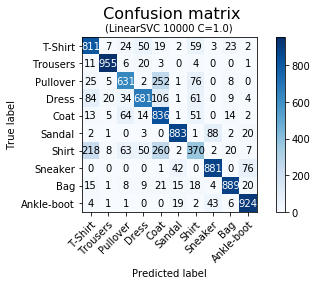

Test accuracy:  0.7861 

              precision    recall  f1-score   support

           0       0.69      0.81      0.74      1000
           1       0.95      0.95      0.95      1000
           2       0.76      0.63      0.69      1000
           3       0.82      0.68      0.74      1000
           4       0.56      0.84      0.67      1000
           5       0.91      0.88      0.90      1000
           6       0.58      0.37      0.45      1000
           7       0.86      0.88      0.87      1000
           8       0.92      0.89      0.90      1000
           9       0.88      0.92      0.90      1000

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.78     10000
weighted avg       0.79      0.79      0.78     10000



C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


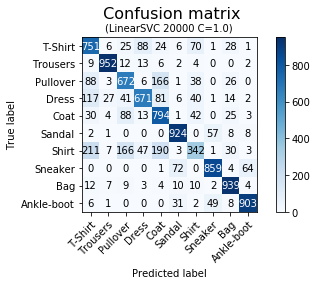

Test accuracy:  0.7807 

              precision    recall  f1-score   support

           0       0.61      0.75      0.67      1000
           1       0.94      0.95      0.95      1000
           2       0.66      0.67      0.67      1000
           3       0.80      0.67      0.73      1000
           4       0.63      0.79      0.70      1000
           5       0.88      0.92      0.90      1000
           6       0.62      0.34      0.44      1000
           7       0.89      0.86      0.87      1000
           8       0.87      0.94      0.90      1000
           9       0.91      0.90      0.91      1000

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.77     10000
weighted avg       0.78      0.78      0.77     10000



C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


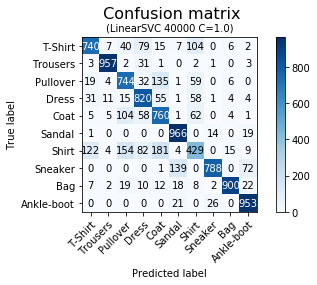

Test accuracy:  0.8057 

              precision    recall  f1-score   support

           0       0.80      0.74      0.77      1000
           1       0.97      0.96      0.96      1000
           2       0.69      0.74      0.72      1000
           3       0.74      0.82      0.78      1000
           4       0.66      0.76      0.70      1000
           5       0.83      0.97      0.90      1000
           6       0.59      0.43      0.50      1000
           7       0.95      0.79      0.86      1000
           8       0.96      0.90      0.93      1000
           9       0.88      0.95      0.91      1000

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.80     10000
weighted avg       0.81      0.81      0.80     10000



C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


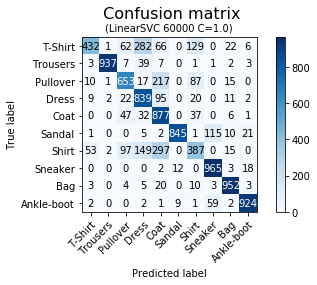

Test accuracy:  0.7811 

              precision    recall  f1-score   support

           0       0.84      0.43      0.57      1000
           1       0.99      0.94      0.96      1000
           2       0.73      0.65      0.69      1000
           3       0.61      0.84      0.71      1000
           4       0.55      0.88      0.68      1000
           5       0.98      0.84      0.91      1000
           6       0.58      0.39      0.46      1000
           7       0.84      0.96      0.90      1000
           8       0.92      0.95      0.93      1000
           9       0.94      0.92      0.93      1000

    accuracy                           0.78     10000
   macro avg       0.80      0.78      0.78     10000
weighted avg       0.80      0.78      0.78     10000



In [72]:
############################################################################
##################  LinearSVC, hinge, ohne StandardScaler, ohne PCA ########
############################################################################

#######  seed 1 ##########

train_LinearSVC(X_tr_500, X_test_vgg16, y_tr_500, y_test_vgg16, 1, '500',1.0,
               "SVM_Modelle_FM/VGG16_default/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler", "VGG16.pkl")
train_LinearSVC(X_tr_1000, X_test_vgg16, y_tr_1000, y_test_vgg16, 1, '1000',1.0,
               "SVM_Modelle_FM/VGG16_default/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler", "VGG16.pkl")
train_LinearSVC(X_tr_2000, X_test_vgg16, y_tr_2000, y_test_vgg16, 1, '2000',1.0,
               "SVM_Modelle_FM/VGG16_default/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler", "VGG16.pkl")
train_LinearSVC(X_tr_5000, X_test_vgg16, y_tr_5000, y_test_vgg16, 1, '5000',1.0,
               "SVM_Modelle_FM/VGG16_default/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler", "VGG16.pkl")
train_LinearSVC(X_tr_10000, X_test_vgg16, y_tr_10000, y_test_vgg16, 1, '10000',1.0,
               "SVM_Modelle_FM/VGG16_default/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler", "VGG16.pkl")
train_LinearSVC(X_tr_20000, X_test_vgg16, y_tr_20000, y_test_vgg16, 1, '20000',1.0,
               "SVM_Modelle_FM/VGG16_default/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler", "VGG16.pkl")
train_LinearSVC(X_tr_40000, X_test_vgg16, y_tr_40000, y_test_vgg16, 1, '40000',1.0,
               "SVM_Modelle_FM/VGG16_default/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler", "VGG16.pkl")
train_LinearSVC(X_train_vgg16, X_test_vgg16, y_train_vgg16, y_test_vgg16, 1, '60000',1.0,
               "SVM_Modelle_FM/VGG16_default/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler", "VGG16.pkl")

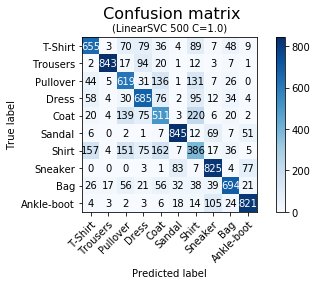

Test accuracy:  0.6884 

              precision    recall  f1-score   support

           0       0.67      0.66      0.66      1000
           1       0.95      0.84      0.90      1000
           2       0.57      0.62      0.59      1000
           3       0.64      0.69      0.66      1000
           4       0.51      0.51      0.51      1000
           5       0.85      0.84      0.85      1000
           6       0.38      0.39      0.39      1000
           7       0.76      0.82      0.79      1000
           8       0.77      0.69      0.73      1000
           9       0.83      0.82      0.82      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000



C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


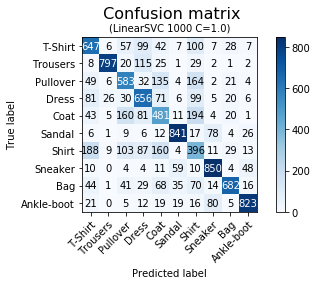

Test accuracy:  0.6756 

              precision    recall  f1-score   support

           0       0.59      0.65      0.62      1000
           1       0.94      0.80      0.86      1000
           2       0.58      0.58      0.58      1000
           3       0.59      0.66      0.62      1000
           4       0.47      0.48      0.48      1000
           5       0.85      0.84      0.85      1000
           6       0.36      0.40      0.38      1000
           7       0.81      0.85      0.83      1000
           8       0.84      0.68      0.75      1000
           9       0.87      0.82      0.85      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


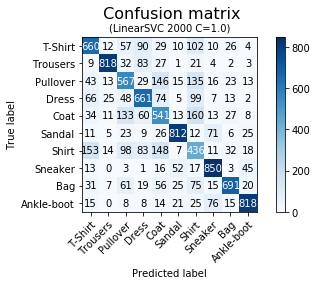

Test accuracy:  0.6854 

              precision    recall  f1-score   support

           0       0.64      0.66      0.65      1000
           1       0.90      0.82      0.86      1000
           2       0.55      0.57      0.56      1000
           3       0.63      0.66      0.65      1000
           4       0.50      0.54      0.52      1000
           5       0.84      0.81      0.83      1000
           6       0.40      0.44      0.42      1000
           7       0.79      0.85      0.82      1000
           8       0.82      0.69      0.75      1000
           9       0.86      0.82      0.84      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000



C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


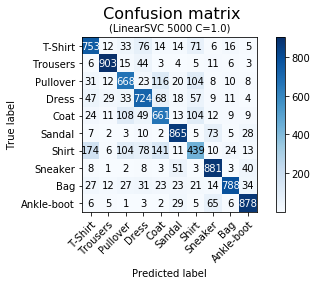

Test accuracy:  0.756 

              precision    recall  f1-score   support

           0       0.70      0.75      0.72      1000
           1       0.91      0.90      0.91      1000
           2       0.67      0.67      0.67      1000
           3       0.69      0.72      0.71      1000
           4       0.64      0.66      0.65      1000
           5       0.83      0.86      0.84      1000
           6       0.54      0.44      0.48      1000
           7       0.81      0.88      0.84      1000
           8       0.90      0.79      0.84      1000
           9       0.86      0.88      0.87      1000

    accuracy                           0.76     10000
   macro avg       0.75      0.76      0.75     10000
weighted avg       0.75      0.76      0.75     10000



C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


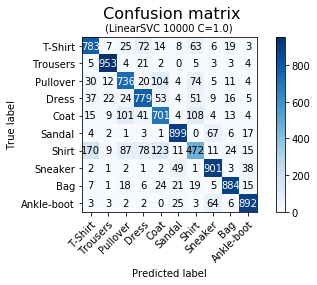

Test accuracy:  0.8 

              precision    recall  f1-score   support

           0       0.74      0.78      0.76      1000
           1       0.94      0.95      0.94      1000
           2       0.74      0.74      0.74      1000
           3       0.76      0.78      0.77      1000
           4       0.68      0.70      0.69      1000
           5       0.88      0.90      0.89      1000
           6       0.59      0.47      0.53      1000
           7       0.84      0.90      0.87      1000
           8       0.90      0.88      0.89      1000
           9       0.89      0.89      0.89      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


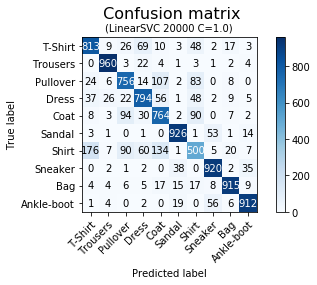

Test accuracy:  0.826 

              precision    recall  f1-score   support

           0       0.76      0.81      0.79      1000
           1       0.94      0.96      0.95      1000
           2       0.76      0.76      0.76      1000
           3       0.79      0.79      0.79      1000
           4       0.70      0.76      0.73      1000
           5       0.92      0.93      0.92      1000
           6       0.63      0.50      0.56      1000
           7       0.88      0.92      0.90      1000
           8       0.93      0.92      0.92      1000
           9       0.92      0.91      0.92      1000

    accuracy                           0.83     10000
   macro avg       0.82      0.83      0.82     10000
weighted avg       0.82      0.83      0.82     10000



C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


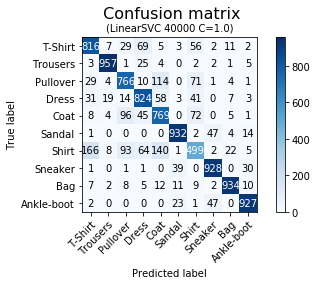

Test accuracy:  0.8352 

              precision    recall  f1-score   support

           0       0.77      0.82      0.79      1000
           1       0.96      0.96      0.96      1000
           2       0.76      0.77      0.76      1000
           3       0.79      0.82      0.81      1000
           4       0.70      0.77      0.73      1000
           5       0.92      0.93      0.93      1000
           6       0.66      0.50      0.57      1000
           7       0.90      0.93      0.91      1000
           8       0.95      0.93      0.94      1000
           9       0.93      0.93      0.93      1000

    accuracy                           0.84     10000
   macro avg       0.83      0.84      0.83     10000
weighted avg       0.83      0.84      0.83     10000



C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


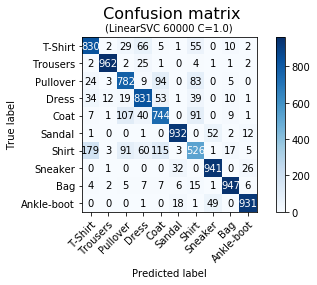

Test accuracy:  0.8426 

              precision    recall  f1-score   support

           0       0.77      0.83      0.80      1000
           1       0.98      0.96      0.97      1000
           2       0.76      0.78      0.77      1000
           3       0.80      0.83      0.81      1000
           4       0.73      0.74      0.74      1000
           5       0.94      0.93      0.94      1000
           6       0.65      0.53      0.58      1000
           7       0.90      0.94      0.92      1000
           8       0.95      0.95      0.95      1000
           9       0.94      0.93      0.94      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



In [73]:
############################################################################
##################  LinearSVC, hinge, mit StandardScaler, ohne PCA ########
############################################################################

#######  seed 1 ##########

train_LinearSVC_scaled_full(X_tr_500, X_test_vgg16, y_tr_500, y_test_vgg16, 1, '500',1.0,
               "SVM_Modelle_FM/VGG16_default/LinearSVC/Neue Mengen/", "seed_1_random_A_with_scaler", "VGG16.pkl")
train_LinearSVC_scaled_full(X_tr_1000, X_test_vgg16, y_tr_1000, y_test_vgg16, 1, '1000',1.0,
               "SVM_Modelle_FM/VGG16_default/LinearSVC/Neue Mengen/", "seed_1_random_A_with_scaler", "VGG16.pkl")
train_LinearSVC_scaled_full(X_tr_2000, X_test_vgg16, y_tr_2000, y_test_vgg16, 1, '2000',1.0,
               "SVM_Modelle_FM/VGG16_default/LinearSVC/Neue Mengen/", "seed_1_random_A_with_scaler", "VGG16.pkl")
train_LinearSVC_scaled_full(X_tr_5000, X_test_vgg16, y_tr_5000, y_test_vgg16, 1, '5000',1.0,
               "SVM_Modelle_FM/VGG16_default/LinearSVC/Neue Mengen/", "seed_1_random_A_with_scaler", "VGG16.pkl")
train_LinearSVC_scaled_full(X_tr_10000, X_test_vgg16, y_tr_10000, y_test_vgg16, 1, '10000',1.0,
               "SVM_Modelle_FM/VGG16_default/LinearSVC/Neue Mengen/", "seed_1_random_A_with_scaler", "VGG16.pkl")
train_LinearSVC_scaled_full(X_tr_20000, X_test_vgg16, y_tr_20000, y_test_vgg16, 1, '20000',1.0,
               "SVM_Modelle_FM/VGG16_default/LinearSVC/Neue Mengen/", "seed_1_random_A_with_scaler", "VGG16.pkl")
train_LinearSVC_scaled_full(X_tr_40000, X_test_vgg16, y_tr_40000, y_test_vgg16, 1, '40000',1.0,
               "SVM_Modelle_FM/VGG16_default/LinearSVC/Neue Mengen/", "seed_1_random_A_with_scaler", "VGG16.pkl")
train_LinearSVC_scaled_full(X_train_vgg16, X_test_vgg16, y_train_vgg16, y_test_vgg16, 1, '60000',1.0,
               "SVM_Modelle_FM/VGG16_default/LinearSVC/Neue Mengen/", "seed_1_random_A_with_scaler", "VGG16.pkl")

C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


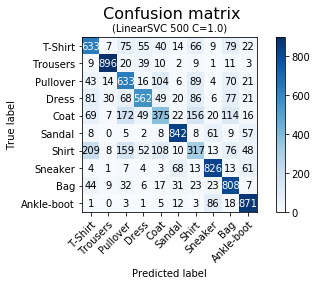

Test accuracy:  0.6763 

              precision    recall  f1-score   support

           0       0.57      0.63      0.60      1000
           1       0.92      0.90      0.91      1000
           2       0.54      0.63      0.58      1000
           3       0.72      0.56      0.63      1000
           4       0.52      0.38      0.44      1000
           5       0.82      0.84      0.83      1000
           6       0.41      0.32      0.36      1000
           7       0.79      0.83      0.81      1000
           8       0.63      0.81      0.71      1000
           9       0.77      0.87      0.82      1000

    accuracy                           0.68     10000
   macro avg       0.67      0.68      0.67     10000
weighted avg       0.67      0.68      0.67     10000



C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


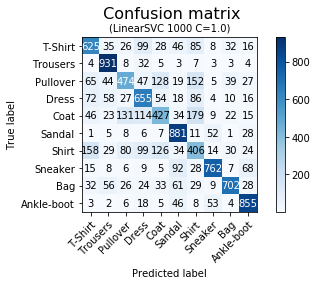

Test accuracy:  0.6718 

              precision    recall  f1-score   support

           0       0.61      0.62      0.62      1000
           1       0.78      0.93      0.85      1000
           2       0.60      0.47      0.53      1000
           3       0.59      0.66      0.62      1000
           4       0.52      0.43      0.47      1000
           5       0.71      0.88      0.79      1000
           6       0.41      0.41      0.41      1000
           7       0.83      0.76      0.79      1000
           8       0.83      0.70      0.76      1000
           9       0.79      0.85      0.82      1000

    accuracy                           0.67     10000
   macro avg       0.67      0.67      0.67     10000
weighted avg       0.67      0.67      0.67     10000



C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


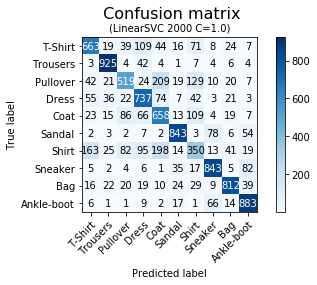

Test accuracy:  0.7233 

              precision    recall  f1-score   support

           0       0.68      0.66      0.67      1000
           1       0.87      0.93      0.89      1000
           2       0.67      0.52      0.58      1000
           3       0.66      0.74      0.70      1000
           4       0.55      0.66      0.60      1000
           5       0.85      0.84      0.85      1000
           6       0.46      0.35      0.40      1000
           7       0.81      0.84      0.83      1000
           8       0.84      0.81      0.83      1000
           9       0.80      0.88      0.84      1000

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000



C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


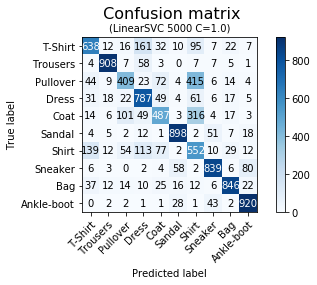

Test accuracy:  0.7284 

              precision    recall  f1-score   support

           0       0.70      0.64      0.67      1000
           1       0.92      0.91      0.91      1000
           2       0.65      0.41      0.50      1000
           3       0.65      0.79      0.71      1000
           4       0.65      0.49      0.56      1000
           5       0.88      0.90      0.89      1000
           6       0.38      0.55      0.45      1000
           7       0.86      0.84      0.85      1000
           8       0.88      0.85      0.86      1000
           9       0.86      0.92      0.89      1000

    accuracy                           0.73     10000
   macro avg       0.74      0.73      0.73     10000
weighted avg       0.74      0.73      0.73     10000



C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


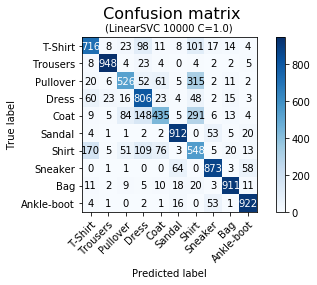

Test accuracy:  0.7597 

              precision    recall  f1-score   support

           0       0.71      0.72      0.72      1000
           1       0.95      0.95      0.95      1000
           2       0.74      0.53      0.61      1000
           3       0.65      0.81      0.72      1000
           4       0.70      0.43      0.54      1000
           5       0.88      0.91      0.90      1000
           6       0.41      0.55      0.47      1000
           7       0.86      0.87      0.87      1000
           8       0.92      0.91      0.91      1000
           9       0.88      0.92      0.90      1000

    accuracy                           0.76     10000
   macro avg       0.77      0.76      0.76     10000
weighted avg       0.77      0.76      0.76     10000



C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


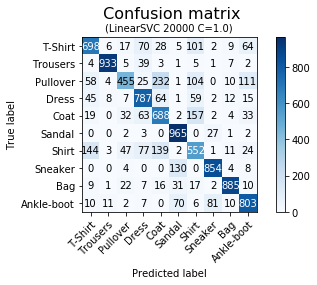

Test accuracy:  0.762 

              precision    recall  f1-score   support

           0       0.71      0.70      0.70      1000
           1       0.97      0.93      0.95      1000
           2       0.77      0.46      0.57      1000
           3       0.73      0.79      0.76      1000
           4       0.59      0.69      0.63      1000
           5       0.80      0.96      0.87      1000
           6       0.55      0.55      0.55      1000
           7       0.88      0.85      0.87      1000
           8       0.93      0.89      0.91      1000
           9       0.75      0.80      0.78      1000

    accuracy                           0.76     10000
   macro avg       0.77      0.76      0.76     10000
weighted avg       0.77      0.76      0.76     10000



C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


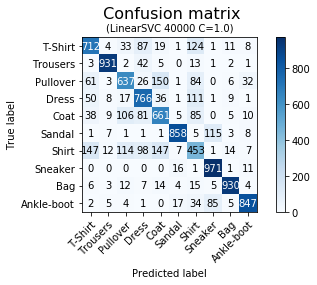

Test accuracy:  0.7766 

              precision    recall  f1-score   support

           0       0.70      0.71      0.70      1000
           1       0.95      0.93      0.94      1000
           2       0.69      0.64      0.66      1000
           3       0.69      0.77      0.73      1000
           4       0.64      0.66      0.65      1000
           5       0.94      0.86      0.90      1000
           6       0.49      0.45      0.47      1000
           7       0.82      0.97      0.89      1000
           8       0.94      0.93      0.94      1000
           9       0.91      0.85      0.88      1000

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000



C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


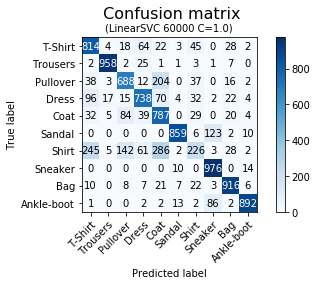

Test accuracy:  0.7854 

              precision    recall  f1-score   support

           0       0.66      0.81      0.73      1000
           1       0.97      0.96      0.96      1000
           2       0.72      0.69      0.70      1000
           3       0.78      0.74      0.76      1000
           4       0.56      0.79      0.66      1000
           5       0.96      0.86      0.90      1000
           6       0.56      0.23      0.32      1000
           7       0.82      0.98      0.89      1000
           8       0.88      0.92      0.90      1000
           9       0.95      0.89      0.92      1000

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.77     10000
weighted avg       0.79      0.79      0.77     10000



In [74]:
############################################################################
##################  LinearSVC, hinge, mit StandardScaler ohne std, ohne PCA ########
############################################################################

#######  seed 1 ##########

train_LinearSVC_scaled(X_tr_500, X_test_vgg16, y_tr_500, y_test_vgg16, 1, '500',1.0,
               "SVM_Modelle_FM/VGG16_default/LinearSVC/Neue Mengen/", "seed_1_random_A_with_scaler_without_std", "VGG16.pkl")
train_LinearSVC_scaled(X_tr_1000, X_test_vgg16, y_tr_1000, y_test_vgg16, 1, '1000',1.0,
               "SVM_Modelle_FM/VGG16_default/LinearSVC/Neue Mengen/", "seed_1_random_A_with_scaler_without_std", "VGG16.pkl")
train_LinearSVC_scaled(X_tr_2000, X_test_vgg16, y_tr_2000, y_test_vgg16, 1, '2000',1.0,
               "SVM_Modelle_FM/VGG16_default/LinearSVC/Neue Mengen/", "seed_1_random_A_with_scaler_without_std", "VGG16.pkl")
train_LinearSVC_scaled(X_tr_5000, X_test_vgg16, y_tr_5000, y_test_vgg16, 1, '5000',1.0,
               "SVM_Modelle_FM/VGG16_default/LinearSVC/Neue Mengen/", "seed_1_random_A_with_scaler_without_std", "VGG16.pkl")
train_LinearSVC_scaled(X_tr_10000, X_test_vgg16, y_tr_10000, y_test_vgg16, 1, '10000',1.0,
               "SVM_Modelle_FM/VGG16_default/LinearSVC/Neue Mengen/", "seed_1_random_A_with_scaler_without_std", "VGG16.pkl")
train_LinearSVC_scaled(X_tr_20000, X_test_vgg16, y_tr_20000, y_test_vgg16, 1, '20000',1.0,
               "SVM_Modelle_FM/VGG16_default/LinearSVC/Neue Mengen/", "seed_1_random_A_with_scaler_without_std", "VGG16.pkl")
train_LinearSVC_scaled(X_tr_40000, X_test_vgg16, y_tr_40000, y_test_vgg16, 1, '40000',1.0,
               "SVM_Modelle_FM/VGG16_default/LinearSVC/Neue Mengen/", "seed_1_random_A_with_scaler_without_std", "VGG16.pkl")
train_LinearSVC_scaled(X_train_vgg16, X_test_vgg16, y_train_vgg16, y_test_vgg16, 1, '60000',1.0,
               "SVM_Modelle_FM/VGG16_default/LinearSVC/Neue Mengen/", "seed_1_random_A_with_scaler_without_std", "VGG16.pkl")

In [78]:
X_tr_500.shape

(500, 512)

In [79]:
'''
GridSearchCV LinearSVC ohne StandardScaler, ohne PCA     1. Durchlauf
speichern
'''

print("GridSearch LinearSVC 500 1. Durchlauf")
clf_500_LinearSVC, time_500 = tuning_hyper_params(X_tr_500, y_tr_500, X_test_vgg16, y_test_vgg16, 
                                        'LinearSVC',10, 0, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_500_LinearSVC, "SVM_Modelle_FM/VGG16_opt/LinearSVC/Neue Mengen/500/seed_1_random_A_without_scaler/GridSearch_1DL.pkl")
save_as_csv(time_500, "SVM_Modelle_FM/VGG16_opt/LinearSVC/Neue Mengen/500/seed_1_random_A_without_scaler/", 'Suchzeiten_GridSearch_1_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 1000 1. Durchlauf")
clf_1000_LinearSVC, time_1000 = tuning_hyper_params(X_tr_1000, y_tr_1000, X_test_vgg16, y_test_vgg16, 
                                        'LinearSVC',10, 0, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_1000_LinearSVC, "SVM_Modelle_FM/VGG16_opt/LinearSVC/Neue Mengen/1000/seed_1_random_A_without_scaler/GridSearch_1DL.pkl")
save_as_csv(time_1000, "SVM_Modelle_FM/VGG16_opt/LinearSVC/Neue Mengen/1000/seed_1_random_A_without_scaler/", 'Suchzeiten_GridSearch_1_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 2000 1. Durchlauf")
clf_2000_LinearSVC, time_2000 = tuning_hyper_params(X_tr_2000, y_tr_2000, X_test_vgg16, y_test_vgg16, 
                                        'LinearSVC',10, 0, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_2000_LinearSVC, "SVM_Modelle_FM/VGG16_opt/LinearSVC/Neue Mengen/2000/seed_1_random_A_without_scaler/GridSearch_1DL.pkl")
save_as_csv(time_2000, "SVM_Modelle_FM/VGG16_opt/LinearSVC/Neue Mengen/2000/seed_1_random_A_without_scaler/", 'Suchzeiten_GridSearch_1_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 5000 1. Durchlauf")
clf_5000_LinearSVC, time_5000 = tuning_hyper_params(X_tr_5000, y_tr_5000, X_test_vgg16, y_test_vgg16, 
                                        'LinearSVC',5, 0, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_5000_LinearSVC, "SVM_Modelle_FM/VGG16_opt/LinearSVC/Neue Mengen/5000/seed_1_random_A_without_scaler/GridSearch_1DL.pkl")
save_as_csv(time_5000, "SVM_Modelle_FM/VGG16_opt/LinearSVC/Neue Mengen/5000/seed_1_random_A_without_scaler/", 'Suchzeiten_GridSearch_1_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 10000 1. Durchlauf")
clf_10000_LinearSVC, time_10000 = tuning_hyper_params(X_tr_10000, y_tr_10000, X_test_vgg16, y_test_vgg16, 
                                        'LinearSVC',5, 0, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_10000_LinearSVC, "SVM_Modelle_FM/VGG16_opt/LinearSVC/Neue Mengen/10000/seed_1_random_A_without_scaler/GridSearch_1DL.pkl")
save_as_csv(time_10000, "SVM_Modelle_FM/VGG16_opt/LinearSVC/Neue Mengen/10000/seed_1_random_A_without_scaler/", 'Suchzeiten_GridSearch_1_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 20000 1. Durchlauf")
clf_20000_LinearSVC, time_20000 = tuning_hyper_params(X_tr_20000, y_tr_20000, X_test_vgg16, y_test_vgg16, 
                                        'LinearSVC',3, 0, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_20000_LinearSVC, "SVM_Modelle_FM/VGG16_opt/LinearSVC/Neue Mengen/20000/seed_1_random_A_without_scaler/GridSearch_1DL.pkl")
save_as_csv(time_20000, "SVM_Modelle_FM/VGG16_opt/LinearSVC/Neue Mengen/20000/seed_1_random_A_without_scaler/", 'Suchzeiten_GridSearch_1_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 40000 1. Durchlauf")
clf_40000_LinearSVC, time_40000 = tuning_hyper_params(X_tr_40000, y_tr_40000, X_test_vgg16, y_test_vgg16, 
                                        'LinearSVC',3, 0, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_40000_LinearSVC, "SVM_Modelle_FM/VGG16_opt/LinearSVC/Neue Mengen/40000/seed_1_random_A_without_scaler/GridSearch_1DL.pkl")
save_as_csv(time_40000, "SVM_Modelle_FM/VGG16_opt/LinearSVC/Neue Mengen/40000/seed_1_random_A_without_scaler/", 'Suchzeiten_GridSearch_1_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 60000 1. Durchlauf")
clf_60000_LinearSVC, time_60000 = tuning_hyper_params(X_train_vgg16, y_train_vgg16, X_test_vgg16, y_test_vgg16, 
                                        'LinearSVC',3, 0, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_60000_LinearSVC, "SVM_Modelle_FM/VGG16_opt/LinearSVC/Neue Mengen/60000/seed_1_random_A_without_scaler/GridSearch_1DL.pkl")
save_as_csv(time_60000, "SVM_Modelle_FM/VGG16_opt/LinearSVC/Neue Mengen/60000/seed_1_random_A_without_scaler/", 'Suchzeiten_GridSearch_1_DL.csv')


GridSearch LinearSVC 500 1. Durchlauf

 C_range: [1.53e-05 6.10e-05 2.44e-04 9.77e-04 3.91e-03 1.56e-02 6.25e-02 2.50e-01
 1.00e+00 4.00e+00 1.60e+01 6.40e+01 2.56e+02 1.02e+03]

 Bester Score:  0.746

 Besten Parameter:  {'svm__C': 1.52587890625e-05}
Bester Estimator score:  0.7565
Precision-Score: 0.764540 (0.063477) mit Parameter: {'svm__C': 1.52587890625e-05}
Precision-Score: 0.765313 (0.072259) mit Parameter: {'svm__C': 6.103515625e-05}
Precision-Score: 0.752135 (0.068522) mit Parameter: {'svm__C': 0.000244140625}
Precision-Score: 0.728706 (0.059685) mit Parameter: {'svm__C': 0.0009765625}
Precision-Score: 0.728706 (0.059685) mit Parameter: {'svm__C': 0.00390625}
Precision-Score: 0.728706 (0.059685) mit Parameter: {'svm__C': 0.015625}
Precision-Score: 0.728706 (0.059685) mit Parameter: {'svm__C': 0.0625}
Precision-Score: 0.728706 (0.059685) mit Parameter: {'svm__C': 0.25}
Precision-Score: 0.728706 (0.059685) mit Parameter: {'svm__C': 1.0}
Precision-Score: 0.728706 (0.059685) mit P

C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



 C_range: [1.53e-05 6.10e-05 2.44e-04 9.77e-04 3.91e-03 1.56e-02 6.25e-02 2.50e-01
 1.00e+00 4.00e+00 1.60e+01 6.40e+01 2.56e+02 1.02e+03]

 Bester Score:  0.7905

 Besten Parameter:  {'svm__C': 6.103515625e-05}
Bester Estimator score:  0.801
Precision-Score: 0.793966 (0.016850) mit Parameter: {'svm__C': 1.52587890625e-05}
Precision-Score: 0.792645 (0.016396) mit Parameter: {'svm__C': 6.103515625e-05}
Precision-Score: 0.783258 (0.021484) mit Parameter: {'svm__C': 0.000244140625}
Precision-Score: 0.767416 (0.028647) mit Parameter: {'svm__C': 0.0009765625}
Precision-Score: 0.747147 (0.023221) mit Parameter: {'svm__C': 0.00390625}
Precision-Score: 0.736627 (0.020951) mit Parameter: {'svm__C': 0.015625}
Precision-Score: 0.738824 (0.018456) mit Parameter: {'svm__C': 0.0625}
Precision-Score: 0.738824 (0.018456) mit Parameter: {'svm__C': 0.25}
Precision-Score: 0.738824 (0.018456) mit Parameter: {'svm__C': 1.0}
Precision-Score: 0.738824 (0.018456) mit Parameter: {'svm__C': 4.0}
Precision-Scor

C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



 C_range: [1.53e-05 6.10e-05 2.44e-04 9.77e-04 3.91e-03 1.56e-02 6.25e-02 2.50e-01
 1.00e+00 4.00e+00 1.60e+01 6.40e+01 2.56e+02 1.02e+03]

 Bester Score:  0.8188

 Besten Parameter:  {'svm__C': 6.103515625e-05}
Bester Estimator score:  0.8209
Precision-Score: 0.811538 (0.009455) mit Parameter: {'svm__C': 1.52587890625e-05}
Precision-Score: 0.818143 (0.005001) mit Parameter: {'svm__C': 6.103515625e-05}
Precision-Score: 0.817405 (0.008101) mit Parameter: {'svm__C': 0.000244140625}
Precision-Score: 0.800883 (0.008233) mit Parameter: {'svm__C': 0.0009765625}
Precision-Score: 0.788578 (0.009151) mit Parameter: {'svm__C': 0.00390625}
Precision-Score: 0.774527 (0.014412) mit Parameter: {'svm__C': 0.015625}
Precision-Score: 0.767301 (0.012984) mit Parameter: {'svm__C': 0.0625}
Precision-Score: 0.767301 (0.012984) mit Parameter: {'svm__C': 0.25}
Precision-Score: 0.767301 (0.012984) mit Parameter: {'svm__C': 1.0}
Precision-Score: 0.767301 (0.012984) mit Parameter: {'svm__C': 4.0}
Precision-Sco

C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



 C_range: [1.53e-05 6.10e-05 2.44e-04 9.77e-04 3.91e-03 1.56e-02 6.25e-02 2.50e-01
 1.00e+00 4.00e+00 1.60e+01 6.40e+01 2.56e+02 1.02e+03]

 Bester Score:  0.8321

 Besten Parameter:  {'svm__C': 6.103515625e-05}
Bester Estimator score:  0.8341
Precision-Score: 0.823291 (0.004623) mit Parameter: {'svm__C': 1.52587890625e-05}
Precision-Score: 0.829606 (0.009186) mit Parameter: {'svm__C': 6.103515625e-05}
Precision-Score: 0.829137 (0.008268) mit Parameter: {'svm__C': 0.000244140625}
Precision-Score: 0.821304 (0.007978) mit Parameter: {'svm__C': 0.0009765625}
Precision-Score: 0.812591 (0.005306) mit Parameter: {'svm__C': 0.00390625}
Precision-Score: 0.802690 (0.010288) mit Parameter: {'svm__C': 0.015625}
Precision-Score: 0.784245 (0.021238) mit Parameter: {'svm__C': 0.0625}
Precision-Score: 0.784331 (0.021386) mit Parameter: {'svm__C': 0.25}
Precision-Score: 0.784331 (0.021386) mit Parameter: {'svm__C': 1.0}
Precision-Score: 0.784331 (0.021386) mit Parameter: {'svm__C': 4.0}
Precision-Sco

C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



 C_range: [1.53e-05 6.10e-05 2.44e-04 9.77e-04 3.91e-03 1.56e-02 6.25e-02 2.50e-01
 1.00e+00 4.00e+00 1.60e+01 6.40e+01 2.56e+02 1.02e+03]

 Bester Score:  0.83725

 Besten Parameter:  {'svm__C': 0.000244140625}
Bester Estimator score:  0.8398
Precision-Score: 0.824445 (0.001454) mit Parameter: {'svm__C': 1.52587890625e-05}
Precision-Score: 0.831461 (0.001092) mit Parameter: {'svm__C': 6.103515625e-05}
Precision-Score: 0.834884 (0.001553) mit Parameter: {'svm__C': 0.000244140625}
Precision-Score: 0.830185 (0.000469) mit Parameter: {'svm__C': 0.0009765625}
Precision-Score: 0.825176 (0.001261) mit Parameter: {'svm__C': 0.00390625}
Precision-Score: 0.809140 (0.002898) mit Parameter: {'svm__C': 0.015625}
Precision-Score: 0.795677 (0.005632) mit Parameter: {'svm__C': 0.0625}
Precision-Score: 0.791696 (0.001971) mit Parameter: {'svm__C': 0.25}
Precision-Score: 0.791696 (0.001971) mit Parameter: {'svm__C': 1.0}
Precision-Score: 0.791696 (0.001971) mit Parameter: {'svm__C': 4.0}
Precision-Sco

C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



 C_range: [1.53e-05 6.10e-05 2.44e-04 9.77e-04 3.91e-03 1.56e-02 6.25e-02 2.50e-01
 1.00e+00 4.00e+00 1.60e+01 6.40e+01 2.56e+02 1.02e+03]

 Bester Score:  0.8438

 Besten Parameter:  {'svm__C': 0.000244140625}
Bester Estimator score:  0.8435
Precision-Score: 0.833041 (0.003213) mit Parameter: {'svm__C': 1.52587890625e-05}
Precision-Score: 0.838195 (0.003319) mit Parameter: {'svm__C': 6.103515625e-05}
Precision-Score: 0.841754 (0.004729) mit Parameter: {'svm__C': 0.000244140625}
Precision-Score: 0.841680 (0.004629) mit Parameter: {'svm__C': 0.0009765625}
Precision-Score: 0.837377 (0.004437) mit Parameter: {'svm__C': 0.00390625}
Precision-Score: 0.825438 (0.001286) mit Parameter: {'svm__C': 0.015625}
Precision-Score: 0.800932 (0.006084) mit Parameter: {'svm__C': 0.0625}
Precision-Score: 0.801069 (0.010853) mit Parameter: {'svm__C': 0.25}
Precision-Score: 0.801069 (0.010853) mit Parameter: {'svm__C': 1.0}
Precision-Score: 0.801069 (0.010853) mit Parameter: {'svm__C': 4.0}
Precision-Scor

C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



 C_range: [1.53e-05 6.10e-05 2.44e-04 9.77e-04 3.91e-03 1.56e-02 6.25e-02 2.50e-01
 1.00e+00 4.00e+00 1.60e+01 6.40e+01 2.56e+02 1.02e+03]

 Bester Score:  0.8463

 Besten Parameter:  {'svm__C': 0.000244140625}
Bester Estimator score:  0.8457
Precision-Score: 0.837147 (0.002111) mit Parameter: {'svm__C': 1.52587890625e-05}
Precision-Score: 0.842780 (0.002065) mit Parameter: {'svm__C': 6.103515625e-05}
Precision-Score: 0.844389 (0.001957) mit Parameter: {'svm__C': 0.000244140625}
Precision-Score: 0.843856 (0.001382) mit Parameter: {'svm__C': 0.0009765625}
Precision-Score: 0.841851 (0.002526) mit Parameter: {'svm__C': 0.00390625}
Precision-Score: 0.828495 (0.002634) mit Parameter: {'svm__C': 0.015625}
Precision-Score: 0.810386 (0.004066) mit Parameter: {'svm__C': 0.0625}
Precision-Score: 0.798483 (0.008367) mit Parameter: {'svm__C': 0.25}
Precision-Score: 0.798483 (0.008367) mit Parameter: {'svm__C': 1.0}
Precision-Score: 0.798483 (0.008367) mit Parameter: {'svm__C': 4.0}
Precision-Scor

In [80]:
'''
GridSearchCV LinearSVC ohne StandardScaler, ohne PCA     2. Durchlauf
speichern
'''

print("GridSearch LinearSVC 500 2. Durchlauf")
clf_500_LinearSVC, time_500 = tuning_hyper_params(X_tr_500, y_tr_500, X_test_vgg16, y_test_vgg16, 
                                        'LinearSVC',10, 0, 0, get_finer_range(1.52587890625e-05),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_500_LinearSVC, "SVM_Modelle_FM/VGG16_opt/LinearSVC/Neue Mengen/500/seed_1_random_A_without_scaler/GridSearch_2DL.pkl")
save_as_csv(time_500, "SVM_Modelle_FM/VGG16_opt/LinearSVC/Neue Mengen/500/seed_1_random_A_without_scaler/", 'Suchzeiten_GridSearch_2_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 1000 2. Durchlauf")
clf_1000_LinearSVC, time_1000 = tuning_hyper_params(X_tr_1000, y_tr_1000, X_test_vgg16, y_test_vgg16, 
                                        'LinearSVC',10, 0, 0, get_finer_range(6.103515625e-05),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_1000_LinearSVC, "SVM_Modelle_FM/VGG16_opt/LinearSVC/Neue Mengen/1000/seed_1_random_A_without_scaler/GridSearch_2DL.pkl")
save_as_csv(time_1000, "SVM_Modelle_FM/VGG16_opt/LinearSVC/Neue Mengen/1000/seed_1_random_A_without_scaler/", 'Suchzeiten_GridSearch_2_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 2000 2. Durchlauf")
clf_2000_LinearSVC, time_2000 = tuning_hyper_params(X_tr_2000, y_tr_2000, X_test_vgg16, y_test_vgg16, 
                                        'LinearSVC',10, 0, 0, get_finer_range(6.103515625e-05),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_2000_LinearSVC, "SVM_Modelle_FM/VGG16_opt/LinearSVC/Neue Mengen/2000/seed_1_random_A_without_scaler/GridSearch_2DL.pkl")
save_as_csv(time_2000, "SVM_Modelle_FM/VGG16_opt/LinearSVC/Neue Mengen/2000/seed_1_random_A_without_scaler/", 'Suchzeiten_GridSearch_2_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 5000 2. Durchlauf")
clf_5000_LinearSVC, time_5000 = tuning_hyper_params(X_tr_5000, y_tr_5000, X_test_vgg16, y_test_vgg16, 
                                        'LinearSVC',5, 0, 0, get_finer_range(6.103515625e-05),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_5000_LinearSVC, "SVM_Modelle_FM/VGG16_opt/LinearSVC/Neue Mengen/5000/seed_1_random_A_without_scaler/GridSearch_2DL.pkl")
save_as_csv(time_5000, "SVM_Modelle_FM/VGG16_opt/LinearSVC/Neue Mengen/5000/seed_1_random_A_without_scaler/", 'Suchzeiten_GridSearch_2_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 10000 2. Durchlauf")
clf_10000_LinearSVC, time_10000 = tuning_hyper_params(X_tr_10000, y_tr_10000, X_test_vgg16, y_test_vgg16, 
                                        'LinearSVC',5, 0, 0, get_finer_range(6.103515625e-05),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_10000_LinearSVC, "SVM_Modelle_FM/VGG16_opt/LinearSVC/Neue Mengen/10000/seed_1_random_A_without_scaler/GridSearch_2DL.pkl")
save_as_csv(time_10000, "SVM_Modelle_FM/VGG16_opt/LinearSVC/Neue Mengen/10000/seed_1_random_A_without_scaler/", 'Suchzeiten_GridSearch_2_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 20000 2. Durchlauf")
clf_20000_LinearSVC, time_20000 = tuning_hyper_params(X_tr_20000, y_tr_20000, X_test_vgg16, y_test_vgg16, 
                                        'LinearSVC',3, 0, 0, get_finer_range(0.000244140625),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_20000_LinearSVC, "SVM_Modelle_FM/VGG16_opt/LinearSVC/Neue Mengen/20000/seed_1_random_A_without_scaler/GridSearch_2DL.pkl")
save_as_csv(time_20000, "SVM_Modelle_FM/VGG16_opt/LinearSVC/Neue Mengen/20000/seed_1_random_A_without_scaler/", 'Suchzeiten_GridSearch_2_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 40000 2. Durchlauf")
clf_40000_LinearSVC, time_40000 = tuning_hyper_params(X_tr_40000, y_tr_40000, X_test_vgg16, y_test_vgg16, 
                                        'LinearSVC',3, 0, 0, get_finer_range(0.000244140625),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_40000_LinearSVC, "SVM_Modelle_FM/VGG16_opt/LinearSVC/Neue Mengen/40000/seed_1_random_A_without_scaler/GridSearch_2DL.pkl")
save_as_csv(time_40000, "SVM_Modelle_FM/VGG16_opt/LinearSVC/Neue Mengen/40000/seed_1_random_A_without_scaler/", 'Suchzeiten_GridSearch_2_DL.csv')

print("*********************************************************************")
print("GridSearch LinearSVC 60000 2. Durchlauf")
clf_60000_LinearSVC, time_60000 = tuning_hyper_params(X_train_vgg16, y_train_vgg16, X_test_vgg16, y_test_vgg16, 
                                        'LinearSVC',3, 0, 0, get_finer_range(0.000244140625),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_60000_LinearSVC, "SVM_Modelle_FM/VGG16_opt/LinearSVC/Neue Mengen/60000/seed_1_random_A_without_scaler/GridSearch_2DL.pkl")
save_as_csv(time_60000, "SVM_Modelle_FM/VGG16_opt/LinearSVC/Neue Mengen/60000/seed_1_random_A_without_scaler/", 'Suchzeiten_GridSearch_2_DL.csv')


GridSearch LinearSVC 500 2. Durchlauf

 C_range: [3.81e-06 4.54e-06 5.39e-06 6.42e-06 7.63e-06 9.07e-06 1.08e-05 1.28e-05
 1.53e-05 1.81e-05 2.16e-05 2.57e-05 3.05e-05 3.63e-05 4.32e-05 5.13e-05
 6.10e-05]

 Bester Score:  0.754

 Besten Parameter:  {'svm__C': 3.62917210389014e-05}
Bester Estimator score:  0.7658
Precision-Score: 0.738806 (0.078190) mit Parameter: {'svm__C': 3.814697265625e-06}
Precision-Score: 0.728198 (0.085874) mit Parameter: {'svm__C': 4.536465129862675e-06}
Precision-Score: 0.738413 (0.082514) mit Parameter: {'svm__C': 5.3947966093944364e-06}
Precision-Score: 0.751940 (0.075441) mit Parameter: {'svm__C': 6.4155305118844185e-06}
Precision-Score: 0.754754 (0.067175) mit Parameter: {'svm__C': 7.62939453125e-06}
Precision-Score: 0.759274 (0.067416) mit Parameter: {'svm__C': 9.07293025972535e-06}
Precision-Score: 0.759898 (0.067001) mit Parameter: {'svm__C': 1.0789593218788873e-05}
Precision-Score: 0.756798 (0.075772) mit Parameter: {'svm__C': 1.2831061023768837e-05}
P


 C_range: [1.53e-05 1.81e-05 2.16e-05 2.57e-05 3.05e-05 3.63e-05 4.32e-05 5.13e-05
 6.10e-05 7.26e-05 8.63e-05 1.03e-04 1.22e-04 1.45e-04 1.73e-04 2.05e-04
 2.44e-04]

 Bester Score:  0.794

 Besten Parameter:  {'svm__C': 2.5662122047537674e-05}
Bester Estimator score:  0.798
Precision-Score: 0.793966 (0.016850) mit Parameter: {'svm__C': 1.52587890625e-05}
Precision-Score: 0.796304 (0.016718) mit Parameter: {'svm__C': 1.81458605194507e-05}
Precision-Score: 0.796567 (0.018774) mit Parameter: {'svm__C': 2.1579186437577746e-05}
Precision-Score: 0.796044 (0.017266) mit Parameter: {'svm__C': 2.5662122047537674e-05}
Precision-Score: 0.796848 (0.017701) mit Parameter: {'svm__C': 3.0517578125e-05}
Precision-Score: 0.793065 (0.016440) mit Parameter: {'svm__C': 3.62917210389014e-05}
Precision-Score: 0.792462 (0.013934) mit Parameter: {'svm__C': 4.315837287515549e-05}
Precision-Score: 0.790851 (0.019764) mit Parameter: {'svm__C': 5.132424409507535e-05}
Precision-Score: 0.792645 (0.016396) mit Pa

C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



 C_range: [1.53e-05 1.81e-05 2.16e-05 2.57e-05 3.05e-05 3.63e-05 4.32e-05 5.13e-05
 6.10e-05 7.26e-05 8.63e-05 1.03e-04 1.22e-04 1.45e-04 1.73e-04 2.05e-04
 2.44e-04]

 Bester Score:  0.8208

 Besten Parameter:  {'svm__C': 0.0001220703125}
Bester Estimator score:  0.8195
Precision-Score: 0.811538 (0.009455) mit Parameter: {'svm__C': 1.52587890625e-05}
Precision-Score: 0.812764 (0.007936) mit Parameter: {'svm__C': 1.81458605194507e-05}
Precision-Score: 0.813401 (0.007427) mit Parameter: {'svm__C': 2.1579186437577746e-05}
Precision-Score: 0.815617 (0.007986) mit Parameter: {'svm__C': 2.5662122047537674e-05}
Precision-Score: 0.816383 (0.007999) mit Parameter: {'svm__C': 3.0517578125e-05}
Precision-Score: 0.817603 (0.006837) mit Parameter: {'svm__C': 3.62917210389014e-05}
Precision-Score: 0.817340 (0.008205) mit Parameter: {'svm__C': 4.315837287515549e-05}
Precision-Score: 0.817677 (0.006478) mit Parameter: {'svm__C': 5.132424409507535e-05}
Precision-Score: 0.818143 (0.005001) mit Paramet

C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



 C_range: [1.53e-05 1.81e-05 2.16e-05 2.57e-05 3.05e-05 3.63e-05 4.32e-05 5.13e-05
 6.10e-05 7.26e-05 8.63e-05 1.03e-04 1.22e-04 1.45e-04 1.73e-04 2.05e-04
 2.44e-04]

 Bester Score:  0.8333

 Besten Parameter:  {'svm__C': 8.631674575031098e-05}
Bester Estimator score:  0.8332
Precision-Score: 0.823291 (0.004623) mit Parameter: {'svm__C': 1.52587890625e-05}
Precision-Score: 0.824839 (0.006194) mit Parameter: {'svm__C': 1.81458605194507e-05}
Precision-Score: 0.825438 (0.006092) mit Parameter: {'svm__C': 2.1579186437577746e-05}
Precision-Score: 0.827093 (0.005163) mit Parameter: {'svm__C': 2.5662122047537674e-05}
Precision-Score: 0.828430 (0.006223) mit Parameter: {'svm__C': 3.0517578125e-05}
Precision-Score: 0.828280 (0.007436) mit Parameter: {'svm__C': 3.62917210389014e-05}
Precision-Score: 0.828389 (0.008811) mit Parameter: {'svm__C': 4.315837287515549e-05}
Precision-Score: 0.829369 (0.009366) mit Parameter: {'svm__C': 5.132424409507535e-05}
Precision-Score: 0.829606 (0.009186) mit P

C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



 C_range: [6.10e-05 7.26e-05 8.63e-05 1.03e-04 1.22e-04 1.45e-04 1.73e-04 2.05e-04
 2.44e-04 2.90e-04 3.45e-04 4.11e-04 4.88e-04 5.81e-04 6.91e-04 8.21e-04
 9.77e-04]

 Bester Score:  0.83725

 Besten Parameter:  {'svm__C': 0.000244140625}
Bester Estimator score:  0.8398
Precision-Score: 0.831461 (0.001092) mit Parameter: {'svm__C': 6.103515625e-05}
Precision-Score: 0.831522 (0.000779) mit Parameter: {'svm__C': 7.25834420778028e-05}
Precision-Score: 0.831732 (0.001061) mit Parameter: {'svm__C': 8.631674575031098e-05}
Precision-Score: 0.832747 (0.000633) mit Parameter: {'svm__C': 0.0001026484881901507}
Precision-Score: 0.832864 (0.001431) mit Parameter: {'svm__C': 0.0001220703125}
Precision-Score: 0.832932 (0.001309) mit Parameter: {'svm__C': 0.0001451668841556056}
Precision-Score: 0.833579 (0.002086) mit Parameter: {'svm__C': 0.00017263349150062197}
Precision-Score: 0.833844 (0.001980) mit Parameter: {'svm__C': 0.0002052969763803014}
Precision-Score: 0.834884 (0.001553) mit Parameter:

C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



 C_range: [6.10e-05 7.26e-05 8.63e-05 1.03e-04 1.22e-04 1.45e-04 1.73e-04 2.05e-04
 2.44e-04 2.90e-04 3.45e-04 4.11e-04 4.88e-04 5.81e-04 6.91e-04 8.21e-04
 9.77e-04]

 Bester Score:  0.8444

 Besten Parameter:  {'svm__C': 0.00048828125}
Bester Estimator score:  0.8435
Precision-Score: 0.838195 (0.003319) mit Parameter: {'svm__C': 6.103515625e-05}
Precision-Score: 0.838654 (0.003409) mit Parameter: {'svm__C': 7.25834420778028e-05}
Precision-Score: 0.838526 (0.003332) mit Parameter: {'svm__C': 8.631674575031098e-05}
Precision-Score: 0.839446 (0.003696) mit Parameter: {'svm__C': 0.0001026484881901507}
Precision-Score: 0.839959 (0.003538) mit Parameter: {'svm__C': 0.0001220703125}
Precision-Score: 0.840817 (0.004103) mit Parameter: {'svm__C': 0.0001451668841556056}
Precision-Score: 0.841653 (0.004242) mit Parameter: {'svm__C': 0.00017263349150062197}
Precision-Score: 0.841556 (0.004478) mit Parameter: {'svm__C': 0.0002052969763803014}
Precision-Score: 0.841754 (0.004729) mit Parameter: {

C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



 C_range: [6.10e-05 7.26e-05 8.63e-05 1.03e-04 1.22e-04 1.45e-04 1.73e-04 2.05e-04
 2.44e-04 2.90e-04 3.45e-04 4.11e-04 4.88e-04 5.81e-04 6.91e-04 8.21e-04
 9.77e-04]

 Bester Score:  0.8465166666666667

 Besten Parameter:  {'svm__C': 0.0002903337683112112}
Bester Estimator score:  0.8462
Precision-Score: 0.842780 (0.002065) mit Parameter: {'svm__C': 6.103515625e-05}
Precision-Score: 0.843192 (0.002068) mit Parameter: {'svm__C': 7.25834420778028e-05}
Precision-Score: 0.843189 (0.002009) mit Parameter: {'svm__C': 8.631674575031098e-05}
Precision-Score: 0.843882 (0.001919) mit Parameter: {'svm__C': 0.0001026484881901507}
Precision-Score: 0.844388 (0.001553) mit Parameter: {'svm__C': 0.0001220703125}
Precision-Score: 0.844135 (0.001823) mit Parameter: {'svm__C': 0.0001451668841556056}
Precision-Score: 0.844346 (0.002121) mit Parameter: {'svm__C': 0.00017263349150062197}
Precision-Score: 0.844289 (0.002143) mit Parameter: {'svm__C': 0.0002052969763803014}
Precision-Score: 0.844389 (0.0019

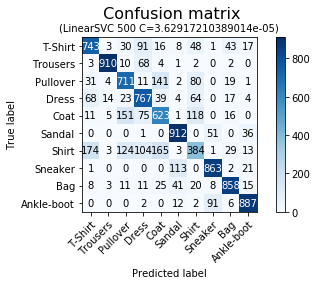

Test accuracy:  0.7658 

              precision    recall  f1-score   support

           0       0.72      0.74      0.73      1000
           1       0.97      0.91      0.94      1000
           2       0.67      0.71      0.69      1000
           3       0.68      0.77      0.72      1000
           4       0.62      0.62      0.62      1000
           5       0.83      0.91      0.87      1000
           6       0.53      0.38      0.45      1000
           7       0.85      0.86      0.86      1000
           8       0.86      0.86      0.86      1000
           9       0.89      0.89      0.89      1000

    accuracy                           0.77     10000
   macro avg       0.76      0.77      0.76     10000
weighted avg       0.76      0.77      0.76     10000



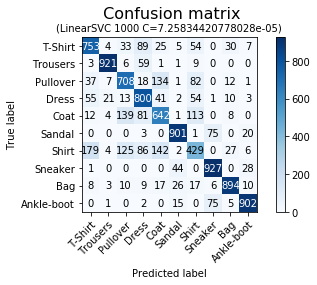

Test accuracy:  0.7877 

              precision    recall  f1-score   support

           0       0.72      0.75      0.74      1000
           1       0.95      0.92      0.94      1000
           2       0.68      0.71      0.70      1000
           3       0.70      0.80      0.75      1000
           4       0.64      0.64      0.64      1000
           5       0.90      0.90      0.90      1000
           6       0.57      0.43      0.49      1000
           7       0.86      0.93      0.89      1000
           8       0.91      0.89      0.90      1000
           9       0.92      0.90      0.91      1000

    accuracy                           0.79     10000
   macro avg       0.78      0.79      0.78     10000
weighted avg       0.78      0.79      0.78     10000



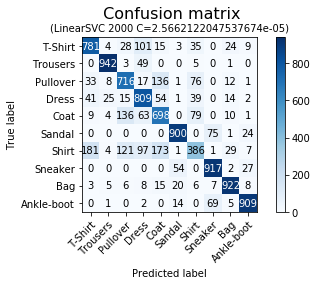

Test accuracy:  0.798 

              precision    recall  f1-score   support

           0       0.75      0.78      0.76      1000
           1       0.95      0.94      0.95      1000
           2       0.70      0.72      0.71      1000
           3       0.71      0.81      0.75      1000
           4       0.64      0.70      0.67      1000
           5       0.91      0.90      0.90      1000
           6       0.62      0.39      0.47      1000
           7       0.86      0.92      0.89      1000
           8       0.90      0.92      0.91      1000
           9       0.92      0.91      0.91      1000

    accuracy                           0.80     10000
   macro avg       0.79      0.80      0.79     10000
weighted avg       0.79      0.80      0.79     10000



C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


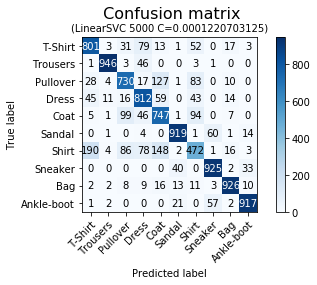

Test accuracy:  0.8195 

              precision    recall  f1-score   support

           0       0.75      0.80      0.77      1000
           1       0.97      0.95      0.96      1000
           2       0.75      0.73      0.74      1000
           3       0.74      0.81      0.78      1000
           4       0.67      0.75      0.71      1000
           5       0.92      0.92      0.92      1000
           6       0.62      0.47      0.54      1000
           7       0.88      0.93      0.90      1000
           8       0.93      0.93      0.93      1000
           9       0.94      0.92      0.93      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


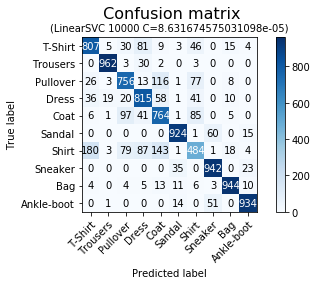

Test accuracy:  0.8332 

              precision    recall  f1-score   support

           0       0.76      0.81      0.78      1000
           1       0.97      0.96      0.96      1000
           2       0.76      0.76      0.76      1000
           3       0.76      0.81      0.79      1000
           4       0.69      0.76      0.73      1000
           5       0.93      0.92      0.93      1000
           6       0.65      0.48      0.56      1000
           7       0.89      0.94      0.92      1000
           8       0.94      0.94      0.94      1000
           9       0.94      0.93      0.94      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


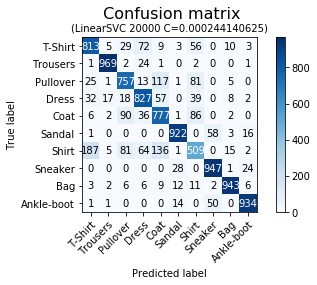

Test accuracy:  0.8398 

              precision    recall  f1-score   support

           0       0.76      0.81      0.79      1000
           1       0.97      0.97      0.97      1000
           2       0.77      0.76      0.76      1000
           3       0.79      0.83      0.81      1000
           4       0.70      0.78      0.74      1000
           5       0.94      0.92      0.93      1000
           6       0.65      0.51      0.57      1000
           7       0.90      0.95      0.92      1000
           8       0.96      0.94      0.95      1000
           9       0.95      0.93      0.94      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


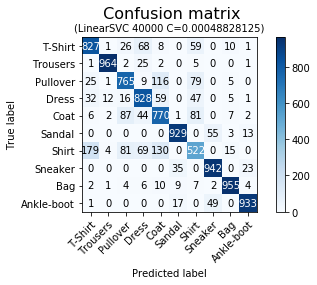

Test accuracy:  0.8435 

              precision    recall  f1-score   support

           0       0.77      0.83      0.80      1000
           1       0.98      0.96      0.97      1000
           2       0.78      0.77      0.77      1000
           3       0.79      0.83      0.81      1000
           4       0.70      0.77      0.74      1000
           5       0.94      0.93      0.93      1000
           6       0.65      0.52      0.58      1000
           7       0.90      0.94      0.92      1000
           8       0.95      0.95      0.95      1000
           9       0.95      0.93      0.94      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



C:\Users\Martins-Lapt\AppData\Local\conda\conda\envs\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


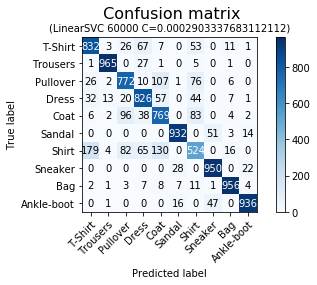

Test accuracy:  0.8462 

              precision    recall  f1-score   support

           0       0.77      0.83      0.80      1000
           1       0.97      0.96      0.97      1000
           2       0.77      0.77      0.77      1000
           3       0.79      0.83      0.81      1000
           4       0.71      0.77      0.74      1000
           5       0.95      0.93      0.94      1000
           6       0.66      0.52      0.58      1000
           7       0.91      0.95      0.93      1000
           8       0.95      0.96      0.95      1000
           9       0.96      0.94      0.95      1000

    accuracy                           0.85     10000
   macro avg       0.84      0.85      0.84     10000
weighted avg       0.84      0.85      0.84     10000



In [81]:
#######  seed 1, LinearSVC  mit optimierten C    trainieren     ##########

train_LinearSVC(X_tr_500, X_test_vgg16, y_tr_500, y_test_vgg16, 1, '500',3.62917210389014e-05,
               "SVM_Modelle_FM/VGG16_opt/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler", "VGG16.pkl")
train_LinearSVC(X_tr_1000, X_test_vgg16, y_tr_1000, y_test_vgg16, 1, '1000',7.25834420778028e-05,
               "SVM_Modelle_FM/VGG16_opt/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler", "VGG16.pkl")
train_LinearSVC(X_tr_2000, X_test_vgg16, y_tr_2000, y_test_vgg16, 1, '2000',2.5662122047537674e-05,
               "SVM_Modelle_FM/VGG16_opt/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler", "VGG16.pkl")
train_LinearSVC(X_tr_5000, X_test_vgg16, y_tr_5000, y_test_vgg16, 1, '5000',0.0001220703125,
               "SVM_Modelle_FM/VGG16_opt/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler", "VGG16.pkl")
train_LinearSVC(X_tr_10000, X_test_vgg16, y_tr_10000, y_test_vgg16, 1, '10000',8.631674575031098e-05,
               "SVM_Modelle_FM/VGG16_opt/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler", "VGG16.pkl")
train_LinearSVC(X_tr_20000, X_test_vgg16, y_tr_20000, y_test_vgg16, 1, '20000',0.000244140625,
               "SVM_Modelle_FM/VGG16_opt/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler", "VGG16.pkl")
train_LinearSVC(X_tr_40000, X_test_vgg16, y_tr_40000, y_test_vgg16, 1, '40000',0.00048828125,
               "SVM_Modelle_FM/VGG16_opt/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler", "VGG16.pkl")
train_LinearSVC(X_train_vgg16, X_test_vgg16, y_train_vgg16, y_test_vgg16, 1, '60000',0.0002903337683112112,
               "SVM_Modelle_FM/VGG16_opt/LinearSVC/Neue Mengen/", "seed_1_random_A_without_scaler", "VGG16.pkl")

In [ ]:
get_finer_range

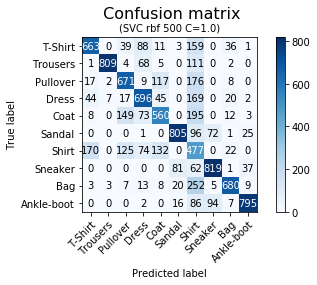

Test accuracy:  0.6975 

              precision    recall  f1-score   support

           0       0.73      0.66      0.70      1000
           1       0.99      0.81      0.89      1000
           2       0.66      0.67      0.67      1000
           3       0.68      0.70      0.69      1000
           4       0.64      0.56      0.60      1000
           5       0.87      0.81      0.84      1000
           6       0.27      0.48      0.34      1000
           7       0.83      0.82      0.82      1000
           8       0.86      0.68      0.76      1000
           9       0.91      0.80      0.85      1000

    accuracy                           0.70     10000
   macro avg       0.74      0.70      0.71     10000
weighted avg       0.74      0.70      0.71     10000



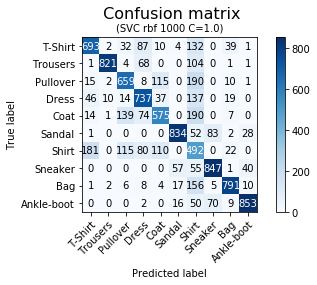

Test accuracy:  0.7302 

              precision    recall  f1-score   support

           0       0.73      0.69      0.71      1000
           1       0.98      0.82      0.89      1000
           2       0.68      0.66      0.67      1000
           3       0.69      0.74      0.71      1000
           4       0.68      0.57      0.62      1000
           5       0.90      0.83      0.87      1000
           6       0.32      0.49      0.38      1000
           7       0.84      0.85      0.84      1000
           8       0.88      0.79      0.83      1000
           9       0.91      0.85      0.88      1000

    accuracy                           0.73     10000
   macro avg       0.76      0.73      0.74     10000
weighted avg       0.76      0.73      0.74     10000



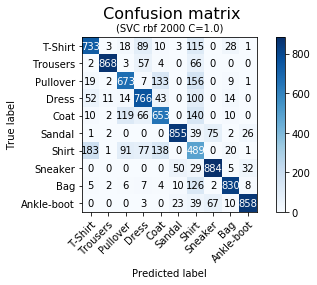

Test accuracy:  0.7609 

              precision    recall  f1-score   support

           0       0.73      0.73      0.73      1000
           1       0.97      0.87      0.92      1000
           2       0.73      0.67      0.70      1000
           3       0.71      0.77      0.74      1000
           4       0.66      0.65      0.66      1000
           5       0.91      0.85      0.88      1000
           6       0.38      0.49      0.43      1000
           7       0.86      0.88      0.87      1000
           8       0.89      0.83      0.86      1000
           9       0.93      0.86      0.89      1000

    accuracy                           0.76     10000
   macro avg       0.78      0.76      0.77     10000
weighted avg       0.78      0.76      0.77     10000



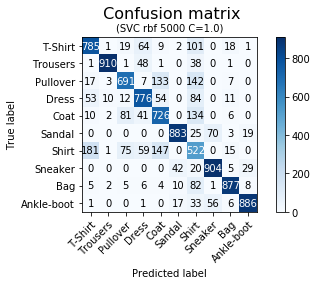

Test accuracy:  0.796 

              precision    recall  f1-score   support

           0       0.75      0.79      0.76      1000
           1       0.98      0.91      0.94      1000
           2       0.78      0.69      0.73      1000
           3       0.77      0.78      0.78      1000
           4       0.68      0.73      0.70      1000
           5       0.93      0.88      0.90      1000
           6       0.44      0.52      0.48      1000
           7       0.88      0.90      0.89      1000
           8       0.92      0.88      0.90      1000
           9       0.94      0.89      0.91      1000

    accuracy                           0.80     10000
   macro avg       0.81      0.80      0.80     10000
weighted avg       0.81      0.80      0.80     10000



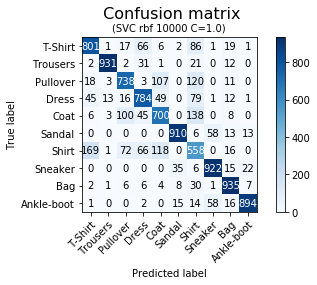

Test accuracy:  0.8173 

              precision    recall  f1-score   support

           0       0.77      0.80      0.78      1000
           1       0.98      0.93      0.95      1000
           2       0.78      0.74      0.76      1000
           3       0.78      0.78      0.78      1000
           4       0.71      0.70      0.71      1000
           5       0.94      0.91      0.92      1000
           6       0.53      0.56      0.54      1000
           7       0.89      0.92      0.90      1000
           8       0.88      0.94      0.91      1000
           9       0.95      0.89      0.92      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



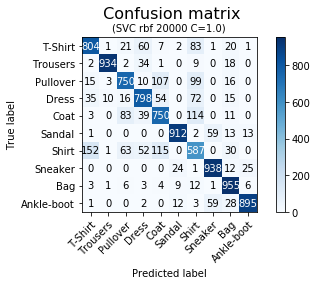

Test accuracy:  0.8323 

              precision    recall  f1-score   support

           0       0.79      0.80      0.80      1000
           1       0.98      0.93      0.96      1000
           2       0.80      0.75      0.77      1000
           3       0.80      0.80      0.80      1000
           4       0.72      0.75      0.74      1000
           5       0.95      0.91      0.93      1000
           6       0.60      0.59      0.59      1000
           7       0.89      0.94      0.91      1000
           8       0.85      0.95      0.90      1000
           9       0.95      0.90      0.92      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



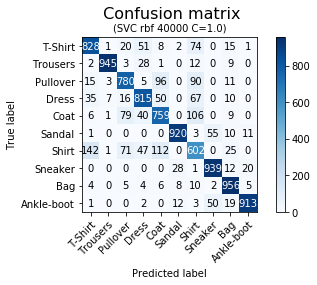

Test accuracy:  0.8457 

              precision    recall  f1-score   support

           0       0.80      0.83      0.81      1000
           1       0.99      0.94      0.97      1000
           2       0.80      0.78      0.79      1000
           3       0.82      0.81      0.82      1000
           4       0.74      0.76      0.75      1000
           5       0.95      0.92      0.93      1000
           6       0.62      0.60      0.61      1000
           7       0.90      0.94      0.92      1000
           8       0.89      0.96      0.92      1000
           9       0.96      0.91      0.94      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



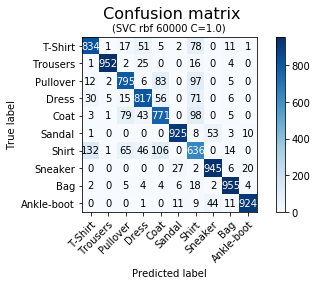

Test accuracy:  0.8554 

              precision    recall  f1-score   support

           0       0.82      0.83      0.83      1000
           1       0.99      0.95      0.97      1000
           2       0.81      0.80      0.80      1000
           3       0.82      0.82      0.82      1000
           4       0.75      0.77      0.76      1000
           5       0.95      0.93      0.94      1000
           6       0.62      0.64      0.63      1000
           7       0.91      0.94      0.92      1000
           8       0.94      0.95      0.95      1000
           9       0.96      0.92      0.94      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [76]:
##############################################################################
########################## RBF mit StandardScaler ############################
##############################################################################
# RBF_SVC mit C=1 trainieren und Ergebnisse speichern, seed=1

train_RBF_SVC(X_tr_500, X_test_vgg16, y_tr_500, y_test_vgg16, 1, '500',1.0, 'auto', 'ovo',
               "SVM_Modelle_FM/VGG16_default/rbf/Neue Mengen/", "seed_1_random_A_with_scaler", "VGG16.pkl")
train_RBF_SVC(X_tr_1000, X_test_vgg16, y_tr_1000, y_test_vgg16, 1, '1000',1.0,'auto', 'ovo',
               "SVM_Modelle_FM//VGG16_default/rbf/Neue Mengen/", "seed_1_random_A_with_scaler", "VGG16.pkl")
train_RBF_SVC(X_tr_2000, X_test_vgg16, y_tr_2000, y_test_vgg16, 1, '2000',1.0,'auto', 'ovo',
               "SVM_Modelle_FM//VGG16_default/rbf/Neue Mengen/", "seed_1_random_A_with_scaler", "VGG16.pkl")
train_RBF_SVC(X_tr_5000, X_test_vgg16, y_tr_5000, y_test_vgg16, 1, '5000',1.0,'auto', 'ovo',
               "SVM_Modelle_FM//VGG16_default/rbf/Neue Mengen/", "seed_1_random_A_with_scaler", "VGG16.pkl")
train_RBF_SVC(X_tr_10000, X_test_vgg16, y_tr_10000, y_test_vgg16, 1, '10000',1.0,'auto', 'ovo',
               "SVM_Modelle_FM//VGG16_default/rbf/Neue Mengen/", "seed_1_random_A_with_scaler", "VGG16.pkl")
train_RBF_SVC(X_tr_20000, X_test_vgg16, y_tr_20000, y_test_vgg16, 1, '20000',1.0,'auto', 'ovo',
               "SVM_Modelle_FM//VGG16_default/rbf/Neue Mengen/", "seed_1_random_A_with_scaler", "VGG16.pkl")
train_RBF_SVC(X_tr_40000, X_test_vgg16, y_tr_40000, y_test_vgg16, 1, '40000',1.0,'auto', 'ovo',
               "SVM_Modelle_FM//VGG16_default/rbf/Neue Mengen//", "seed_1_random_A_with_scaler", "VGG16.pkl")
train_RBF_SVC(X_train_vgg16, X_test_vgg16, y_train_vgg16, y_test_vgg16, 1, '60000',1.0,'auto', 'ovo',
               "SVM_Modelle_FM//VGG16_default/rbf/Neue Mengen/", "seed_1_random_A_with_scaler", "VGG16.pkl")

In [ ]:
##############################################################################
########################## RBF mit StandardScaler und GridSerach ############################
##############################################################################

In [21]:
'''
GridSearchCV RBF mit StandardScaler, ohne PCA     1. Durchlauf
speichern
'''

print("GridSearch SVC RBF 500 1. Durchlauf")
clf_500_LinearSVC, time_500 = tuning_hyper_params(X_tr_500, y_tr_500, X_test_vgg16, y_test_vgg16, 
                                        'rbf',10, 2, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_500_LinearSVC, "SVM_Modelle_FM/VGG16_opt/rbf/Neue Mengen/500/seed_1_random_A_with_scaler/GridSearch_1DL.pkl")
save_as_csv(time_500, "SVM_Modelle_FM/VGG16_opt/rbf/Neue Mengen/500/seed_1_random_A_with_scaler/", 'Suchzeiten_GridSearch_1_DL.csv')

print("GridSearch SVC RBF 1000 1. Durchlauf")
clf_1000_LinearSVC, time_1000 = tuning_hyper_params(X_tr_1000, y_tr_1000, X_test_vgg16, y_test_vgg16, 
                                        'rbf',10, 2, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_1000_LinearSVC, "SVM_Modelle_FM/VGG16_opt/rbf/Neue Mengen/1000/seed_1_random_A_with_scaler/GridSearch_1DL.pkl")
save_as_csv(time_1000, "SVM_Modelle_FM/VGG16_opt/rbf/Neue Mengen/1000/seed_1_random_A_with_scaler/", 'Suchzeiten_GridSearch_1_DL.csv')


GridSearch SVC RBF 500 1. Durchlauf

 C_range:  [1.52587891e-05 6.10351562e-05 2.44140625e-04 9.76562500e-04
 3.90625000e-03 1.56250000e-02 6.25000000e-02 2.50000000e-01
 1.00000000e+00 4.00000000e+00 1.60000000e+01 6.40000000e+01
 2.56000000e+02 1.02400000e+03]

 gamma_range: [1.52587891e-05 6.10351562e-05 2.44140625e-04 9.76562500e-04
 3.90625000e-03 1.56250000e-02 6.25000000e-02 2.50000000e-01
 1.00000000e+00 4.00000000e+00 1.60000000e+01]

 Beste Score:  0.752

 Besten Parameter:  {'svm__C': 64.0, 'svm__gamma': 6.103515625e-05}
Bester Estimator score:  0.7471
Precision-Score: 0.671394 (0.081214) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 1.52587890625e-05}
Precision-Score: 0.667928 (0.094230) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 6.103515625e-05}
Precision-Score: 0.693932 (0.096841) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 0.000244140625}
Precision-Score: 0.714365 (0.058599) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__ga


 C_range:  [1.52587891e-05 6.10351562e-05 2.44140625e-04 9.76562500e-04
 3.90625000e-03 1.56250000e-02 6.25000000e-02 2.50000000e-01
 1.00000000e+00 4.00000000e+00 1.60000000e+01 6.40000000e+01
 2.56000000e+02 1.02400000e+03]

 gamma_range: [1.52587891e-05 6.10351562e-05 2.44140625e-04 9.76562500e-04
 3.90625000e-03 1.56250000e-02 6.25000000e-02 2.50000000e-01
 1.00000000e+00 4.00000000e+00 1.60000000e+01]

 Beste Score:  0.78

 Besten Parameter:  {'svm__C': 64.0, 'svm__gamma': 6.103515625e-05}
Bester Estimator score:  0.7629
Precision-Score: 0.679879 (0.043494) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 1.52587890625e-05}
Precision-Score: 0.684992 (0.041081) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 6.103515625e-05}
Precision-Score: 0.699000 (0.033968) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 0.000244140625}
Precision-Score: 0.710501 (0.040144) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 0.0009765625}
Precision-Score: 

In [22]:
print("GridSearch SVC RBF 500 2. Durchlauf")
clf_500_LinearSVC, time_500 = tuning_hyper_params(X_tr_500, y_tr_500, X_test_vgg16, y_test_vgg16, 
                                        'rbf',10, 2, 0, get_finer_range(64.0),
                                         get_finer_range(6.103515625e-05), 1)
save_trained_model_as_pkl(clf_500_LinearSVC, "SVM_Modelle_FM/VGG16_opt/rbf/Neue Mengen/500/seed_1_random_A_with_scaler/GridSearch_2DL.pkl")
save_as_csv(time_500, "SVM_Modelle_FM/VGG16_opt/rbf/Neue Mengen/500/seed_1_random_A_with_scaler/", 'Suchzeiten_GridSearch_2_DL.csv')

print("GridSearch SVC RBF 1000 2. Durchlauf")
clf_1000_LinearSVC, time_1000 = tuning_hyper_params(X_tr_1000, y_tr_1000, X_test_vgg16, y_test_vgg16, 
                                        'rbf',10, 2, 0, get_finer_range(64.0),
                                         get_finer_range(6.103515625e-05), 1)
save_trained_model_as_pkl(clf_1000_LinearSVC, "SVM_Modelle_FM/VGG16_opt/rbf/Neue Mengen/1000/seed_1_random_A_with_scaler/GridSearch_2DL.pkl")
save_as_csv(time_1000, "SVM_Modelle_FM/VGG16_opt/rbf/Neue Mengen/1000/seed_1_random_A_with_scaler/", 'Suchzeiten_GridSearch_2_DL.csv')

GridSearch SVC RBF 500 2. Durchlauf

 C_range:  [ 16.          19.02731384  22.627417    26.90868529  32.
  38.05462768  45.254834    53.81737058  64.          76.10925536
  90.50966799 107.63474115 128.         152.21851072 181.01933598
 215.2694823  256.        ]

 gamma_range: [1.52587891e-05 1.81458605e-05 2.15791864e-05 2.56621220e-05
 3.05175781e-05 3.62917210e-05 4.31583729e-05 5.13242441e-05
 6.10351562e-05 7.25834421e-05 8.63167458e-05 1.02648488e-04
 1.22070312e-04 1.45166884e-04 1.72633492e-04 2.05296976e-04
 2.44140625e-04]

 Beste Score:  0.764

 Besten Parameter:  {'svm__C': 107.63474115247546, 'svm__gamma': 5.132424409507535e-05}
Bester Estimator score:  0.7468
Precision-Score: 0.717306 (0.081493) mit Parameter: {'svm__C': 16.0, 'svm__gamma': 1.52587890625e-05}
Precision-Score: 0.726798 (0.075639) mit Parameter: {'svm__C': 16.0, 'svm__gamma': 1.81458605194507e-05}
Precision-Score: 0.755103 (0.063128) mit Parameter: {'svm__C': 16.0, 'svm__gamma': 2.1579186437577746e-05}
P

Accuracy-Score: 0.754000 (0.066363) mit Parameter: {'svm__C': 152.2185107203483, 'svm__gamma': 0.0001026484881901507}
Accuracy-Score: 0.740000 (0.064498) mit Parameter: {'svm__C': 152.2185107203483, 'svm__gamma': 0.0001220703125}
Accuracy-Score: 0.734000 (0.072139) mit Parameter: {'svm__C': 152.2185107203483, 'svm__gamma': 0.0001451668841556056}
Accuracy-Score: 0.734000 (0.076446) mit Parameter: {'svm__C': 152.2185107203483, 'svm__gamma': 0.00017263349150062197}
Accuracy-Score: 0.730000 (0.075498) mit Parameter: {'svm__C': 152.2185107203483, 'svm__gamma': 0.0002052969763803014}
Accuracy-Score: 0.730000 (0.075498) mit Parameter: {'svm__C': 152.2185107203483, 'svm__gamma': 0.000244140625}
Accuracy-Score: 0.748000 (0.056000) mit Parameter: {'svm__C': 181.01933598375618, 'svm__gamma': 1.52587890625e-05}
Accuracy-Score: 0.754000 (0.066363) mit Parameter: {'svm__C': 181.01933598375618, 'svm__gamma': 1.81458605194507e-05}
Accuracy-Score: 0.752000 (0.060133) mit Parameter: {'svm__C': 181.01933

Roc-Score: 0.853333 (0.038103) mit Parameter: {'svm__C': 215.2694823049509, 'svm__gamma': 0.0001026484881901507}
Roc-Score: 0.855556 (0.037185) mit Parameter: {'svm__C': 215.2694823049509, 'svm__gamma': 0.0001220703125}
Roc-Score: 0.854444 (0.042002) mit Parameter: {'svm__C': 215.2694823049509, 'svm__gamma': 0.0001451668841556056}
Roc-Score: 0.853333 (0.043829) mit Parameter: {'svm__C': 215.2694823049509, 'svm__gamma': 0.00017263349150062197}
Roc-Score: 0.850000 (0.041944) mit Parameter: {'svm__C': 215.2694823049509, 'svm__gamma': 0.0002052969763803014}
Roc-Score: 0.850000 (0.041944) mit Parameter: {'svm__C': 215.2694823049509, 'svm__gamma': 0.000244140625}
Roc-Score: 0.862222 (0.034854) mit Parameter: {'svm__C': 256.0, 'svm__gamma': 1.52587890625e-05}
Roc-Score: 0.863333 (0.029835) mit Parameter: {'svm__C': 256.0, 'svm__gamma': 1.81458605194507e-05}
Roc-Score: 0.866667 (0.030631) mit Parameter: {'svm__C': 256.0, 'svm__gamma': 2.1579186437577746e-05}
Roc-Score: 0.863333 (0.031447) mit 

Accuracy-Score: 0.773000 (0.049204) mit Parameter: {'svm__C': 107.63474115247546, 'svm__gamma': 0.0001026484881901507}
Accuracy-Score: 0.772000 (0.051730) mit Parameter: {'svm__C': 107.63474115247546, 'svm__gamma': 0.0001220703125}
Accuracy-Score: 0.770000 (0.048166) mit Parameter: {'svm__C': 107.63474115247546, 'svm__gamma': 0.0001451668841556056}
Accuracy-Score: 0.766000 (0.044766) mit Parameter: {'svm__C': 107.63474115247546, 'svm__gamma': 0.00017263349150062197}
Accuracy-Score: 0.765000 (0.042485) mit Parameter: {'svm__C': 107.63474115247546, 'svm__gamma': 0.0002052969763803014}
Accuracy-Score: 0.762000 (0.046217) mit Parameter: {'svm__C': 107.63474115247546, 'svm__gamma': 0.000244140625}
Accuracy-Score: 0.774000 (0.040546) mit Parameter: {'svm__C': 128.0, 'svm__gamma': 1.52587890625e-05}
Accuracy-Score: 0.776000 (0.040050) mit Parameter: {'svm__C': 128.0, 'svm__gamma': 1.81458605194507e-05}
Accuracy-Score: 0.779000 (0.040112) mit Parameter: {'svm__C': 128.0, 'svm__gamma': 2.157918

In [23]:
'''
GridSearchCV RBF mit StandardScaler, ohne PCA     1. Durchlauf
speichern
'''

print("GridSearch SVC RBF 2000 1. Durchlauf")
clf_2000_LinearSVC, time_2000 = tuning_hyper_params(X_tr_2000, y_tr_2000, X_test_vgg16, y_test_vgg16, 
                                        'rbf',10, 2, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_2000_LinearSVC, "SVM_Modelle_FM/VGG16_opt/rbf/Neue Mengen/2000/seed_1_random_A_with_scaler/GridSearch_1DL.pkl")
save_as_csv(time_2000, "SVM_Modelle_FM/VGG16_opt/rbf/Neue Mengen/2000/seed_1_random_A_with_scaler/", 'Suchzeiten_GridSearch_1_DL.csv')

print("***************************************************************************")

print("GridSearch SVC RBF 5000 1. Durchlauf")
clf_5000_LinearSVC, time_5000 = tuning_hyper_params(X_tr_5000, y_tr_5000, X_test_vgg16, y_test_vgg16, 
                                        'rbf',5, 2, 0, np.logspace(-16,10,14, base=2),
                                         np.logspace(-16,4,11, base=2), 1)
save_trained_model_as_pkl(clf_5000_LinearSVC, "SVM_Modelle_FM/VGG16_opt/rbf/Neue Mengen/5000/seed_1_random_A_with_scaler/GridSearch_1DL.pkl")
save_as_csv(time_5000, "SVM_Modelle_FM/VGG16_opt/rbf/Neue Mengen/5000/seed_1_random_A_with_scaler/", 'Suchzeiten_GridSearch_1_DL.csv')

GridSearch SVC RBF 2000 1. Durchlauf

 C_range:  [1.52587891e-05 6.10351562e-05 2.44140625e-04 9.76562500e-04
 3.90625000e-03 1.56250000e-02 6.25000000e-02 2.50000000e-01
 1.00000000e+00 4.00000000e+00 1.60000000e+01 6.40000000e+01
 2.56000000e+02 1.02400000e+03]

 gamma_range: [1.52587891e-05 6.10351562e-05 2.44140625e-04 9.76562500e-04
 3.90625000e-03 1.56250000e-02 6.25000000e-02 2.50000000e-01
 1.00000000e+00 4.00000000e+00 1.60000000e+01]

 Beste Score:  0.7885

 Besten Parameter:  {'svm__C': 64.0, 'svm__gamma': 1.52587890625e-05}
Bester Estimator score:  0.7855
Precision-Score: 0.702048 (0.041567) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 1.52587890625e-05}
Precision-Score: 0.720354 (0.034589) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 6.103515625e-05}
Precision-Score: 0.706020 (0.025439) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 0.000244140625}
Precision-Score: 0.707012 (0.025092) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm


 C_range:  [1.52587891e-05 6.10351562e-05 2.44140625e-04 9.76562500e-04
 3.90625000e-03 1.56250000e-02 6.25000000e-02 2.50000000e-01
 1.00000000e+00 4.00000000e+00 1.60000000e+01 6.40000000e+01
 2.56000000e+02 1.02400000e+03]

 gamma_range: [1.52587891e-05 6.10351562e-05 2.44140625e-04 9.76562500e-04
 3.90625000e-03 1.56250000e-02 6.25000000e-02 2.50000000e-01
 1.00000000e+00 4.00000000e+00 1.60000000e+01]

 Beste Score:  0.8138

 Besten Parameter:  {'svm__C': 16.0, 'svm__gamma': 0.000244140625}
Bester Estimator score:  0.8137
Precision-Score: 0.726732 (0.011761) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 1.52587890625e-05}
Precision-Score: 0.727320 (0.012412) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 6.103515625e-05}
Precision-Score: 0.719770 (0.013341) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 0.000244140625}
Precision-Score: 0.716953 (0.009070) mit Parameter: {'svm__C': 1.52587890625e-05, 'svm__gamma': 0.0009765625}
Precision-Score:

In [ ]:
'''
GridSearchCV RBF mit StandardScaler, ohne PCA     2. Durchlauf
speichern
'''

print("GridSearch SVC RBF 2000 1. Durchlauf")
clf_2000_LinearSVC, time_2000 = tuning_hyper_params(X_tr_2000, y_tr_2000, X_test_vgg16, y_test_vgg16, 
                                        'rbf',10, 2, 0, get_finer_range(64.0),
                                         get_finer_range(1.52587890625e-05), 1)
save_trained_model_as_pkl(clf_2000_LinearSVC, "SVM_Modelle_FM/VGG16_opt/rbf/Neue Mengen/2000/seed_1_random_A_with_scaler/GridSearch_1DL.pkl")
save_as_csv(time_2000, "SVM_Modelle_FM/VGG16_opt/rbf/Neue Mengen/2000/seed_1_random_A_with_scaler/", 'Suchzeiten_GridSearch_1_DL.csv')

print("***************************************************************************")

print("GridSearch SVC RBF 5000 1. Durchlauf")
clf_5000_LinearSVC, time_5000 = tuning_hyper_params(X_tr_5000, y_tr_5000, X_test_vgg16, y_test_vgg16, 
                                        'rbf',5, 2, 0, get_finer_range(16.0),
                                         get_finer_range(0.000244140625), 1)
save_trained_model_as_pkl(clf_5000_LinearSVC, "SVM_Modelle_FM/VGG16_opt/rbf/Neue Mengen/5000/seed_1_random_A_with_scaler/GridSearch_1DL.pkl")
save_as_csv(time_5000, "SVM_Modelle_FM/VGG16_opt/rbf/Neue Mengen/5000/seed_1_random_A_with_scaler/", 'Suchzeiten_GridSearch_1_DL.csv')

In [ ]:
train_RBF_SVC(X_tr_500, X_test_vgg16, y_tr_500, y_test_vgg16, 1, '500',107.63474115247546, 5.132424409507535e-05,'ovo',
               "SVM_Modelle_FM/VGG16_opt/rbf/Neue Mengen/", "seed_1_random_A_with_scaler", "RBF_SVC_500_VGG16.pkl")
train_RBF_SVC(X_tr_1000, X_test_vgg16, y_tr_1000, y_test_vgg16, 1, '1000', 90.50966799187809, 4.315837287515549e-05,'ovo',
               "SVM_Modelle_FM/VGG16_opt/rbf/Neue Mengen/", "seed_1_random_A_with_scaler", "RBF_SVC_500_VGG16.pkl")

In [21]:
'''
https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
'''


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    print(test_scores_mean)
    print(test_scores_std)
    return plt

In [24]:
#fig = plt.figure(figsize=(10,4))
#fig.autofmt_xdate = sns.countplot(y_test, order=['0','1','2','3','4','5','6','7','8','9'])
#fig.autofmt_xdate.figure.savefig("distribution_test_data_fashion_MNIST.png")

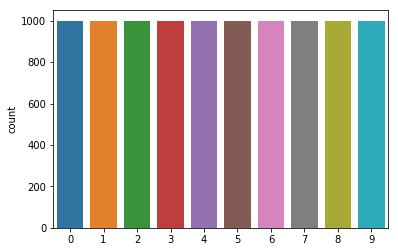

In [70]:
#fig = sns.countplot(y_test)
#fig.figure.savefig("distribution_test_data_fashion_MNIST.png")

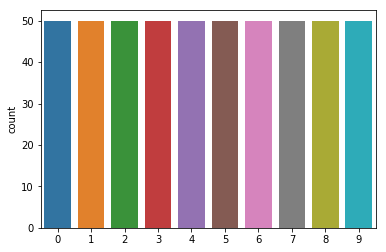

In [25]:
sns.countplot(y_tr_500)

In [ ]:
linSVC_def = LinearSVC(loss='hinge',random_state=1)
linSVC_def = LinearSVC(C=get_best_C_500['svm__C'],loss='hinge',random_state=1)

[0.64  0.752 0.78  0.79  0.812]
[0.05138093 0.07547185 0.05366563 0.05234501 0.06523803]


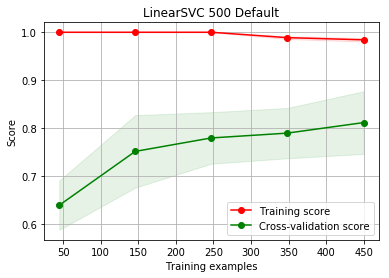

<Figure size 432x288 with 0 Axes>

In [30]:
# Lernkurven plotten Trainingsmenge 500, Default und getuned
linSVC_def = LinearSVC(loss='hinge',random_state=1)
learn_curve_def_500 = plot_learning_curve(linSVC_def, "LinearSVC 500 Default", X_tr_500, y_tr_500, ylim=None, cv=10,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5))
fig = learn_curve_def_500.figure()
fig.savefig("Lernkurve_FM_LinearSVC_500.png")
learn_curve_def_500.show()

In [ ]:
x_axis = np.arange(-10, 10, 0.001)
dist_a = stats.norm.pdf(x_axis, 0,2)
dist_b = stats.norm.pdf(x_axis,1,2)
plt.plot()

In [ ]:
# Experimente Kullback leibler divergenz
from scipy.stats import entropy

In [119]:
#def roc_auc_score_multiclass(y_test, y_pred, average="macro"):
 #   lb = LabelBinarizer()
  #  lb.fit(y_test)
   # y_test = lb.transform(y_test)
    #y_pred = lb.transform(y_pred)
    #return roc_auc_score(y_test, y_pred, average=average)

In [120]:
def tuning_LinearSVC(X, y, c_range, cv, seed):
    seed = seed
    np.random.seed(seed) 
    scoring = {'Precision': make_scorer(precision_score, average='macro'),
               'Recall': make_scorer(recall_score, average='macro'),
               'F1': make_scorer(f1_score, average='macro'),
               'acc': make_scorer(accuracy_score),
               'roc': make_scorer(roc_auc_score_multiclass, average='macro')}    
    
    #c_range = np.logspace(-16,10,14, base=2)  
    #gamma_range = np.logspace(-16,10,14, base=2)
    pipeline = Pipeline([("svm", LinearSVC(loss='hinge', random_state=seed))
        
    ])
    c_range = c_range
    
    param_grid=[{'svm__C': c_range}]             
                      
    #clf = GridSearchCV(pipeline, param_grid=param_grid, cv=cv, scoring=scoring, refit='acc', n_jobs=-1)
    clf = GridSearchCV(pipeline, param_grid=param_grid, cv=cv, scoring=scoring, refit='acc', return_train_score=True,n_jobs=-1)         
    clf.fit(X, y)   
    print('\n C_range:', c_range)
    print('\n Bester Score: ',clf.best_score_)
    print('\n Besten Parameter: ', clf.best_params_) 
    print(clf.cv_results_)
    #for mean, stdev, param in zip(clf.cv_results_['mean_test_score'], clf.cv_results_['std_test_score'],
     #                             clf.cv_results_['params']):
      #  print("Score: %f (%f) mit Parameter: %r" % (mean, stdev, param))
    #print("Alle Ergebnisse:")
    #print(clf.cv_results_)
    return clf

In [63]:
#test = LinearSVC(loss='hinge', random_state=1)
#test.fit(X_tr_500, y_tr_500)
#pred = test.predict(X_test_9_4_2)

#print(multiclass_roc_auc_score(y_test, pred, average='macro'))

0.8911111111111112


In [52]:
'''
Roc_Auc_score für Mehrklassenfall
'''
'''
def roc_auc_score_multiclass_single(actual_class, pred_class, average = "macro"):

  #creating a set of all the unique classes using the actual class list
  unique_class = set(actual_class)
  roc_auc_dict = {}
  for per_class in unique_class:
    #creating a list of all the classes except the current class 
    other_class = [x for x in unique_class if x != per_class]

    #marking the current class as 1 and all other classes as 0
    new_actual_class = [0 if x in other_class else 1 for x in actual_class]
    new_pred_class = [0 if x in other_class else 1 for x in pred_class]

    #using the sklearn metrics method to calculate the roc_auc_score
    roc_auc = roc_auc_score(new_actual_class, new_pred_class, average = average)
    roc_auc_dict[per_class] = roc_auc

  return roc_auc_dict

lr_roc_auc_multiclass = roc_auc_score_multiclass(y_test, pred)
print(lr_roc_auc_multiclass)
'''

NameError: name 'pred' is not defined